**Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.** 

**Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.**

**Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.**

**Some relevant columns in the dataset:
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold**

**Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file.**

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
data=pd.read_csv('avocado.csv')

In [3]:
#checking the overview of the dataset
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
#Checking for shape of the dataset
data.shape

(18249, 14)

**In this dataset there are about 18249 rows and 14 columns are present**

In [5]:
#Checking for null values
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**We can see that there are no null values present in the dataset**

In [6]:
#Checking for the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**In this dataset two columns each are integer type and object type(string) and rest all the columns are float type. And again we can see that there 18249 non-null values which is the number of our columns that means we are sure that there are no null values present in our dataset**

**I can see that there is one column named unnamed: 0 its just representing the serial number, so i dint find it usefull so dropping that column**

In [7]:
#Dropping unwanted column
data=data.drop(['Unnamed: 0'],axis=1)

In [8]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

**So we can see that Unnamed column have been removed from the dataset**

In [9]:
#Checking for duplicates
data.duplicated().sum()

0

**So we can see that there are no duplicates present in the dataset.**

In [10]:
#Description of dataset
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

**Observation**
* **In this dataset we can see that in each every column there 18249 rows.**
* **In column xlarge bags there may be a lot of outliers looking at the min 25% 50% 75% and max.**
* **By looking at the year column we can say that this data is from 2015 to 2018.**
* **Overall in most of the columns there may be outliers and the data wont be distributed normally, that means skewness might be     present.**

**CHECKING FOR UNIQUE VALUES IN EACH AND EVERY COLUMN**

In [11]:
#Checking for unique values
data['Date'].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

**In Date column we can see that there are a lot of unique values present**

In [12]:
#Checking for number of uniques values
data['Date'].nunique()

169

**There are about 169 unique values present in the column Date.**

In [202]:
#Checking for unique values
data['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

**In column Average price also there are lot of unique values present.**

In [203]:
#Checking for number of uniques values
data['AveragePrice'].nunique()

259

**There are about 259 unique values present in the column AveragePrice.**

In [15]:
#Checking for unique values
data['Total Volume'].unique()

array([ 64236.62,  54876.98, 118220.22, ...,  13766.76,  16205.22,
        17489.58])

**In column Total volume also there are lot of unique values present.**

In [16]:
#Checking for number of uniques values
data['Total Volume'].nunique()

18237

**There are about 18237 unique values present in the column AveragePrice.**

In [17]:
#Checking for unique values
data['4046'].unique()

array([1036.74,  674.28,  794.7 , ..., 1191.92, 1527.63, 2894.77])

**In column 4046 also there are lot of unique values present.**

In [189]:
#Checking for number of uniques values
data['4046'].nunique()

17702

**There are about 17702 unique values present in the column 4046.**

In [190]:
#Checking for unique values
data['4225'].unique()

array([ 54454.85,  44638.81, 109149.67, ...,   2452.79,   2981.04,
         2356.13])

**In column 4225 also there are lot of unique values present.**

In [191]:
#Checking for number of uniques values
data['4225'].nunique()

18103

**There are about 18103 unique values present in the column 4225.**

In [192]:
#Checking for unique values
data['4770'].unique()

array([ 48.16,  58.33, 130.5 , ..., 727.94, 727.01, 224.53])

**In column 4770 also there are lot of unique values present.**

In [193]:
#Checking for number of uniques values
data['4770'].nunique()

12071

**There are about 12071 unique values present in the column 4770.**

In [194]:
#Checking for unique values
data['Total Bags'].unique()

array([ 8696.87,  9505.56,  8145.35, ...,  9394.11, 10969.54, 12014.15])

**In column Total Bags also there are lot of unique values present.**

In [195]:
#Checking for number of uniques values
data['Total Bags'].nunique()

18097

**There are about 18097 unique values present in the column Total Bags.**

In [196]:
#Checking for unique values
data['Small Bags'].unique()

array([ 8603.62,  9408.07,  8042.21, ...,  9351.8 , 10919.54, 11988.14])

**In column Small Bags also there are lot of unique values present.**

In [197]:
#Checking for number of uniques values
data['Small Bags'].nunique()

17321

**There are about 17321 unique values present in the column Small Bags.**

In [198]:
#Checking for unique values
data['Large Bags'].unique()

array([ 93.25,  97.49, 103.14, ..., 324.8 ,  42.31,  26.01])

**In column Large Bags also there are lot of unique values present.**

In [199]:
#Checking for number of uniques values
data['Large Bags'].nunique()

15082

**There are about 15082 unique values present in the column Large Bags.**

In [200]:
#Checking for unique values
data['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

**In column XLarge Bags also there are lot of unique values present.**

In [201]:
#Checking for number of uniques values
data['XLarge Bags'].nunique()

5588

**There are about 5588 unique values present in the column XLarge Bags.**

In [202]:
#Checking for unique values
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

**In column type also there are twi unique values present, they are conventional and organic.**

In [203]:
#Checking for unique values
data['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

**There are about 4 unique values present in the column year, meaning the data was collected from 2015 to 2018.**

In [204]:
#Checking for unique values
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

**There are lot of regions present in column in region**

In [205]:
#Checking for number of uniques values
data['region'].nunique()

54

**So there are about 54 different regions present in the dataset**

In [582]:
#Checking for mean average price value as per type and region
data.groupby(['type','region'])['AveragePrice'].mean().head(60)

type          region             
conventional  Albany                 1.348757
              Atlanta                1.068817
              BaltimoreWashington    1.344201
              Boise                  1.076036
              Boston                 1.304379
              BuffaloRochester       1.382308
              California             1.105444
              Charlotte              1.275089
              Chicago                1.369349
              CincinnatiDayton       1.015503
              Columbus               1.066272
              DallasFtWorth          0.846450
              Denver                 1.073964
              Detroit                1.123964
              GrandRapids            1.325030
              GreatLakes             1.181893
              HarrisburgScranton     1.258817
              HartfordSpringfield    1.408047
              Houston                0.825089
              Indianapolis           1.144852
              Jacksonville           1.193609


**In this we can see the mean average price of the regions as per to type and regions, so in this we can see that  region New york has the highest average price for conventional type and Albany region has the highest average price for organic type.**

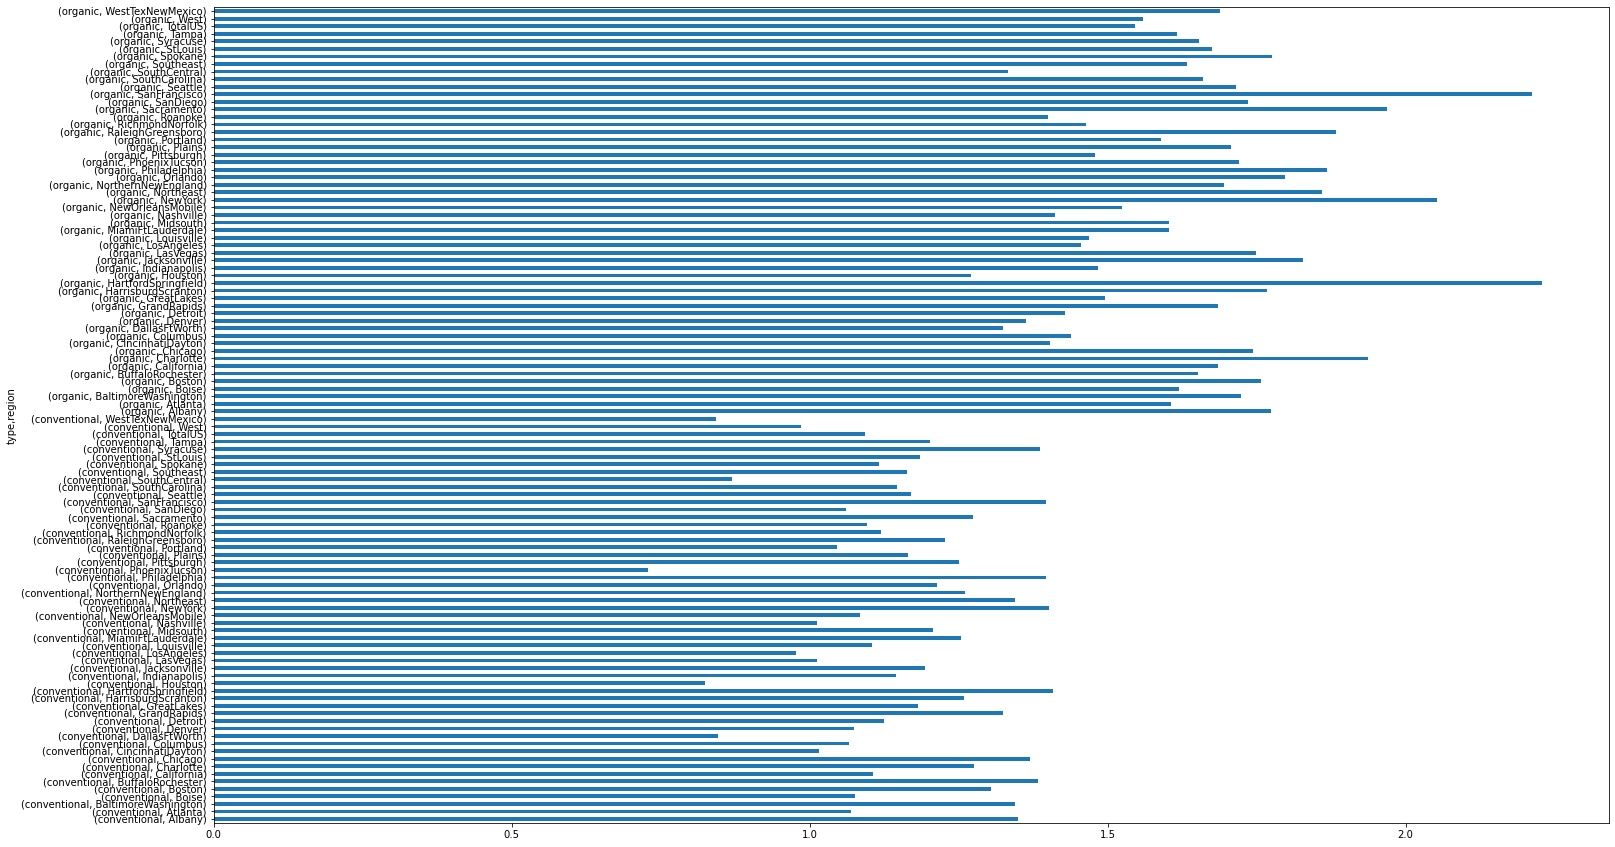

In [586]:
#plotting horizontal bar plot
plt.figure(figsize=(25,15))
data.groupby(['type','region'])['AveragePrice'].mean().plot.barh()
plt.show()

**By looking at the plot we can see the mean average price of the regions as per to type and regions, so in thi we can see that region New york has the highest mean average price for conventional type and Albany region has the highest mean average price for organic type.**

In [584]:
#Checking for mean average price value as per type and year
data.groupby(['type','year'])['AveragePrice'].mean()

type          year
conventional  2015    1.077963
              2016    1.105595
              2017    1.294888
              2018    1.127886
organic       2015    1.673324
              2016    1.571684
              2017    1.735521
              2018    1.567176
Name: AveragePrice, dtype: float64

**In this we can see the mean average price of the regions as per to type and year, so in this we can see that highest mean average price for conventional type and for  organic type was in year 2017.**

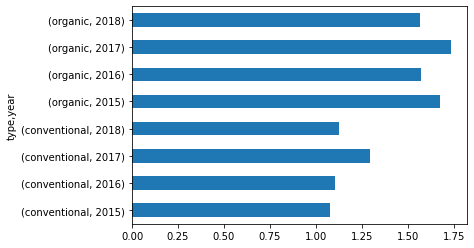

In [587]:
#plotting horizontal bar plot
data.groupby(['type','year'])['AveragePrice'].mean().plot.barh()
plt.show()

**In this plot we can see the mean average price of the regions as per to type and year, so in this we can see that highest mean average price for conventional type and for organic type was in year 2017.**

In [588]:
#Checking for mean average price value as per type
data.groupby(['type'])['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

**The average mean price of the organic is higher than the average mean price of the convetional type.**

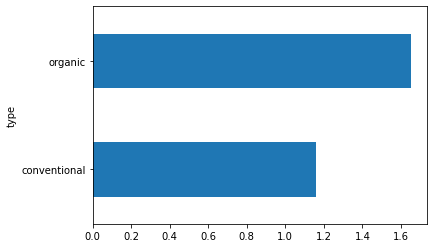

In [589]:
#plotting horizontal bar plot
data.groupby(['type'])['AveragePrice'].mean().plot.barh()
plt.show()

**by looking at the plot we can see that the average mean price of the organic is higher than the average mean price of the convetional type.**

In [590]:
#Checking for mean average price value as per region
data.groupby(['region'])['AveragePrice'].mean()

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

**The highest mean average price is of region SanFrancisco and least of region DallasFtWorth.** 

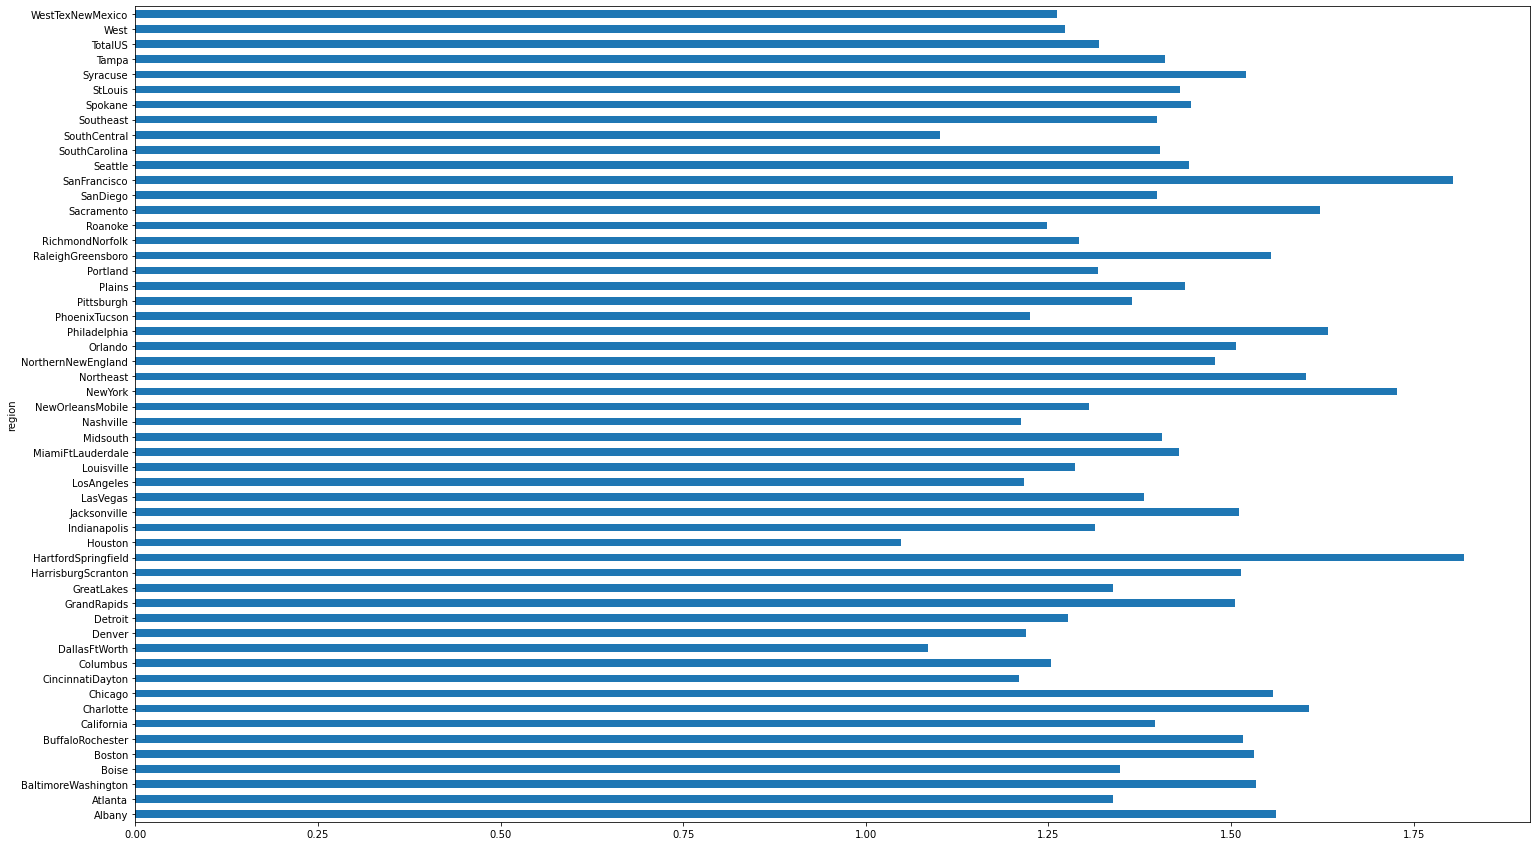

In [591]:
#plotting horizontal bar plot
plt.figure(figsize=(25,15))
data.groupby(['region'])['AveragePrice'].mean().plot.barh()
plt.show()

**By looking at the plot we can that the highest mean average price is of region SanFrancisco and least of region DallasFtWorth.**

In [592]:
#Checking for mean total volume value as per year
data.groupby(['year'])['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

**Most of the avocados were sold in the year 2018, and year by year the the total volume is increasing.**

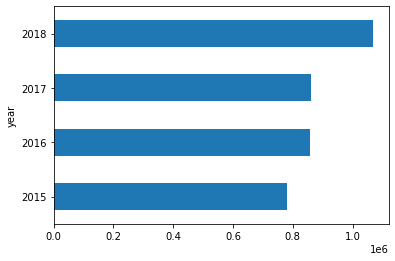

In [593]:
#plotting horizontal bar plot
data.groupby(['year'])['Total Volume'].mean().plot.barh()
plt.show()

**By looking at the plot we can see that Most of the avocados were sold in the year 2018, and year by year the the total volume is increasing.**

In [594]:
#Checking for mean average price value as per year
data.groupby(['year'])['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

**Mean average price in year 2015 was 1.37, in year 2016 it was 1.33, in year 2017 it was 1.51 and in year 2018 it was 1.34.So the highest mean average price was in the year 2017.**

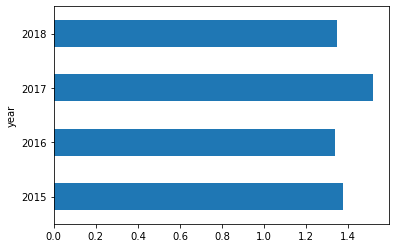

In [595]:
#plotting horizontal bar plot
data.groupby(['year'])['AveragePrice'].mean().plot.barh()
plt.show()

**By looking at the plot we can see that the highest mean average price was in the year 2017.**

In [596]:
#Checking for mean 4046 value as per year
data.groupby(['year'])['4046'].mean()

year
2015    304443.451708
2016    271567.466578
2017    288716.905194
2018    355323.868904
Name: 4046, dtype: float64

**In 2015 around 304443 avocados were sold with plu code 4046,in year 2016 around 288716 were sold, i  year 2017 288716 were sold and in year 2018 355323 avocados were sold with plu code 4046,so in year 2017 highest avocados were sold with plu code 4046.**

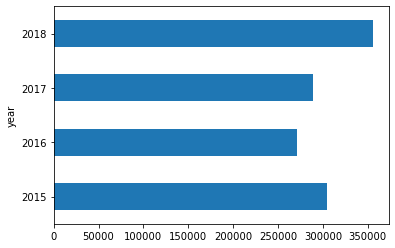

In [597]:
#plotting horizontal bar plot
data.groupby(['year'])['4046'].mean().plot.barh()
plt.show()

**In year 2017 highest avocadas were sold with plu code 4046.**

In [598]:
#Checking for mean 4225 value as per year
data.groupby(['year'])['4225'].mean()

year
2015    313633.844367
2016    297850.478632
2017    269964.124350
2018    314628.606698
Name: 4225, dtype: float64

**In year 2018 highest number of avocados were sold with plu code 4225.**

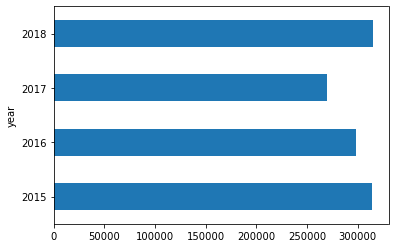

In [599]:
#plotting horizontal bar plot
data.groupby(['year'])['4225'].mean().plot.barh()
plt.show()

**By looking at the plot In year 2018 highest number of avocados were sold with plu code 4225.**

In [600]:
#Checking for mean 4770 value as per year
data.groupby(['year'])['4770'].mean()

year
2015    25426.962520
2016    28468.633371
2017    15941.542779
2018    17694.903387
Name: 4770, dtype: float64

**In year 2016 highest number of avocados were sold with plu code 4770.**

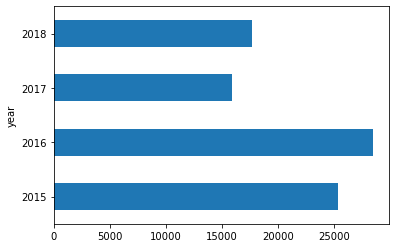

In [601]:
#plotting horizontal bar plot
data.groupby(['year'])['4770'].mean().plot.barh()
plt.show()

**By looking at the plot we can see that in year 2016 highest number of avocados were sold with plu code 4770.**

In [602]:
#Checking for mean total bags value as per year
data.groupby(['year'])['Total Bags'].mean()

year
2015    137523.105437
2016    260533.986204
2017    287712.119423
2018    379271.564429
Name: Total Bags, dtype: float64

**In year 2018 highest number of bags were sold.**

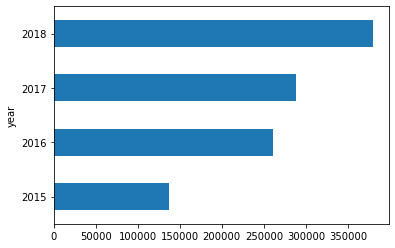

In [603]:
#plotting horizontal bar plot
data.groupby(['year'])['Total Bags'].mean().plot.barh()
plt.show()

**By looking at the plot we can see that in year 2018 highest numnber of bags were sold.**

In [604]:
#Checking for mean xlarge bags value as per year
data.groupby(['year'])['XLarge Bags'].mean()

year
2015     969.390611
2016    3568.070662
2017    4193.843471
2018    5563.728295
Name: XLarge Bags, dtype: float64

**In year 2018 most number of xlarge bags were sold.**

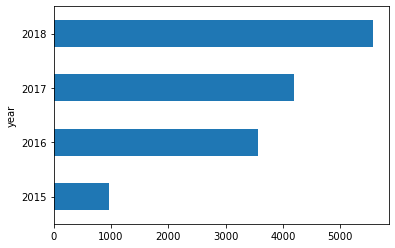

In [605]:
#plotting horizontal bar plot
data.groupby(['year'])['XLarge Bags'].mean().plot.barh()
plt.show()

**By looking at the plot we can see that in year 2018 most number of xlarge bags were sold.**

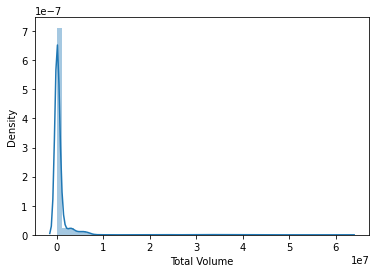

In [207]:
#plotting distribution plot
sns.distplot(data['Total Volume'],kde=True)
plt.show()

**By looking at the plot we can see data is not normally distributed nad hence skewness is present and further will confirm at the time of checking skewness, and if it is present than will treat it either by using log transformer or by using power transformer.**

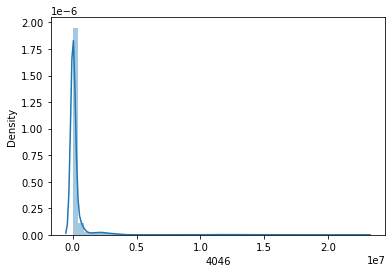

In [208]:
#plotting distribution plot
sns.distplot(data['4046'],kde=True)
plt.show()

**By looking at the plot we can see data is not normally distributed nad hence skewness is present and further will confirm at the time of checking skewness, and if it is present than will treat it either by using log transformer or by using power transformer.**

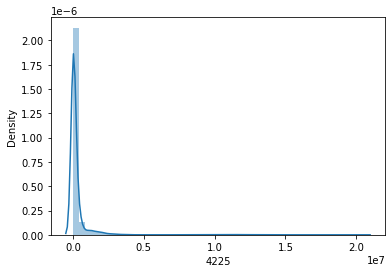

In [209]:
#plotting distribution plot
sns.distplot(data['4225'],kde=True)
plt.show()

**By looking at the plot we can see data is not normally distributed nad hence skewness is present and further will confirm at the time of checking skewness, and if it is present than will treat it either by using log transformer or by using power transformer.**

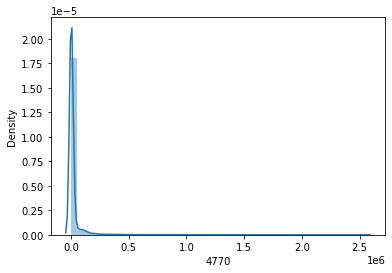

In [606]:
#plotting distribution plot
sns.distplot(data['4770'],kde=True)
plt.show()

**By looking at the plot we can see data is not normally distributed nad hence skewness is present and further will confirm at the time of checking skewness, and if it is present than will treat it either by using log transformer or by using power transformer.**

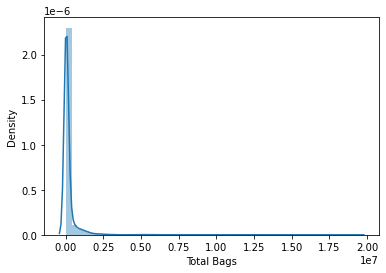

In [211]:
#plotting distribution plot
sns.distplot(data['Total Bags'],kde=True)
plt.show()

**By looking at the plot we can see data is not normally distributed nad hence skewness is present and further will confirm at the time of checking skewness, and if it is present than will treat it either by using log transformer or by using power transformer.**

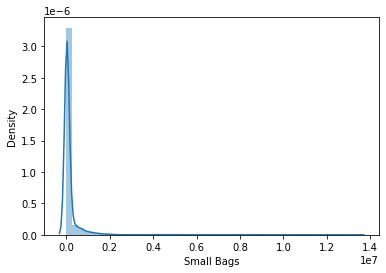

In [212]:
#plotting distribution plot
sns.distplot(data['Small Bags'],kde=True)
plt.show()

**By looking at the plot we can see data is not normally distributed nad hence skewness is present and further will confirm at the time of checking skewness, and if it is present than will treat it either by using log transformer or by using power transformer.**

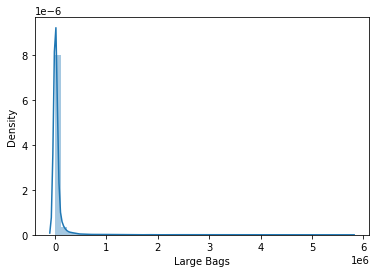

In [213]:
#plotting distribution plot
sns.distplot(data['Large Bags'],kde=True)
plt.show()

**By looking at the plot we can see data is not normally distributed nad hence skewness is present and further will confirm at the time of checking skewness, and if it is present than will treat it either by using log transformer or by using power transformer.**

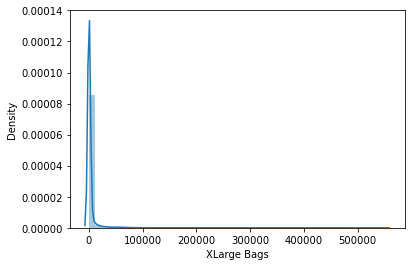

In [214]:
#plotting distribution plot
sns.distplot(data['XLarge Bags'],kde=True)
plt.show()

**By looking at the plot we can see data is not normally distributed nad hence skewness is present and further will confirm at the time of checking skewness, and if it is present than will treat it either by using log transformer or by using power transformer.**

In [338]:
#Checking the value count of type
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

**In this 9126 conventional type of avocado is there and 9123 organic type of avocado is there.**

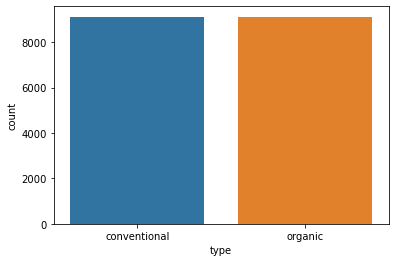

In [216]:
#Plotting count plot
sns.countplot(x='type',data=data)
plt.show()

**By looking athe plot we can see that in this dataset moreover equal number of conventional and organic type of avocado is there.**

In [607]:
#Checking the value count for region
data.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

**we can see that most of the region have same value counts except region westTexNewMexico.**

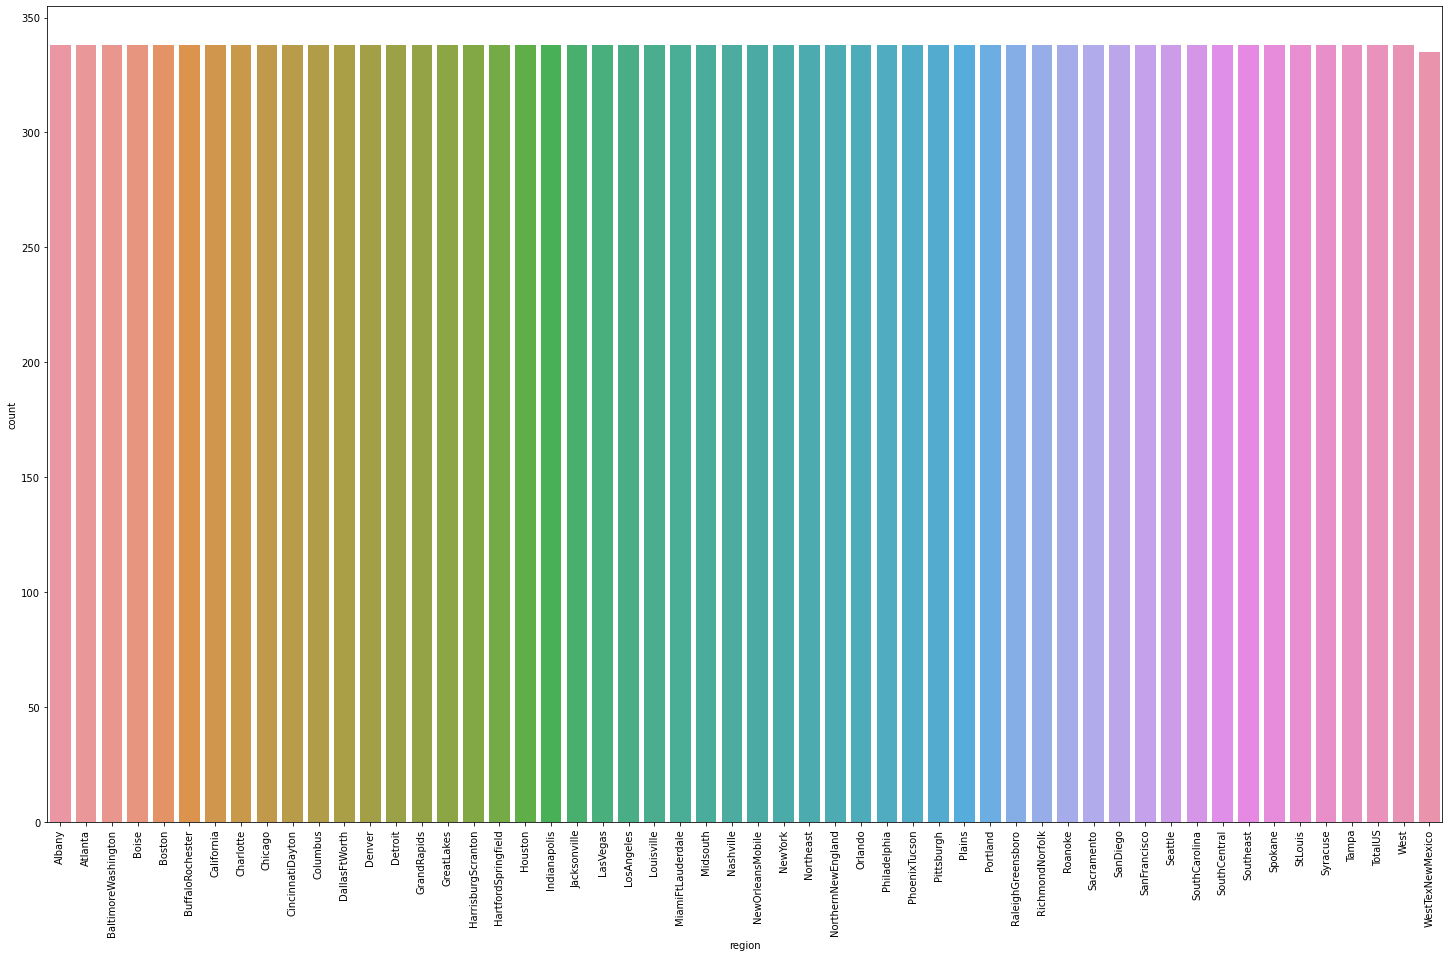

In [217]:
#Plotting count plot
plt.figure(figsize=(25,15))
sns.countplot(x='region',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the region have same value counts except region westTexNewMexico.**

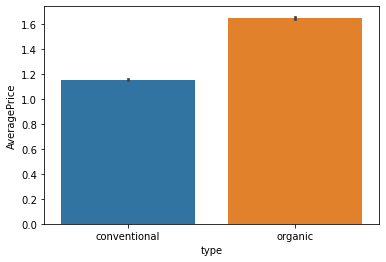

In [219]:
#Plotting bar plot
sns.barplot(x='type',y='AveragePrice',data=data)
plt.show()

**By looking at the plot we can see that average price of organic type of avocado is more than that of Conventional type of avocado.**

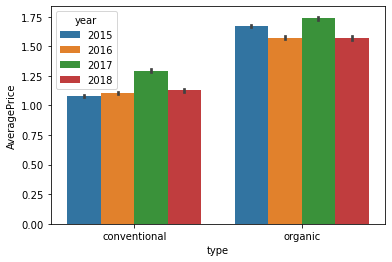

In [609]:
#Plotting bar plot
sns.barplot(x='type',y='AveragePrice',hue='year',data=data)
plt.show()

**By looking at the plot we can see that conventional type highest average price was in year 2017 and for organic type highest average price was also in year 2017.**

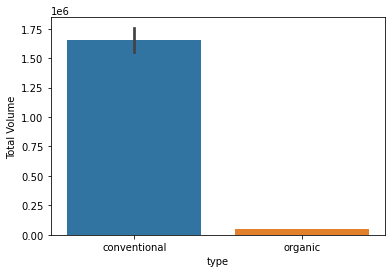

In [610]:
#Plotting bar plot
sns.barplot(x='type',y='Total Volume',data=data)
plt.show()

**By looking at the plot we can see that Most of the avocados were sold of conventional type.**

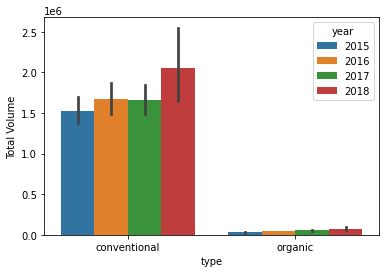

In [611]:
#Plotting bar plot
sns.barplot(x='type',y='Total Volume',hue='year',data=data)
plt.show()

**By looking at the plot we can say that in year 2018 highest number of avocados were sold of both convetional as well as organic type.**

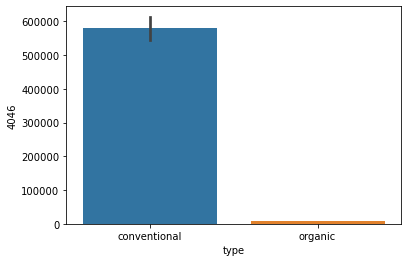

In [612]:
#Plotting bar plot
sns.barplot(x='type',y='4046',data=data)
plt.show()

**By looking at the plot we can say that most number avocados with plu code 4046 were sold of conventional type.**  

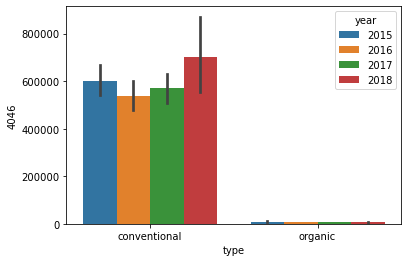

In [293]:
#Plotting bar plot
sns.barplot(x='type',y='4046',hue='year',data=data)
plt.show()

**By looking at the plot we can see that most number of avocados with plu code 4046 of convetional type were sold in year 2018 and for organic type it looks the same for every year.**

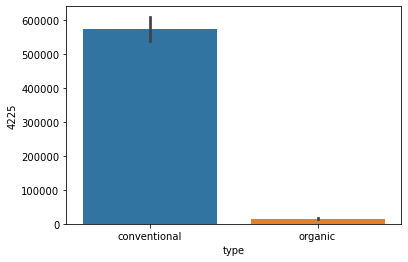

In [222]:
#Plotting bar plot
sns.barplot(x='type',y='4225',data=data)
plt.show()

**By looking at the plot we can say that most number avocados with plu code 4225 were sold of conventional type.**  

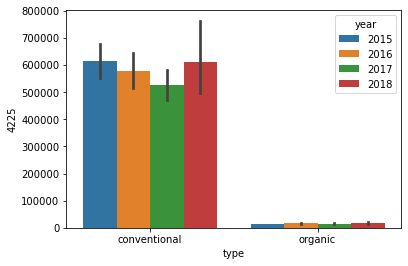

In [294]:
#Plotting bar plot
sns.barplot(x='type',y='4225',hue='year',data=data)
plt.show()

**By looking at the plot we can say that most number avocados with plu code 4225 were sold of conventional type in year 2015 and of organic type its more over same for every year.**  

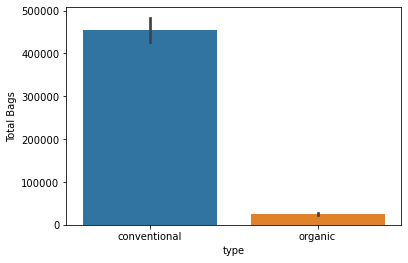

In [223]:
#Plotting bar plot
sns.barplot(x='type',y='Total Bags',data=data)
plt.show()

**By looking at the plot we can say that most number bags were sold of conventional type avocado.**  

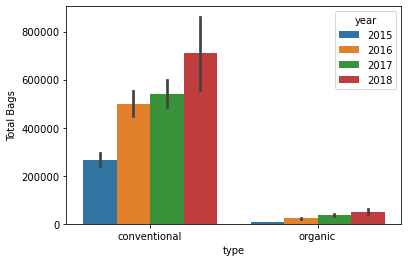

In [295]:
#Plotting bar plot
sns.barplot(x='type',y='Total Bags',hue='year',data=data)
plt.show()

**By looking at the plot we can say that most number bags were sold of conventional type and organic type avocado in year 2018.**  

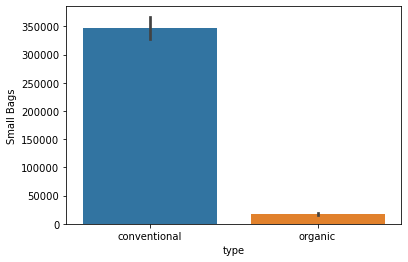

In [224]:
#Plotting bar plot
sns.barplot(x='type',y='Small Bags',data=data)
plt.show()

**By looking at the plot we can say that most number of small bags were sold of conventional type avocado.**  

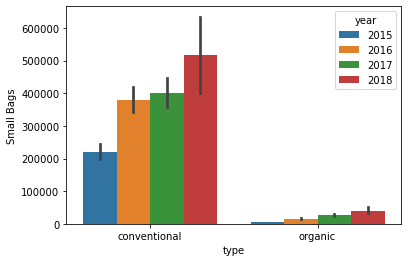

In [296]:
#Plotting bar plot
sns.barplot(x='type',y='Small Bags',hue='year',data=data)
plt.show()

**By looking at the plot we can say that most number of small bags were sold of conventional and organic type avocado in year 2018.**  

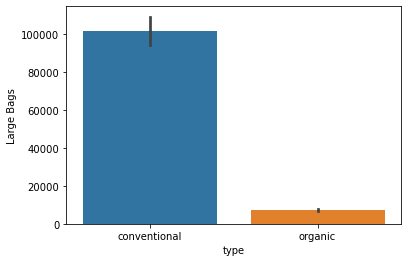

In [225]:
#Plotting bar plot
sns.barplot(x='type',y='Large Bags',data=data)
plt.show()

**By looking at the plot we can say that most number of large bags were sold of conventional type avocado.**  

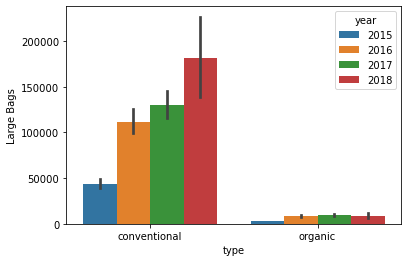

In [613]:
#Plotting bar plot
sns.barplot(x='type',y='Large Bags',hue='year',data=data)
plt.show()

**By looking at the plot we can say that most number of small bags were sold of conventional type of avocado in year 2018 and organic type avocado in 2017 .**  

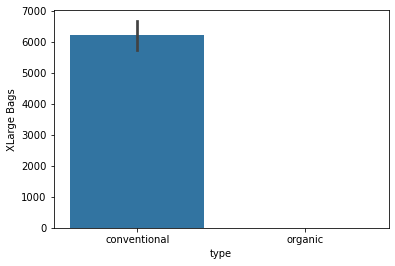

In [614]:
#Plotting bar plot
sns.barplot(x='type',y='XLarge Bags',data=data)
plt.show()

**By looking at the plot we can say that most number of xlarge bags were sold of conventional type avocado.**  

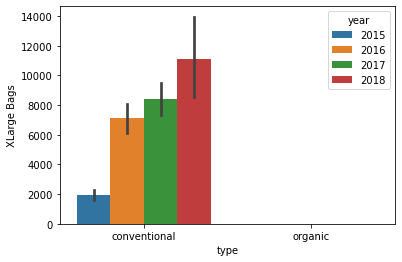

In [615]:
#Plotting bar plot
sns.barplot(x='type',y='XLarge Bags',hue='year',data=data)
plt.show()

**By looking at the plot we can say that most number of xlarge bags were sold of conventional type avocado in 2018.**  

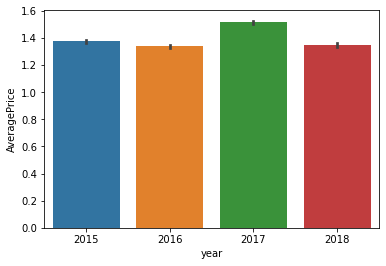

In [616]:
#Plotting bar plot
sns.barplot(x='year',y='AveragePrice',data=data)
plt.show()

**By looking at the pplot we can see that in 2018 highest average price was there as compared to rest of the years.**

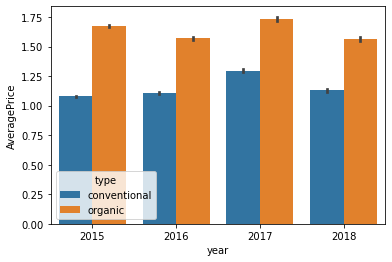

In [617]:
#Plotting bar plot
sns.barplot(x='year',y='AveragePrice',hue='type',data=data)
plt.show()

**By looking at the plot we can say that every year average prcie of organic is more than that of convenntional type of avocado.**

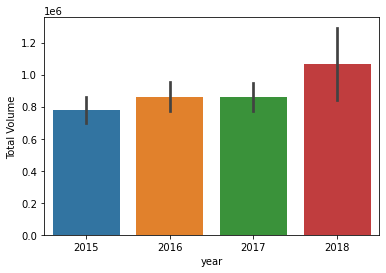

In [618]:
#Plotting bar plot
sns.barplot(x='year',y='Total Volume',data=data)
plt.show()

**Overall highest number of avocados were sold in year 2018.**

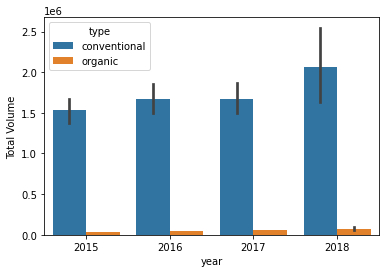

In [619]:
#Plotting bar plot
sns.barplot(x='year',y='Total Volume',hue='type',data=data)
plt.show()

**Every year most of the conventional type of avocado is sold rather as compared to organic type.**

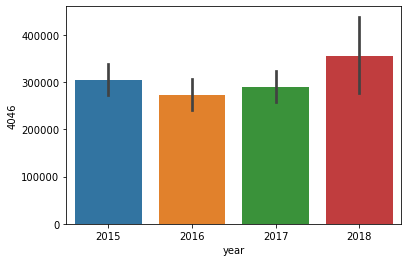

In [620]:
#Plotting bar plot
sns.barplot(x='year',y='4046',data=data)
plt.show()

**In year 2018 most of the avocados were sold with plu code 4046 as compared with rest of the years.**

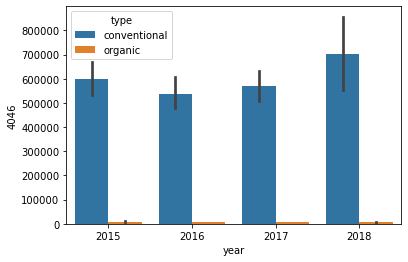

In [621]:
#Plotting bar plot
sns.barplot(x='year',y='4046',hue='type',data=data)
plt.show()

**By looking at the plot we can say that every year most of the avocados with plu code 4046 were sold of conventional type.**

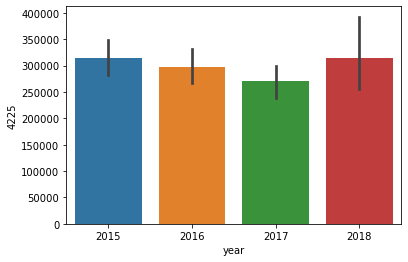

In [622]:
#Plotting bar plot
sns.barplot(x='year',y='4225',data=data)
plt.show()

**In year 2018 most of the avocados were sold with plu code 4225 as compared with rest of the years.**

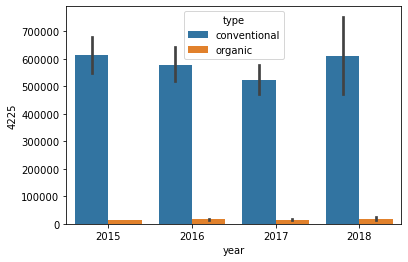

In [623]:
#Plotting bar plot
sns.barplot(x='year',y='4225',hue='type',data=data)
plt.show()

**By looking at the plot we can say that every year most of the avocados with plu code 4225 were sold of conventional type.**

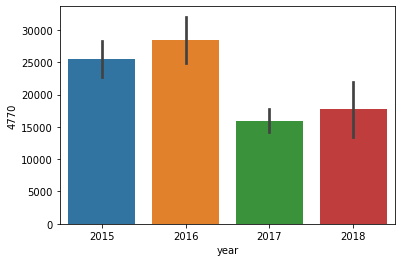

In [624]:
#Plotting bar plot
sns.barplot(x='year',y='4770',data=data)
plt.show()

**In year 2016 most of the avocados were sold with plu code 4770 as compared with rest of the years.**

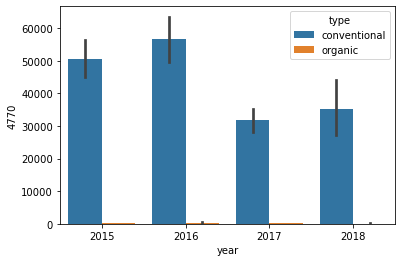

In [625]:
#Plotting bar plot
sns.barplot(x='year',y='4770',hue='type',data=data)
plt.show()

**By looking at the plot we can say that every year most of the avocados with plu code 4770 were sold of conventional type.**

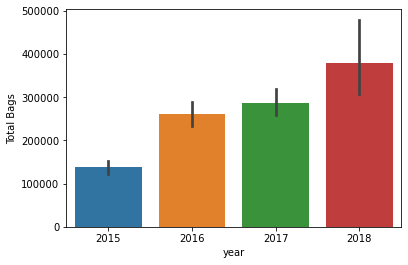

In [626]:
#Plotting bar plot
sns.barplot(x='year',y='Total Bags',data=data)
plt.show()

**Most of the bags were sold In year 2018 as compared with rest of the years.**

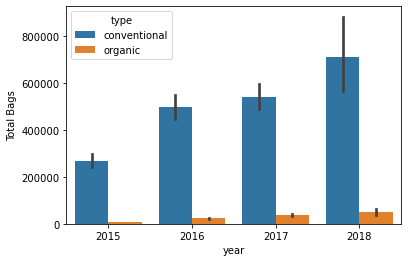

In [627]:
#Plotting bar plot
sns.barplot(x='year',y='Total Bags',hue='type',data=data)
plt.show()

**By looking at the plot we can say that every year most of the bags were sold of conventional type.**

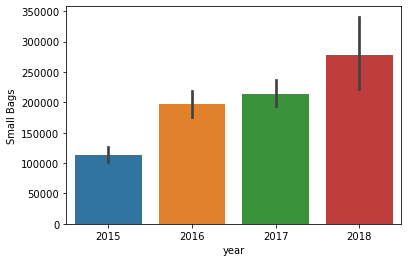

In [628]:
#Plotting bar plot
sns.barplot(x='year',y='Small Bags',data=data)
plt.show()

**Most of the small bags were sold In year 2018 as compared with rest of the years.**

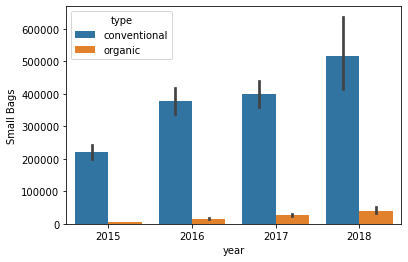

In [629]:
#Plotting bar plot
sns.barplot(x='year',y='Small Bags',hue='type',data=data)
plt.show()

**By looking at the plot we can say that every year most of the small bags were sold of conventional type.**

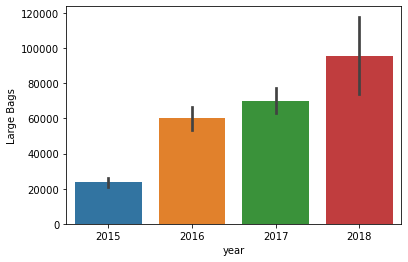

In [630]:
#Plotting bar plot
sns.barplot(x='year',y='Large Bags',data=data)
plt.show()

**Most of the large bags were sold In year 2018 as compared with rest of the years.**

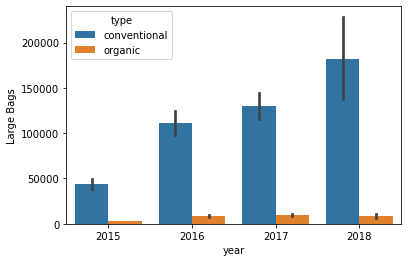

In [631]:
#Plotting bar plot
sns.barplot(x='year',y='Large Bags',hue='type',data=data)
plt.show()

**By looking at the plot we can say that every year most of the large bags were sold of conventional type.**

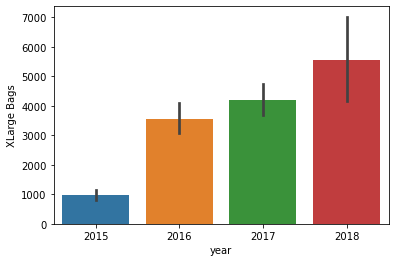

In [632]:
#Plotting bar plot
sns.barplot(x='year',y='XLarge Bags',data=data)
plt.show()

**Most of the xlarge bags were sold In year 2018 as compared with rest of the years.**

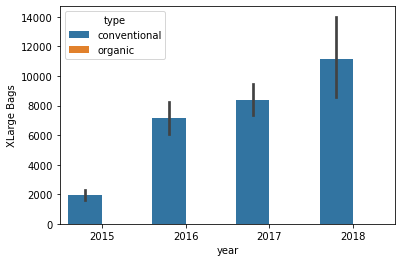

In [633]:
#Plotting bar plot
sns.barplot(x='year',y='XLarge Bags',hue='type',data=data)
plt.show()

**By looking at the plot we can say that every year most of the xlarge bags were sold of conventional type.**

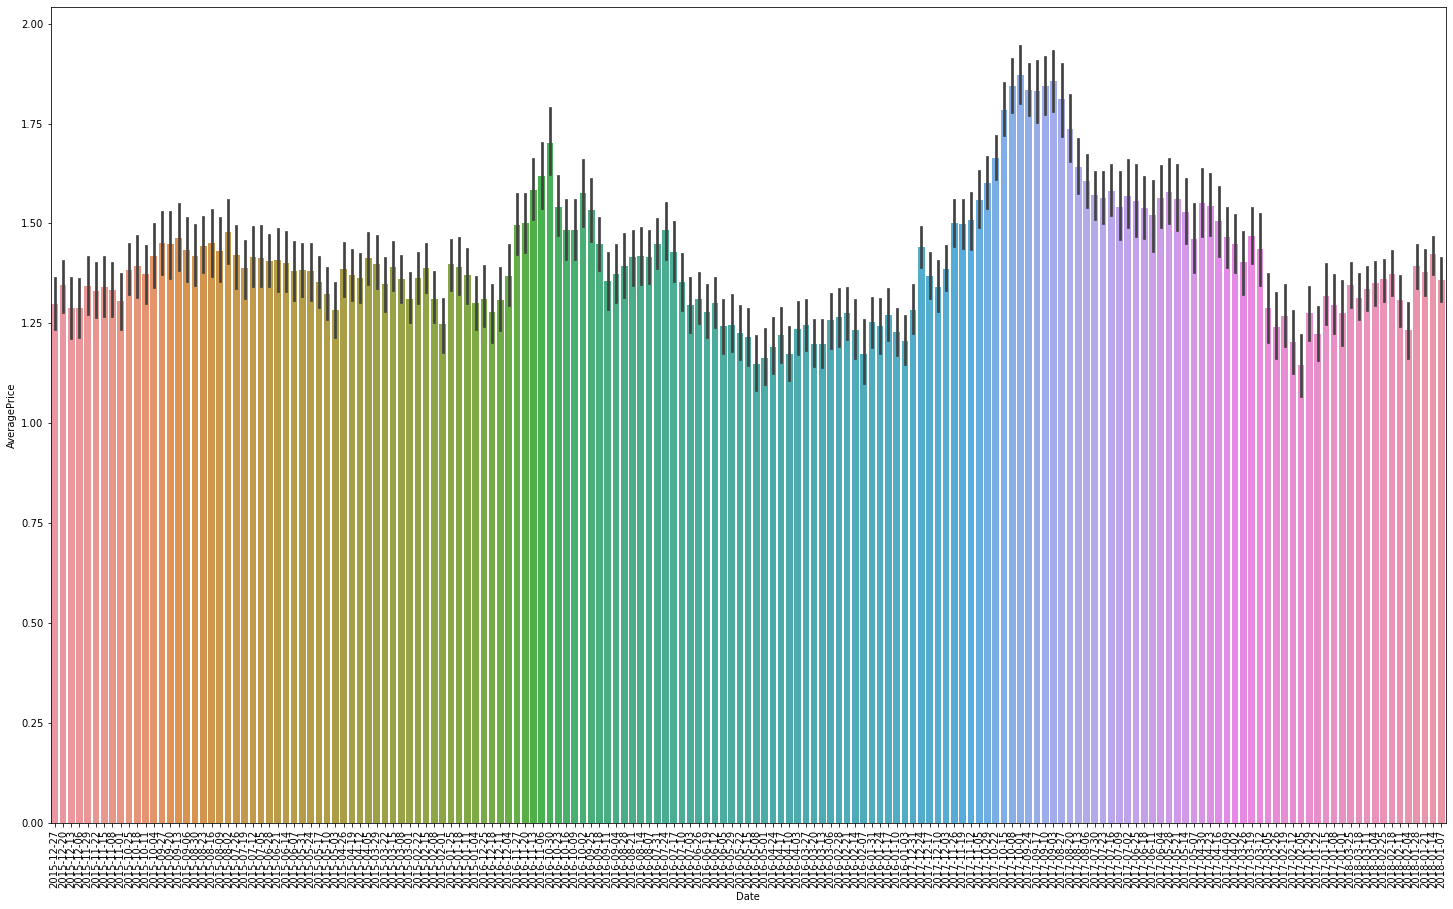

In [228]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see the date wise observation of average price, highest average price was in the year 2017 and least was in the year 2016**

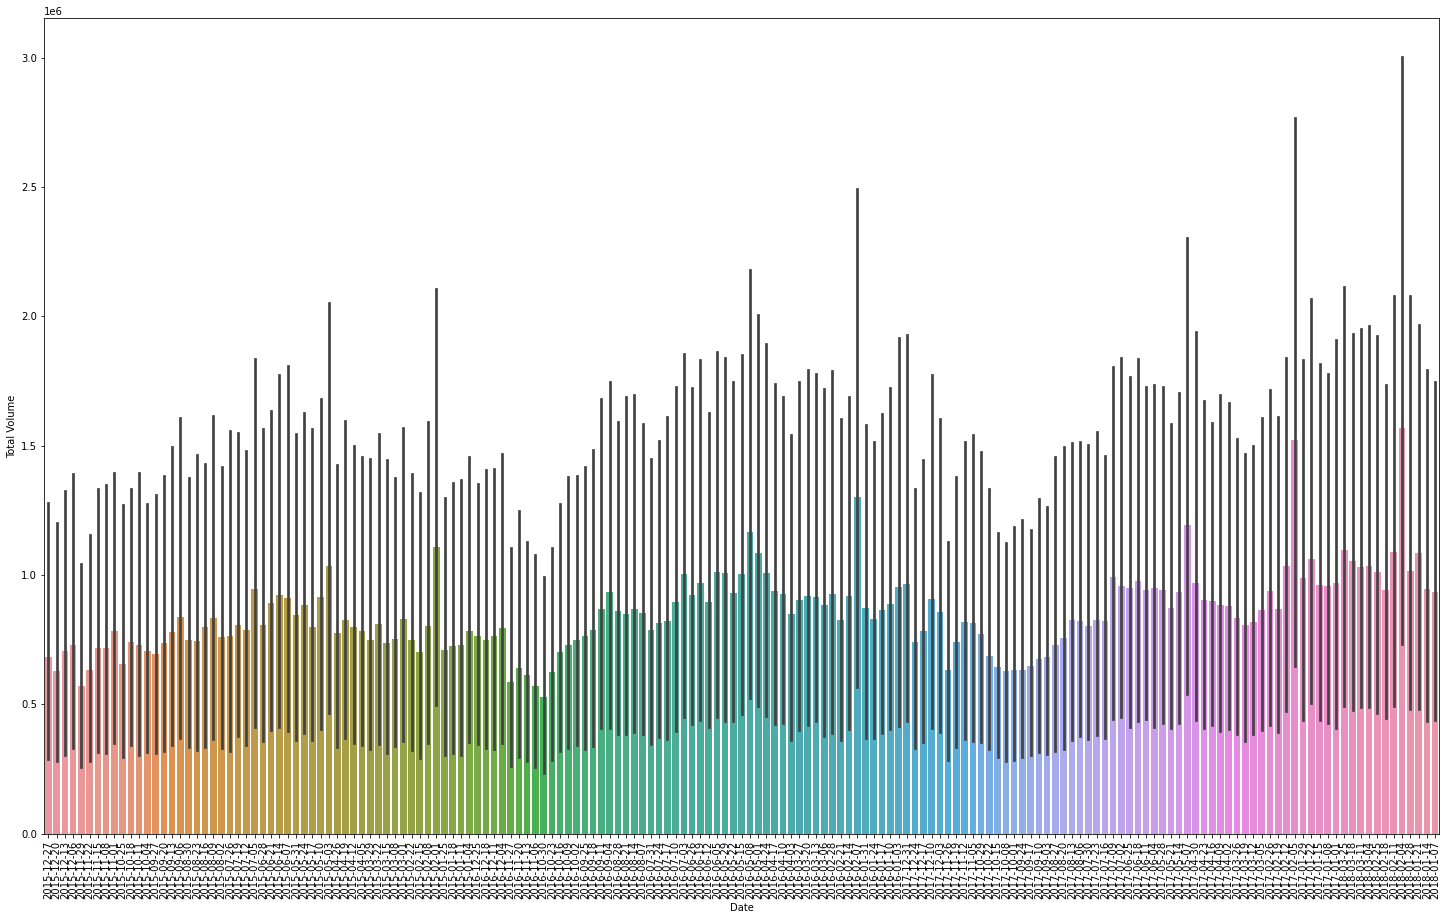

In [67]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='Total Volume',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see the numner of avocados sold as per to date, so we can see that its was uniform and in same days it used to fluctuate.**

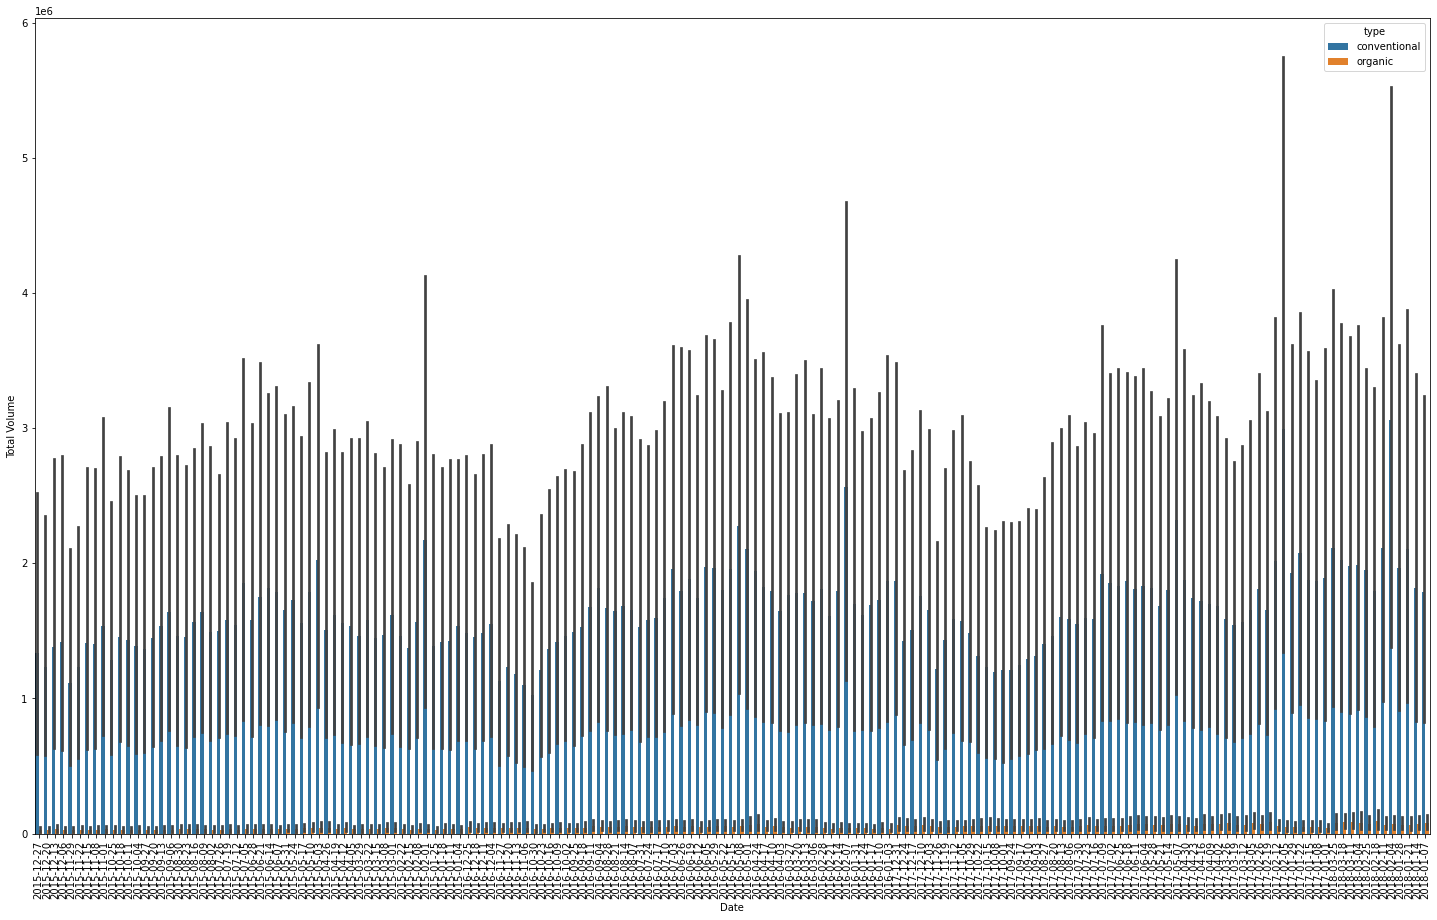

In [311]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='Total Volume',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**BY looking at the plot we can see that most of the times conventional type of avocados were sold.**

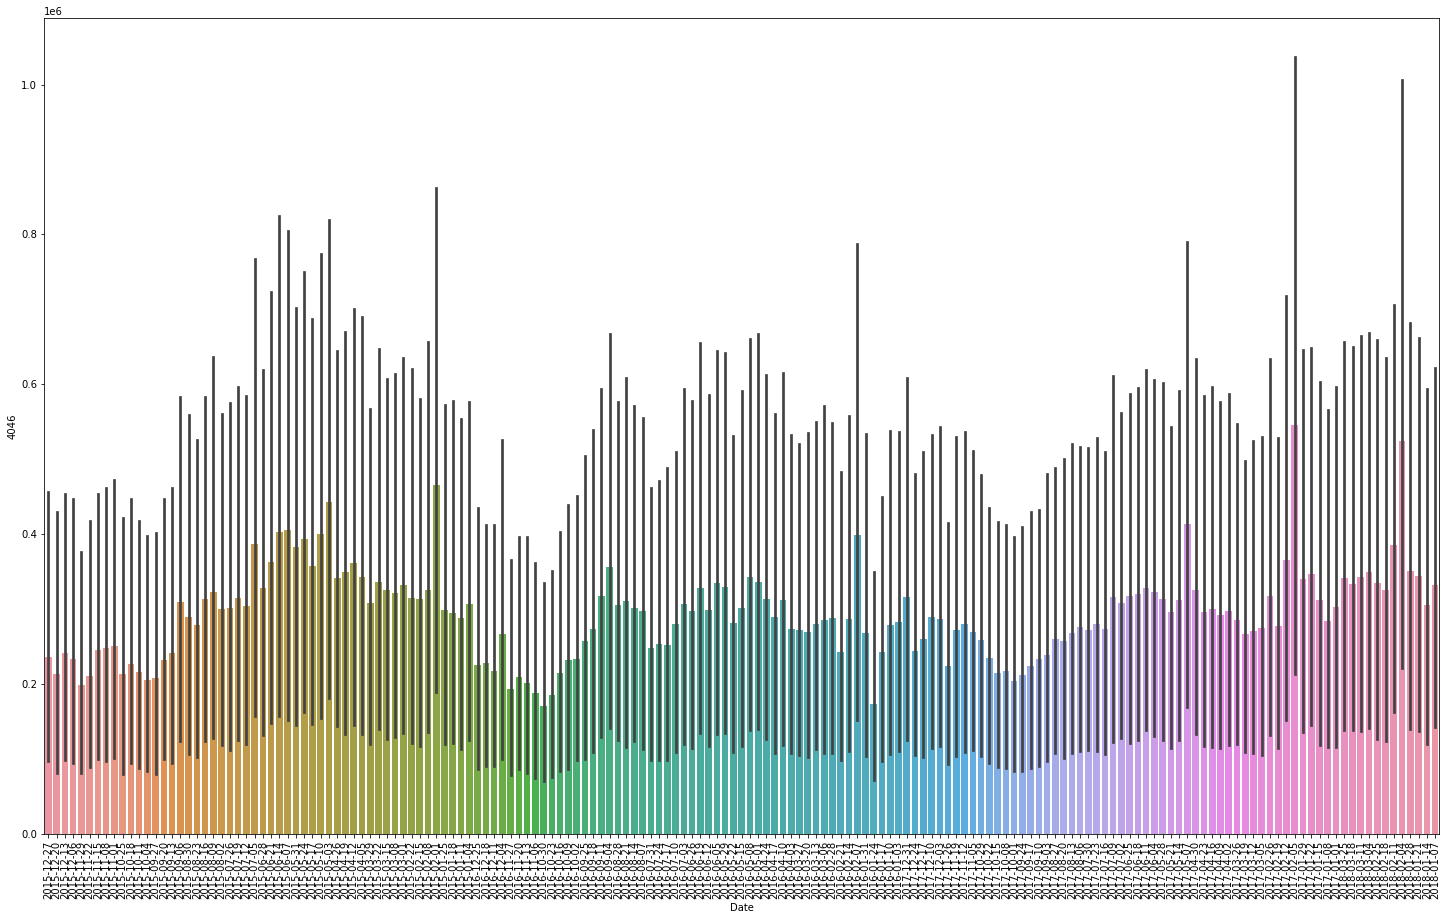

In [68]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='4046',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see howe many avocados with plu code 4046 were sold according to date, so in this highest were sold in the year 2017 and least in year 2016.**

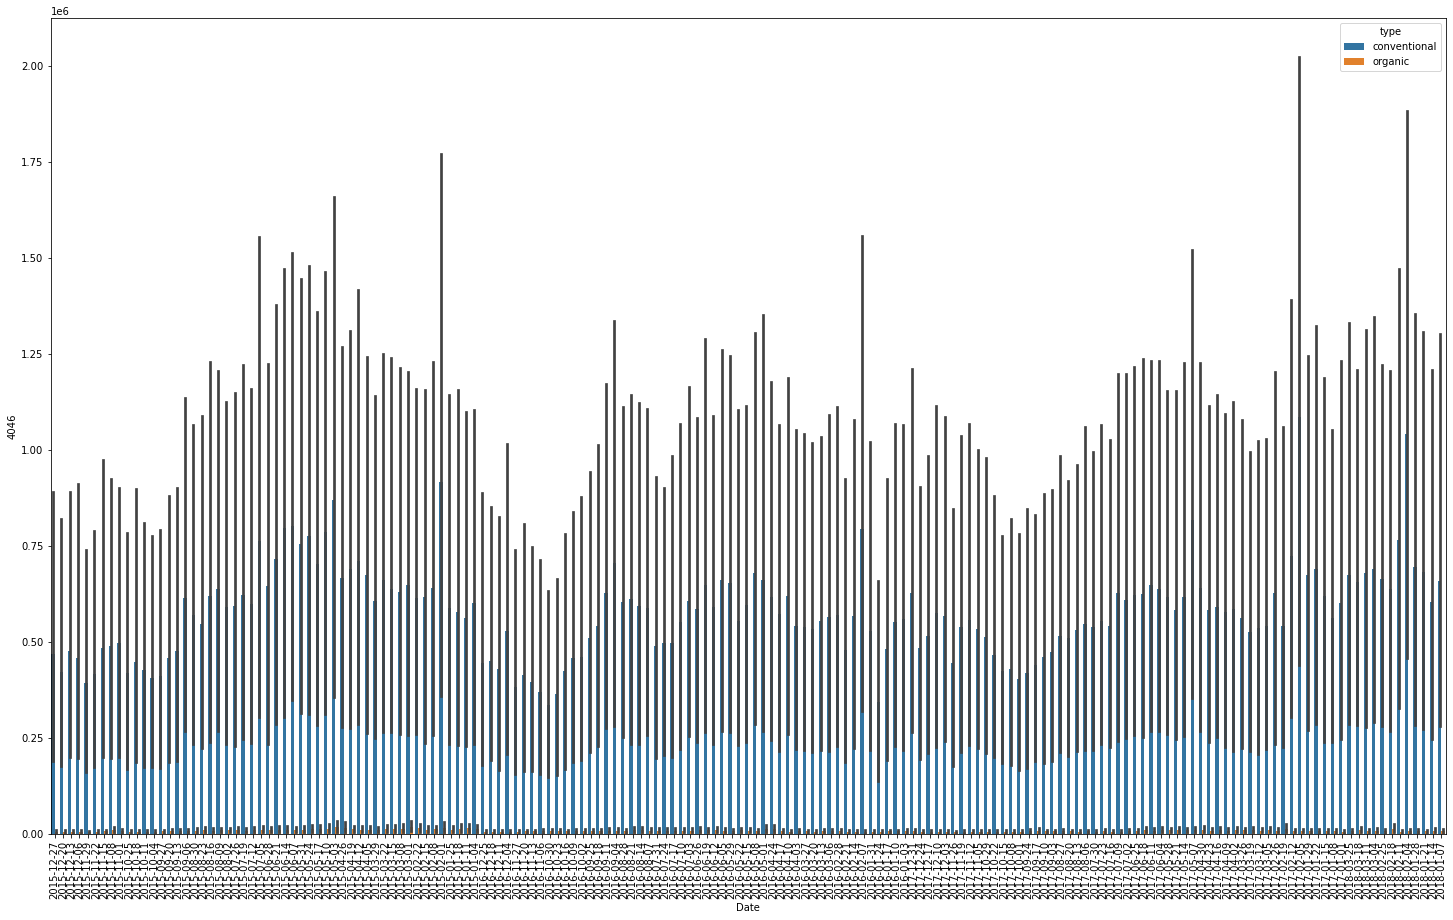

In [312]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='4046',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

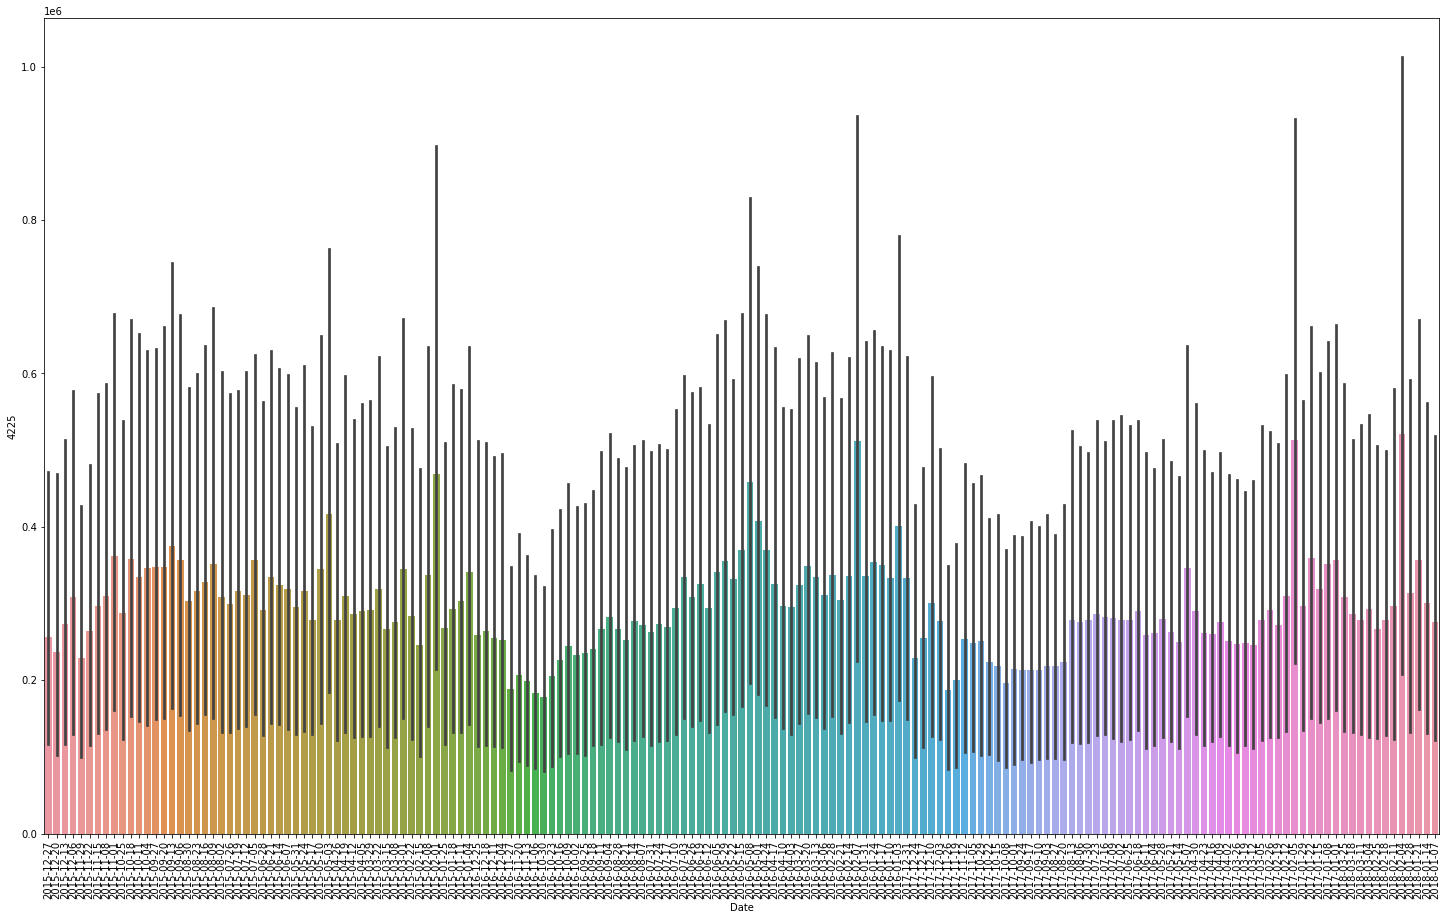

In [69]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='4225',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see how many avocados with plu code 4225 were sold according to date, so in this highest were sold in the year 2017 and least in year 2016.**

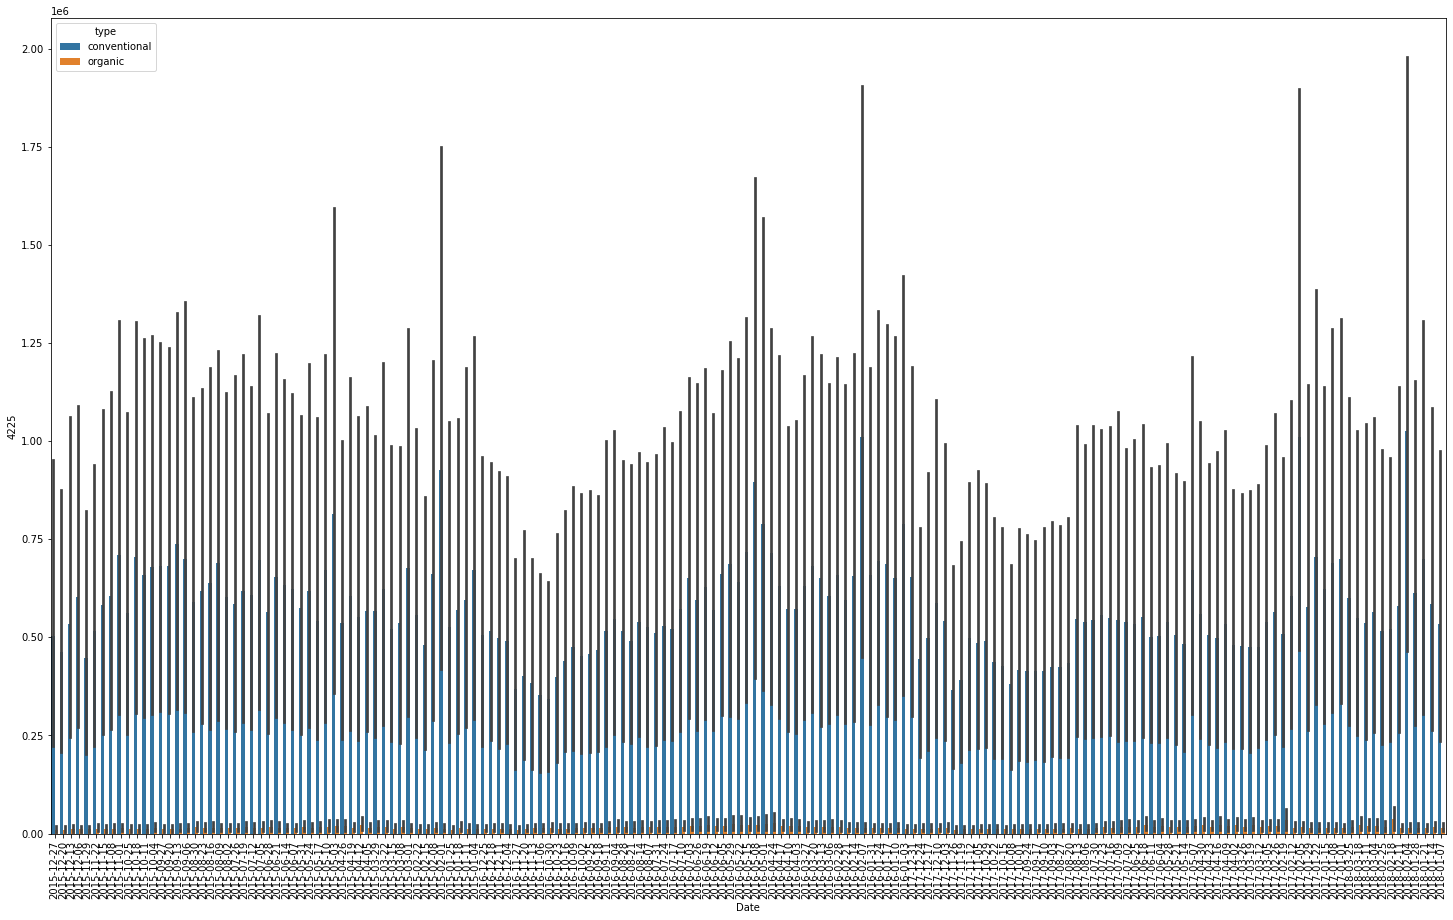

In [313]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='4225',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can say the most of the avocados with plu code 4225 were sold sold of conventional type.**

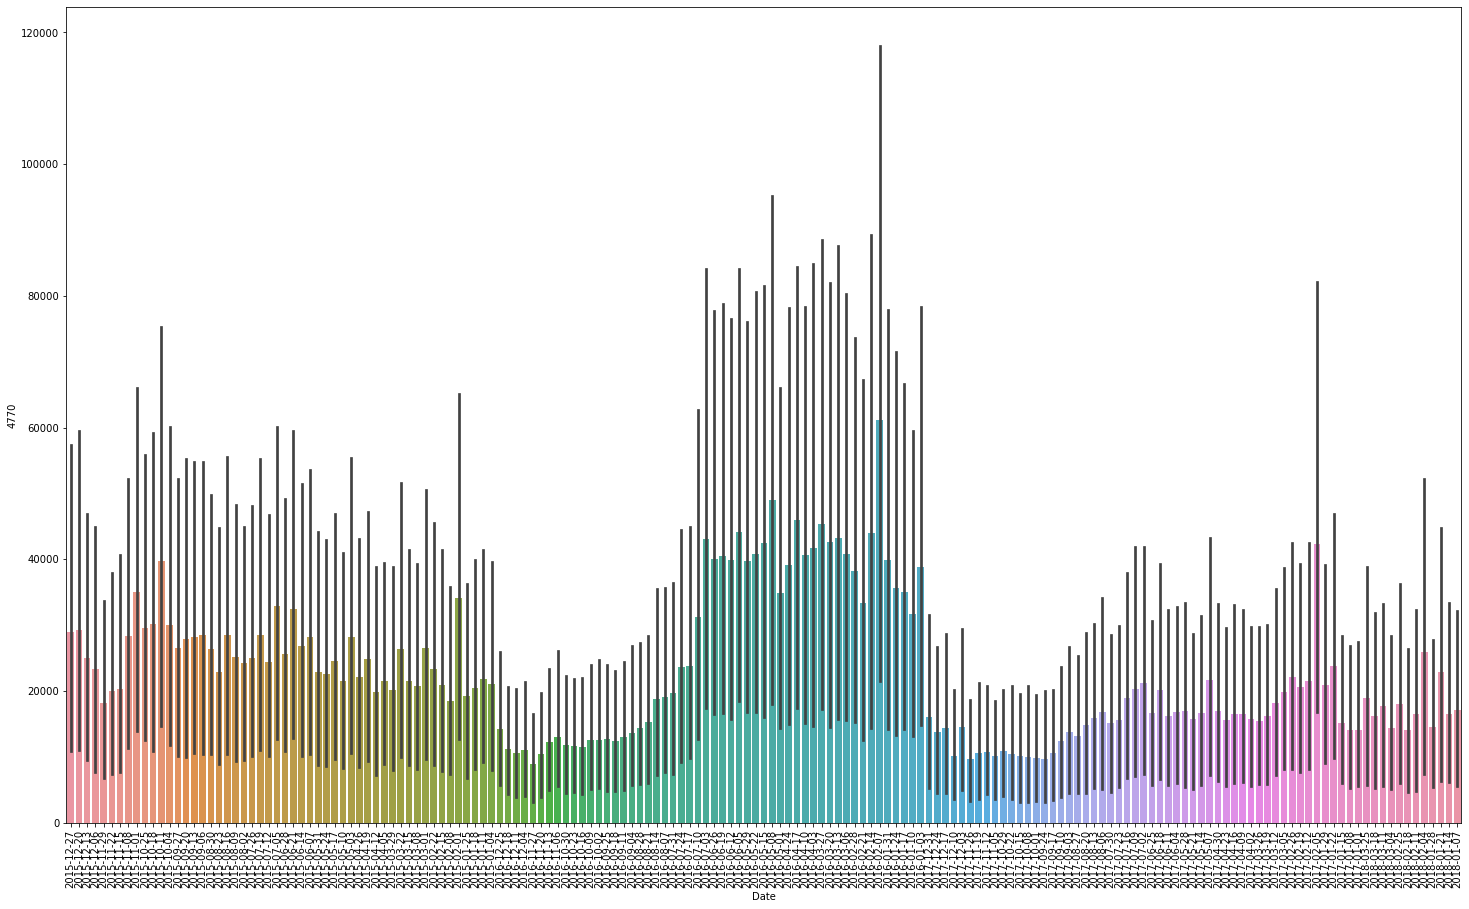

In [70]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='4770',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see how many avocados with plu code 4770 were sold according to date, so in this highest were sold in the year 2016 and least in year 2017.**

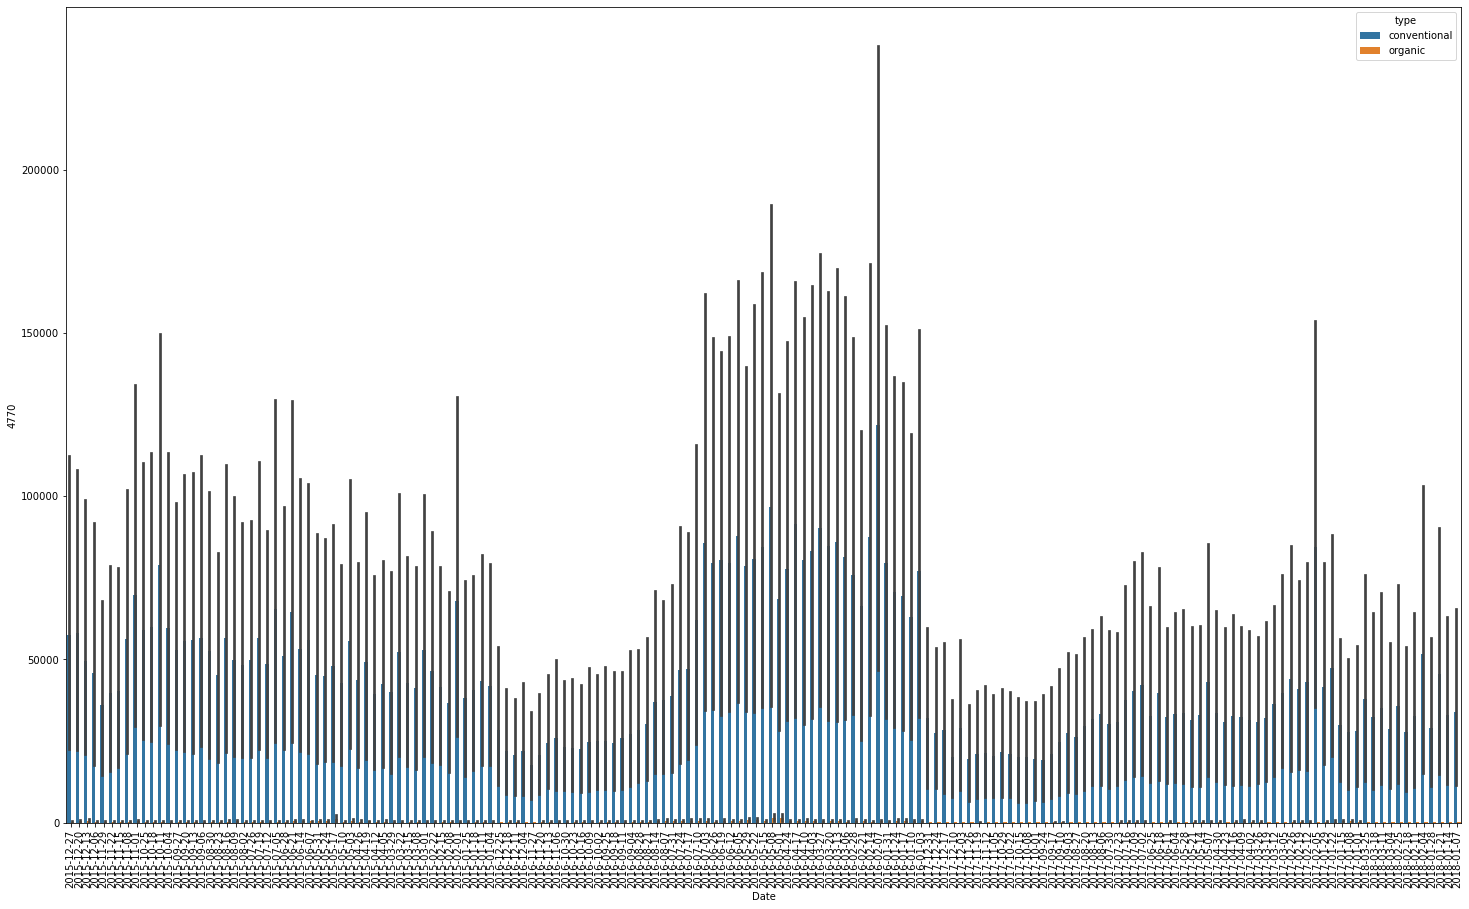

In [634]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='4770',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can say the most of the avocados with plu code 4770 were sold sold of conventional type.**

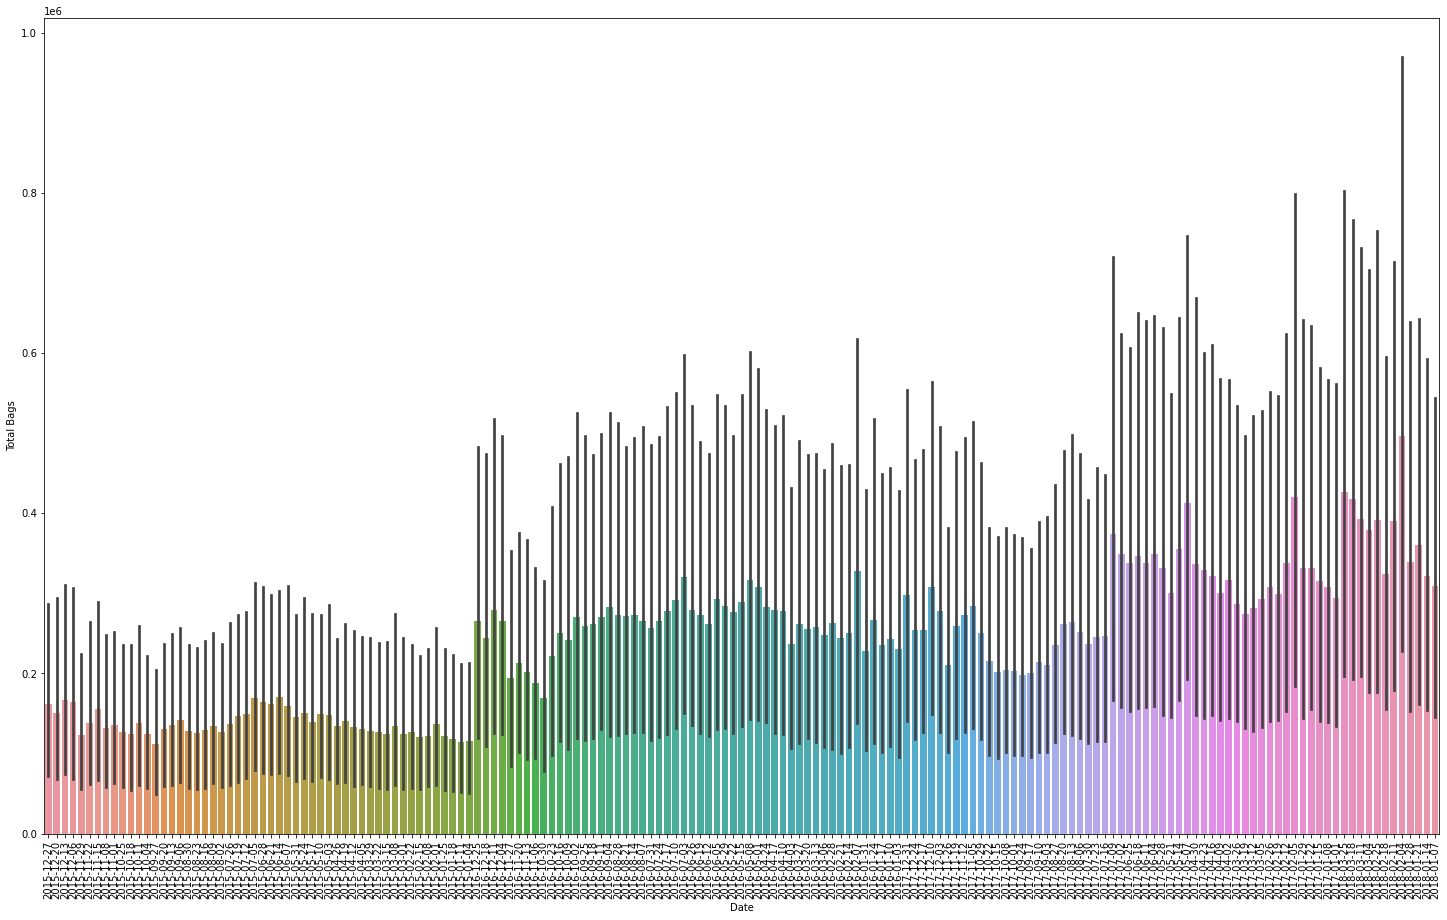

In [635]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='Total Bags',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see how many avocados with plu code 4046 were sold according to date, so in this highest were sold in the year 2017 and least in year 2016.**

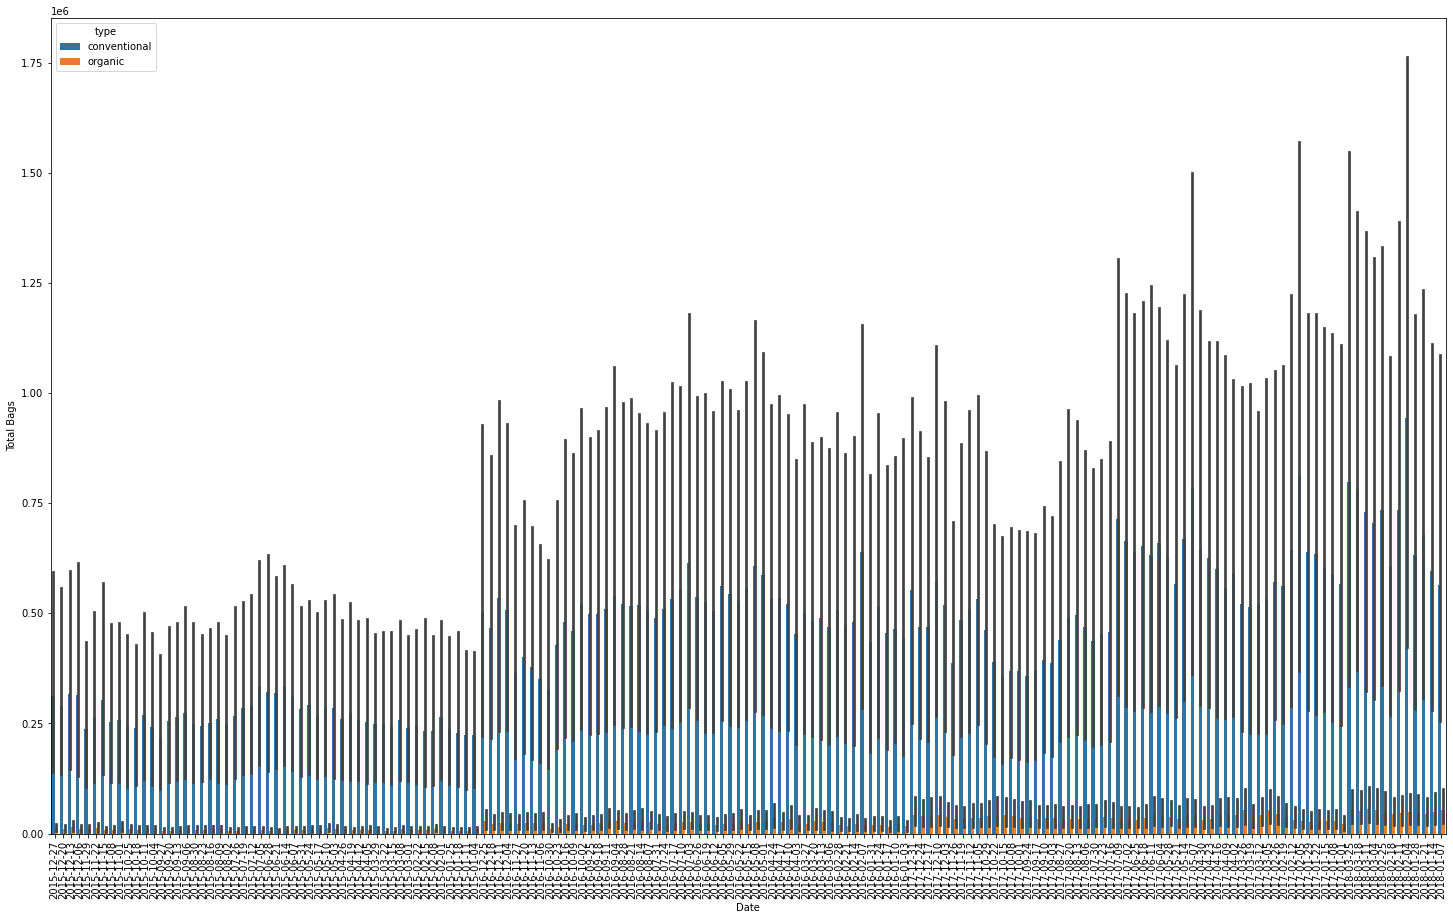

In [315]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='Total Bags',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the bags were sold of conventional type**

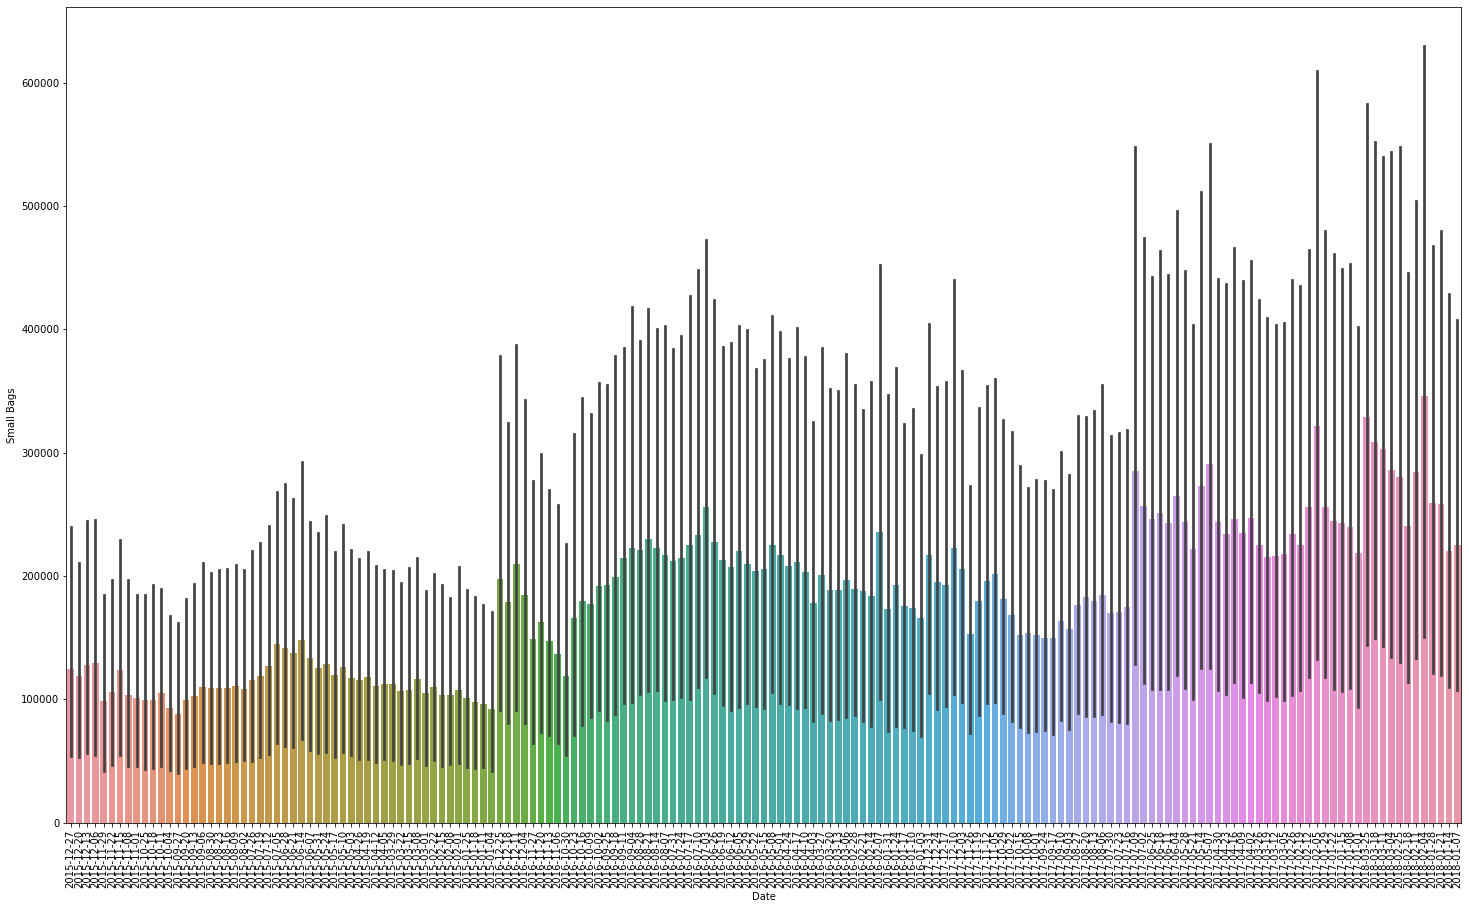

In [72]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='Small Bags',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that number of small bags sold as per date wise.** 

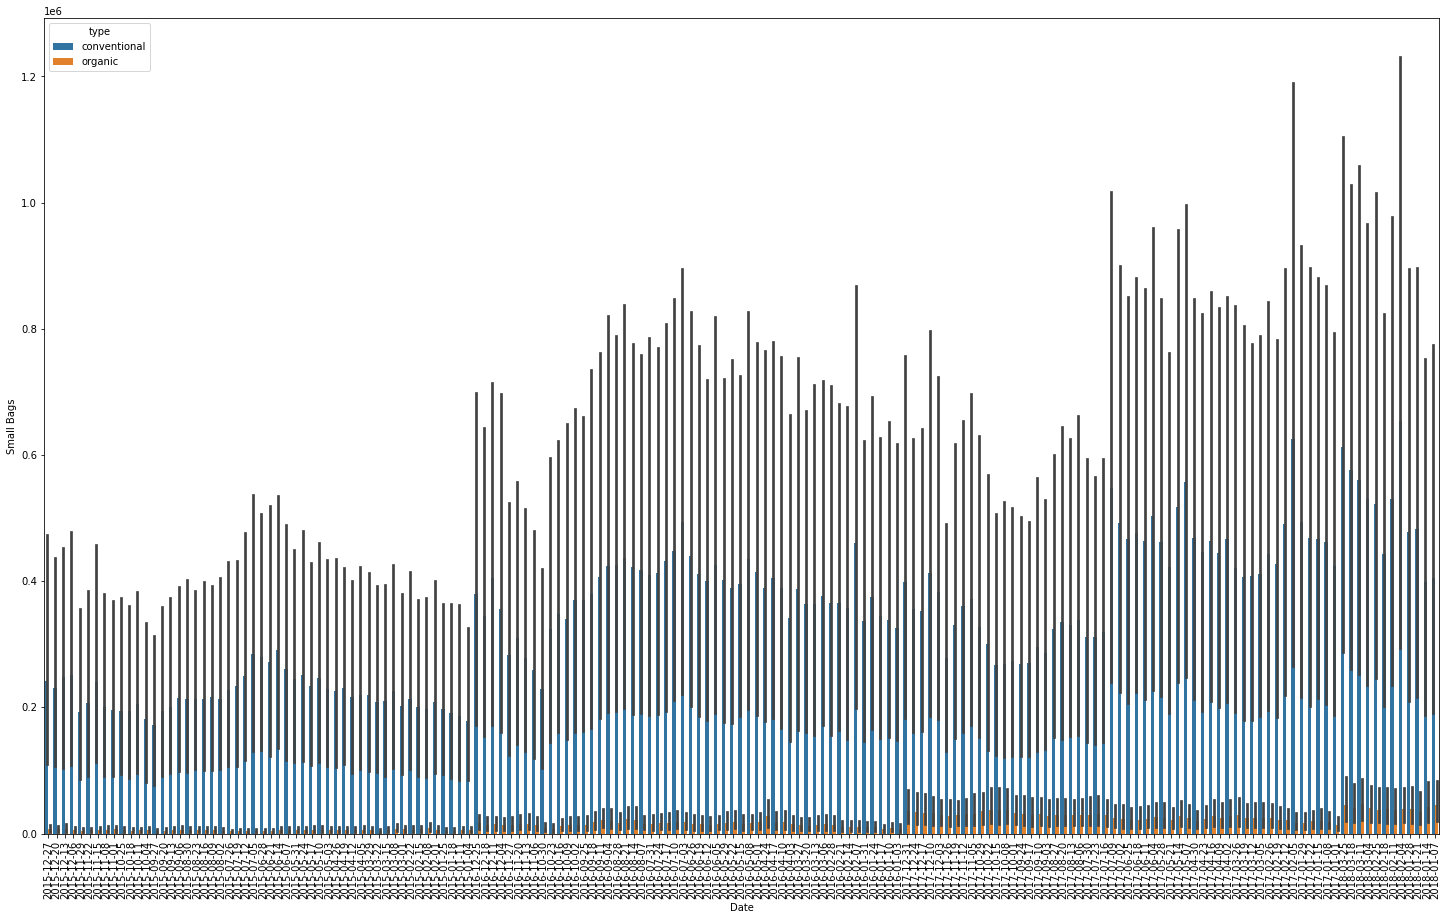

In [316]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='Small Bags',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the small bags were sold of conventional type**

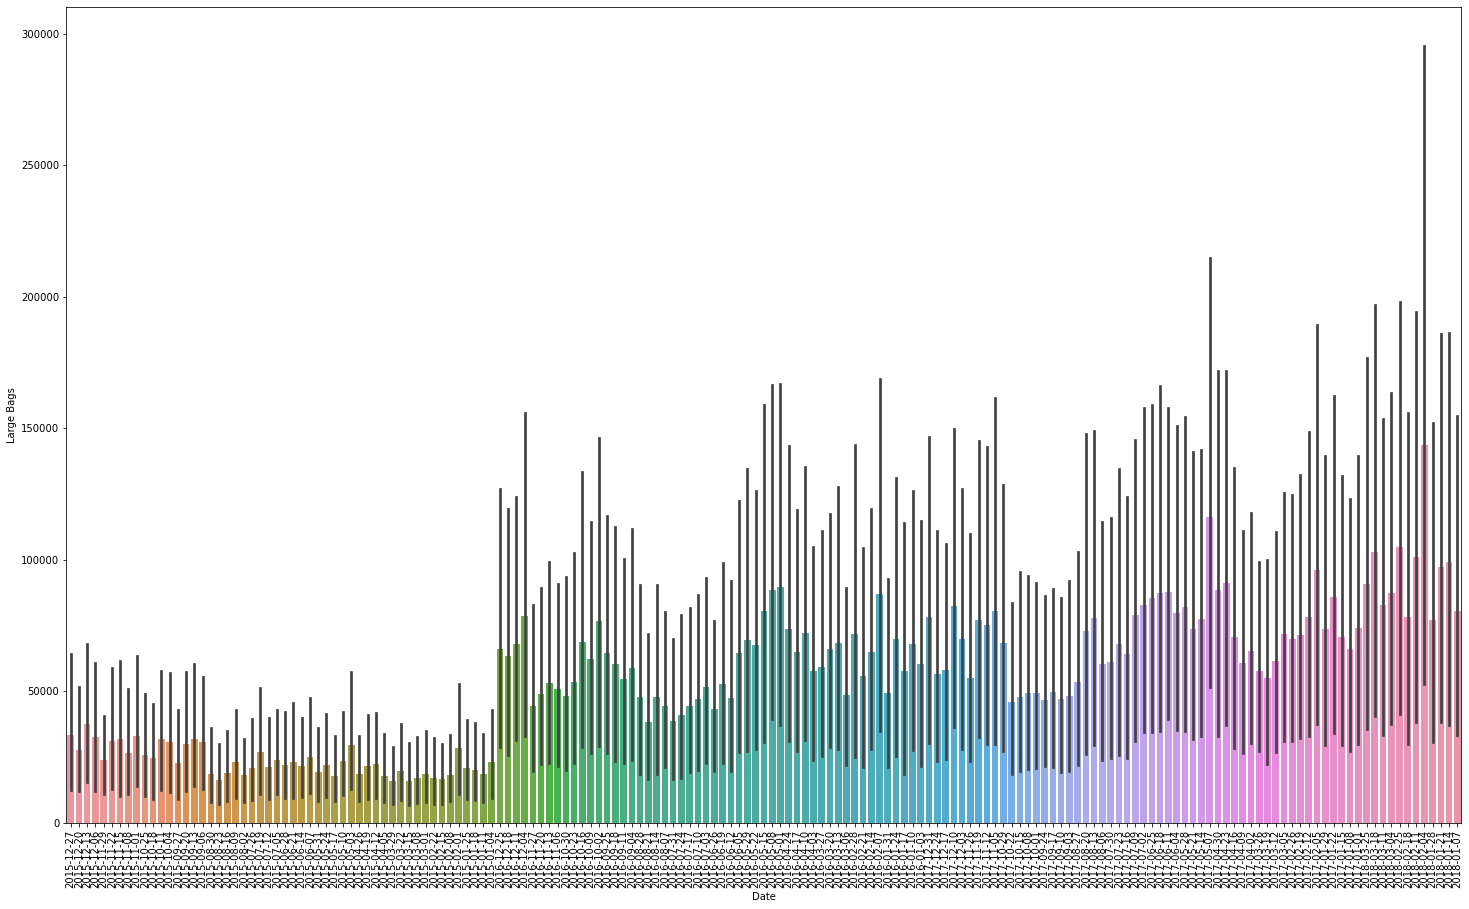

In [73]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='Large Bags',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that number of large bags sold as per date.** 

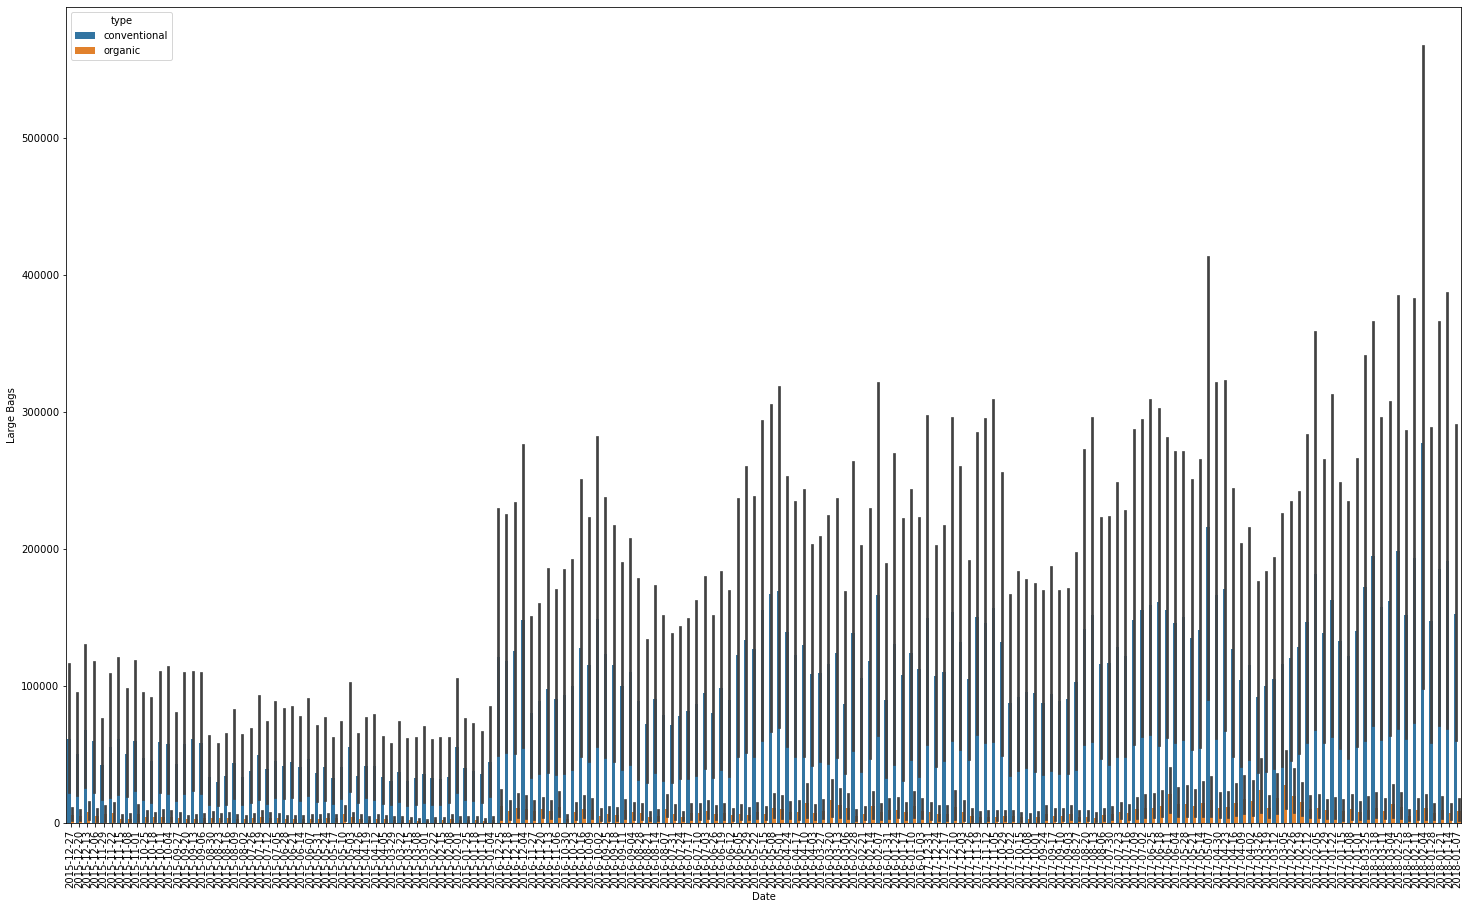

In [317]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='Large Bags',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the large bags were sold of conventional type**

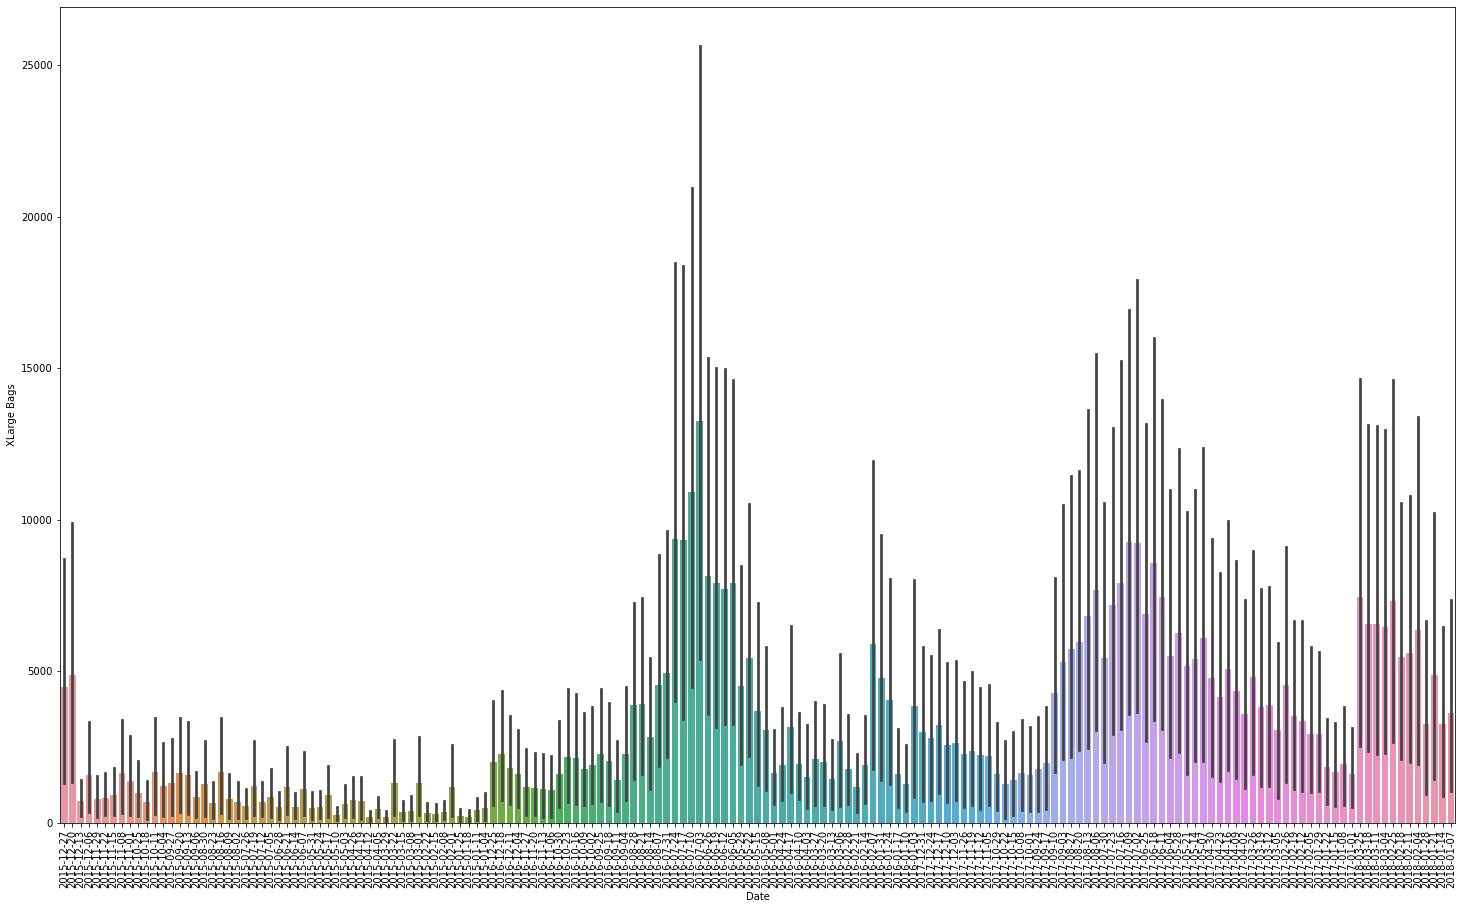

In [74]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='XLarge Bags',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that number of xlarge bags sold as per date wise.** 

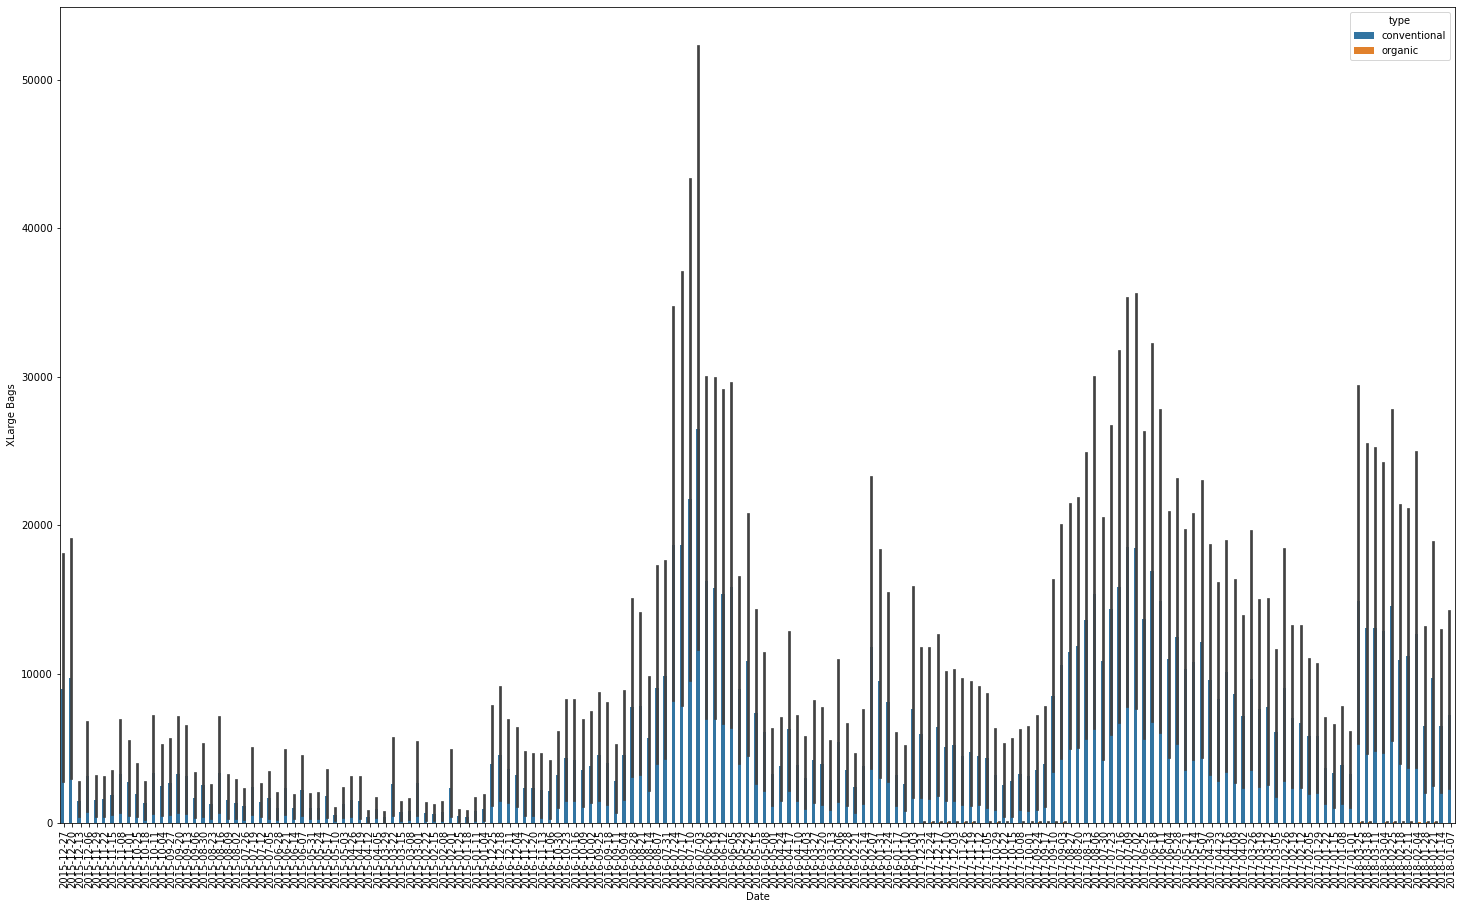

In [318]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='Date',y='XLarge Bags',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the xlarge bags were sold of conventional type**

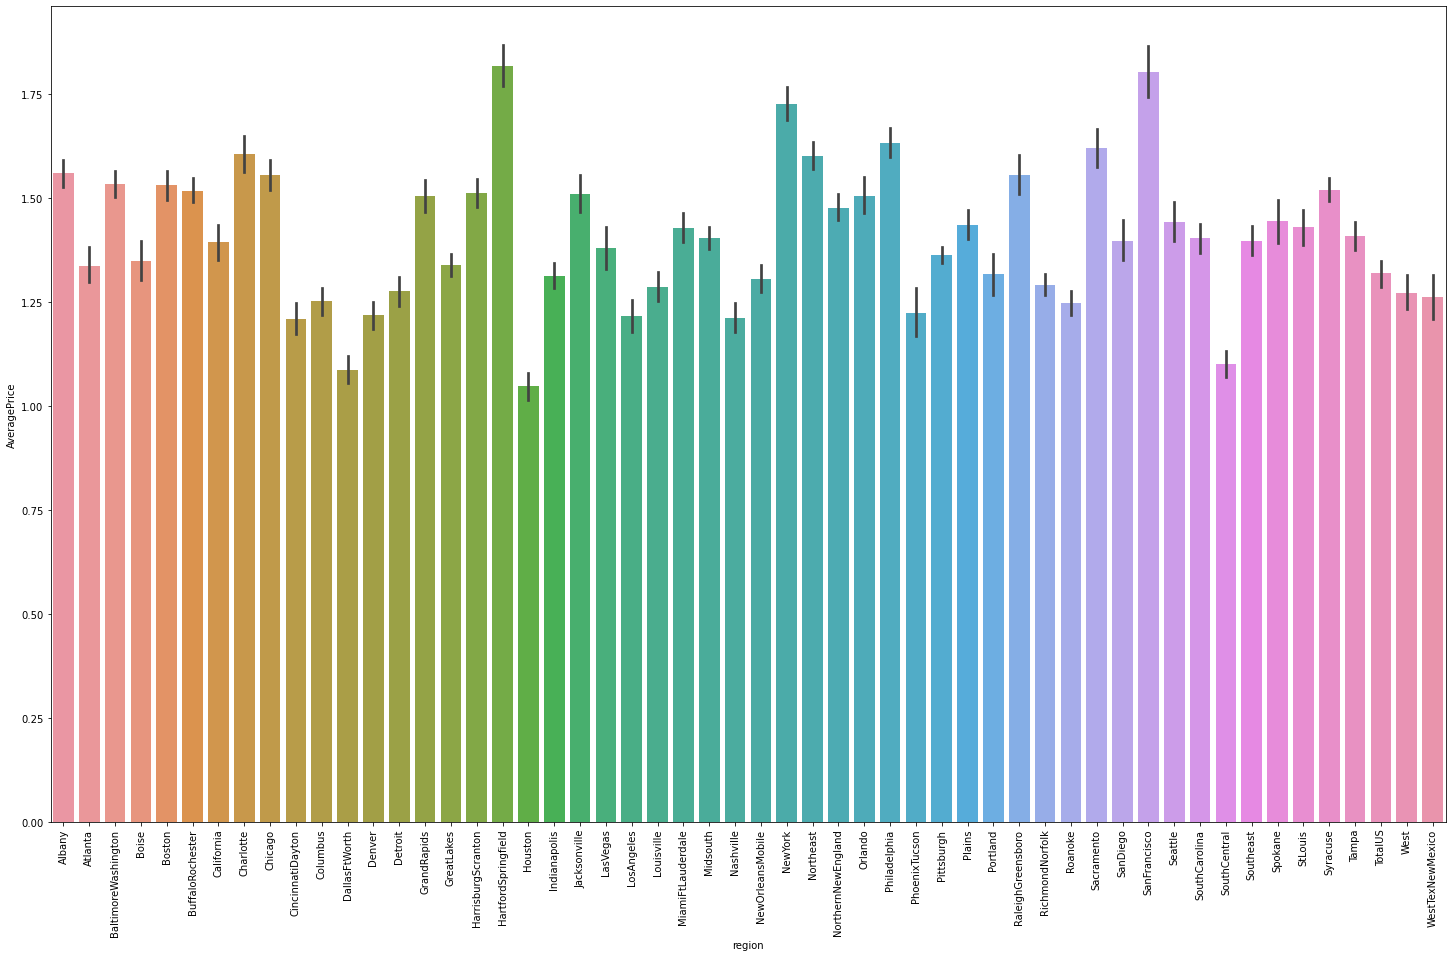

In [75]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that highest average price was observed from the region san francisco and least was from the region houston.**

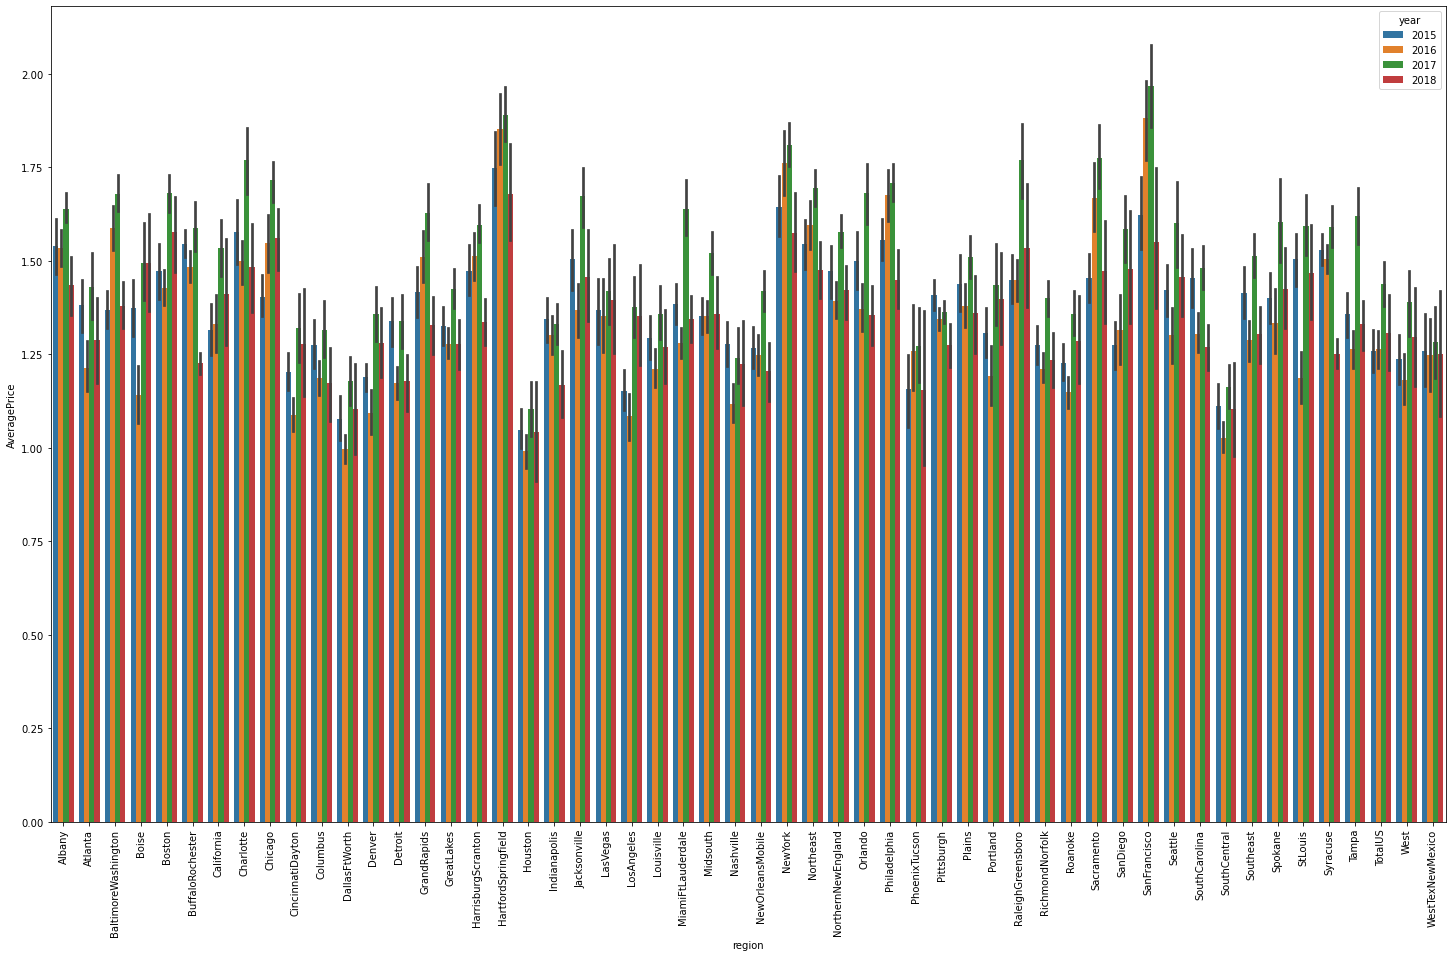

In [636]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='AveragePrice',hue='year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see the year wise bar plot of the regions, from which we can see in every region in which year there highest average price and least average price.**

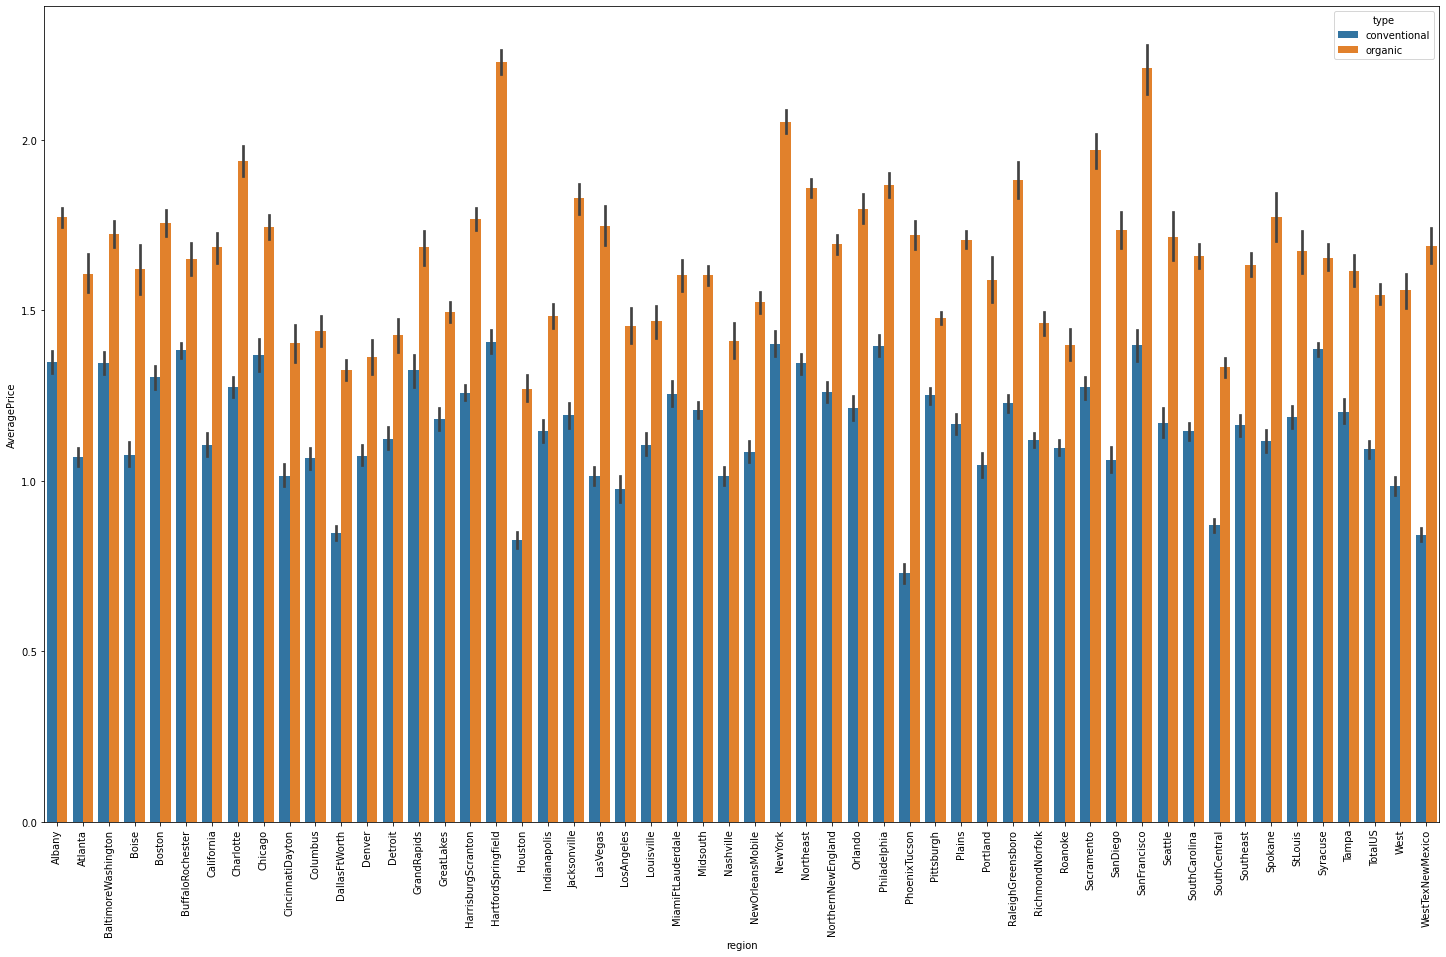

In [320]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that in each and every region organic type of avocado has the highest average price than conventional type of avocado.**

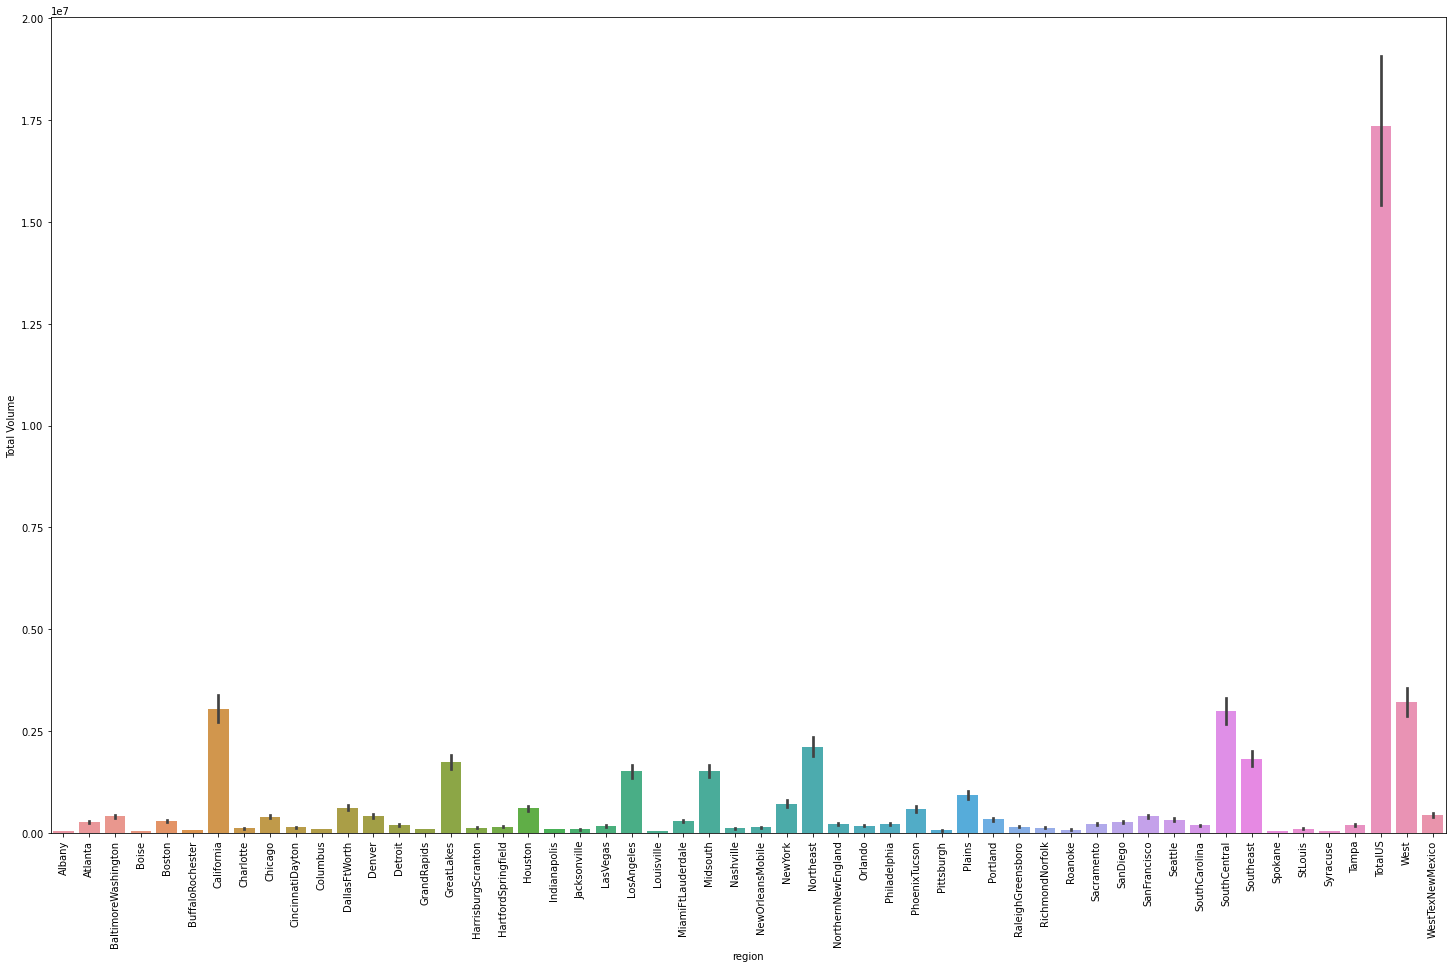

In [76]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Total Volume',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most number of avocados were sold from the region totalus.**

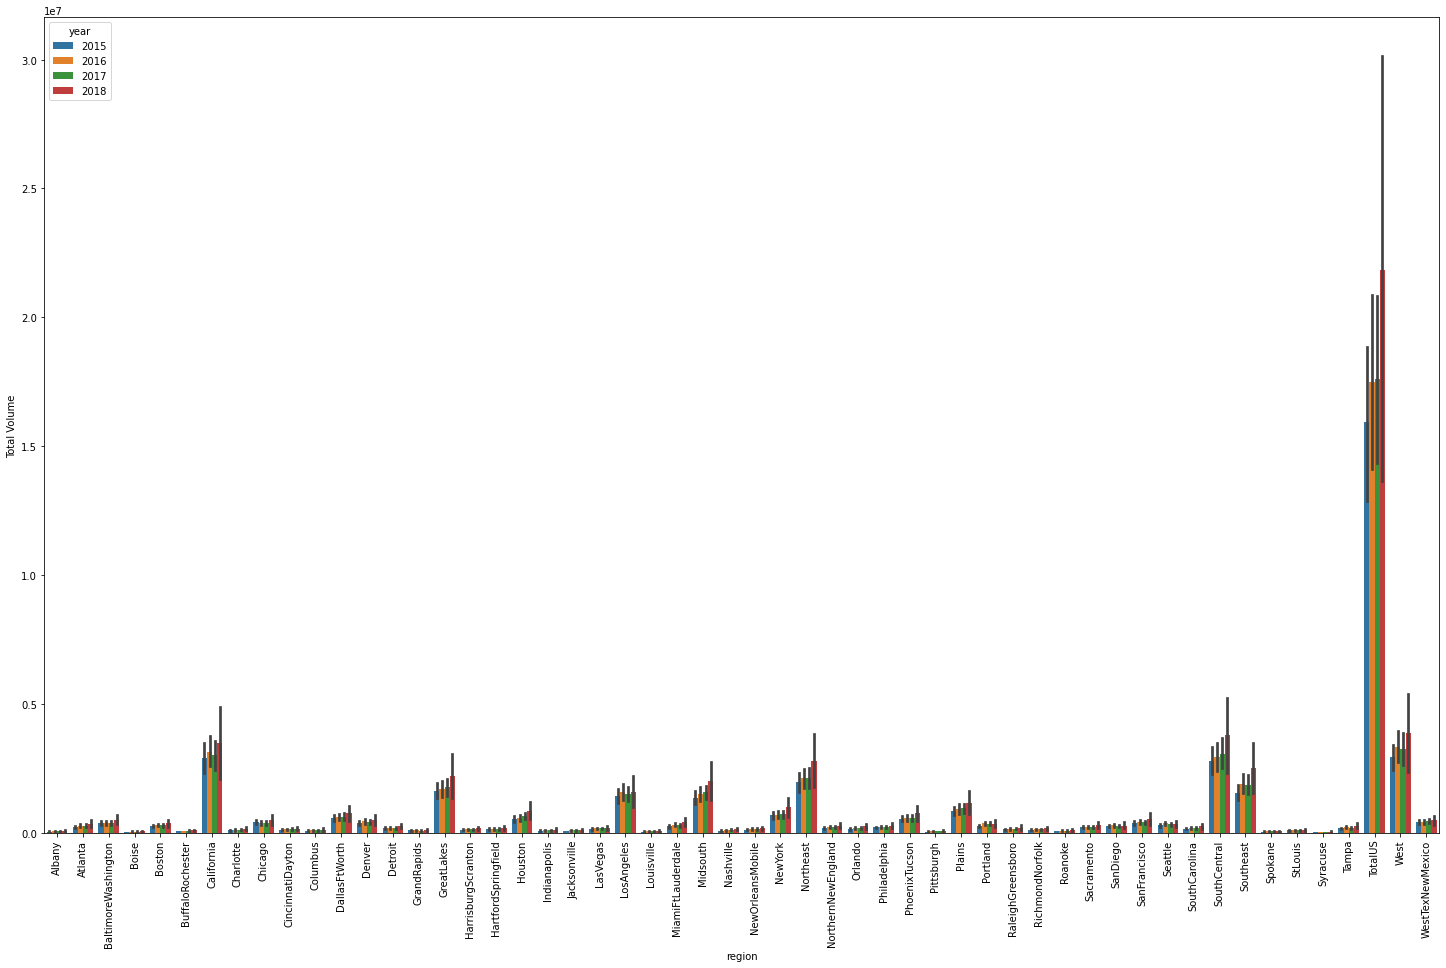

In [321]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Total Volume',hue='year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By lookig at the plot we can see the year wise average price of each region, so we can say that totalus region has the highest number of avocados sold and in year 2018 most of the avocados were sold.**

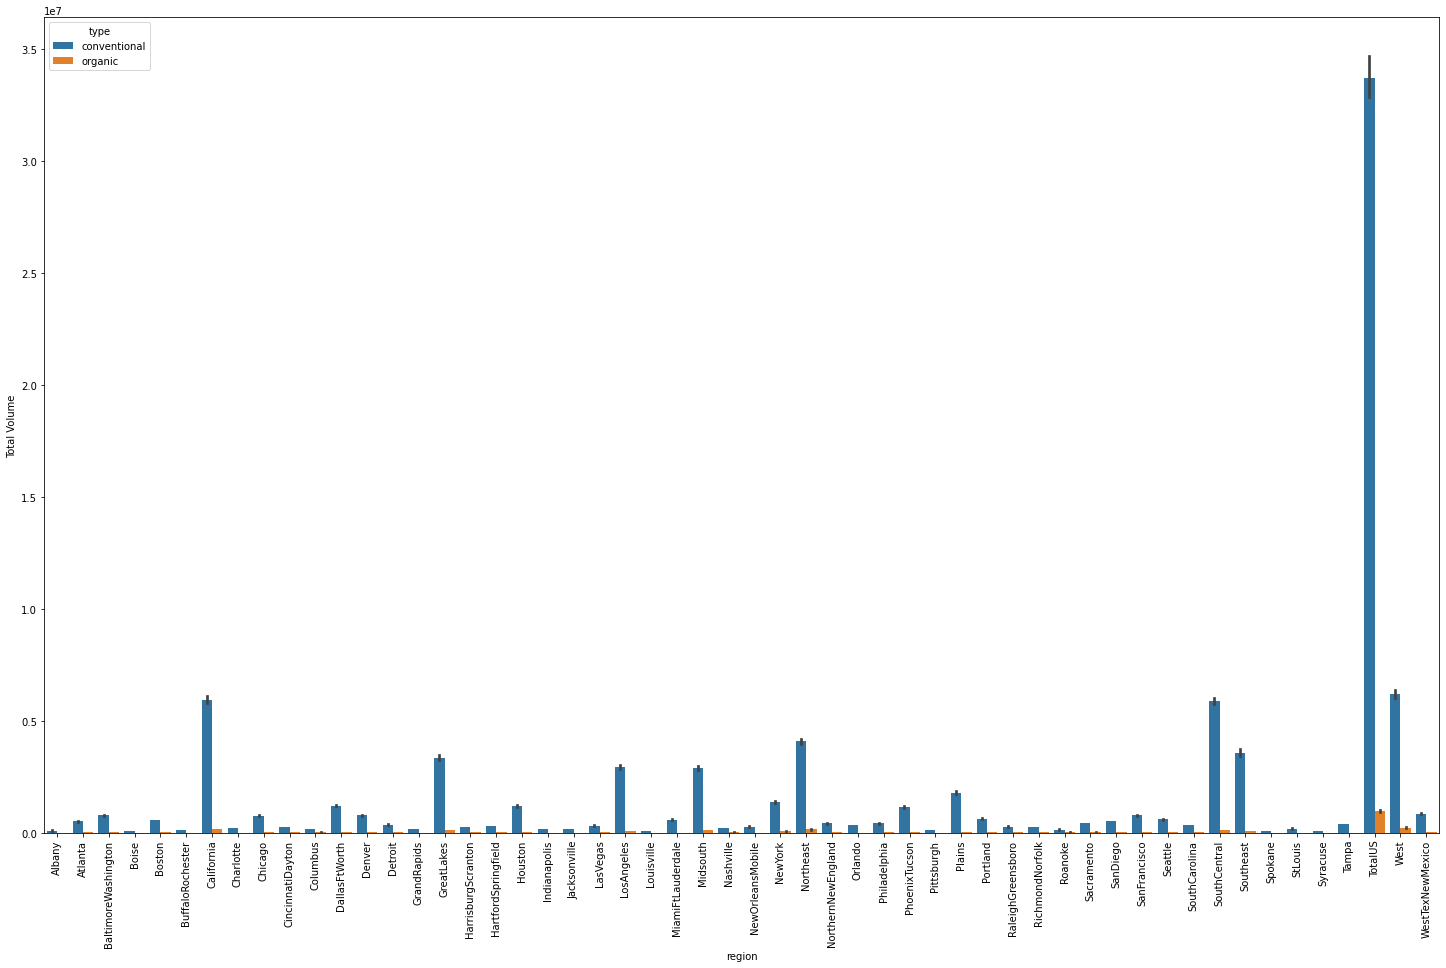

In [322]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Total Volume',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that in each and every column most number of conventional type of avocados were sold.**

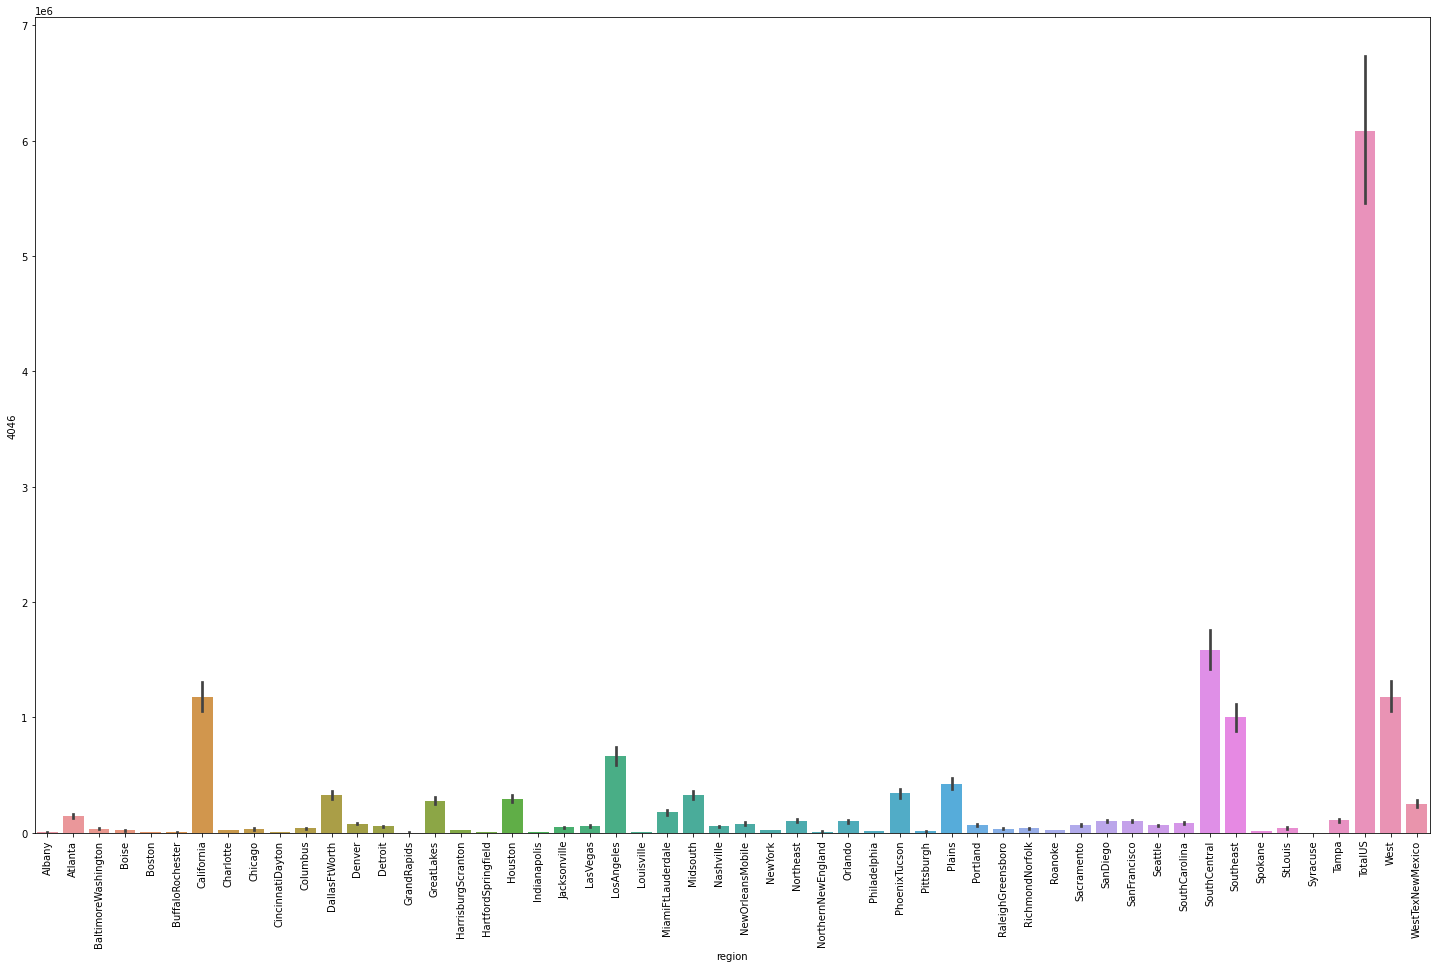

In [77]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='4046',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most number of avocados with plu code 4046 were sold in the region totalus.**

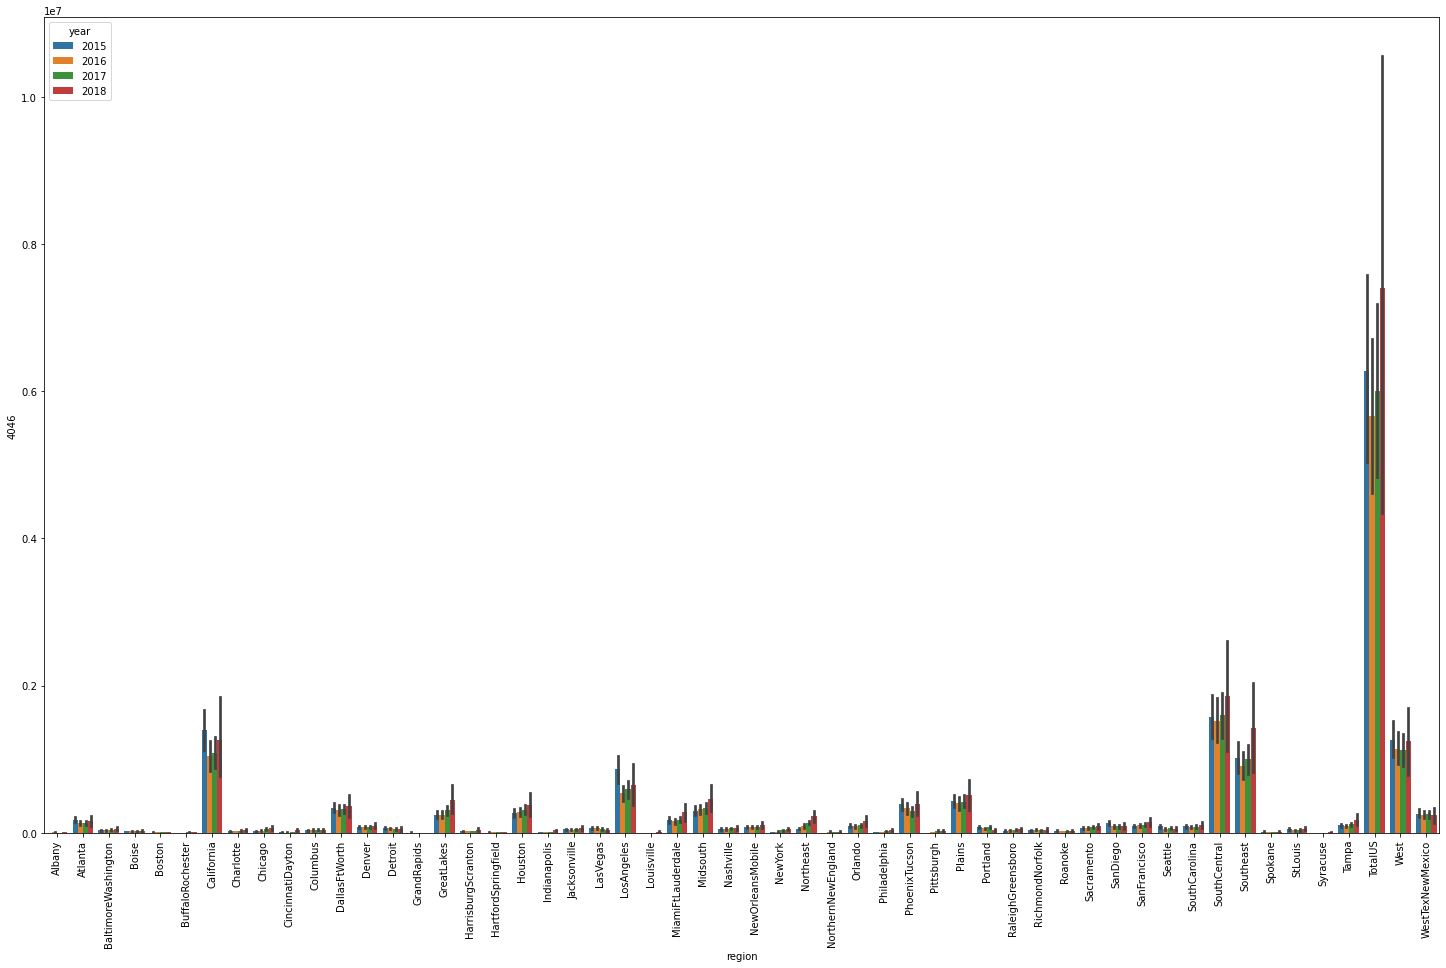

In [323]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='4046',hue='year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see the bar plot of the avocados with plu code 4046 that were sold yearwise, so we can see that in most of the regions in year 2018 highest number of avocadas were sold with plu code 4046.**

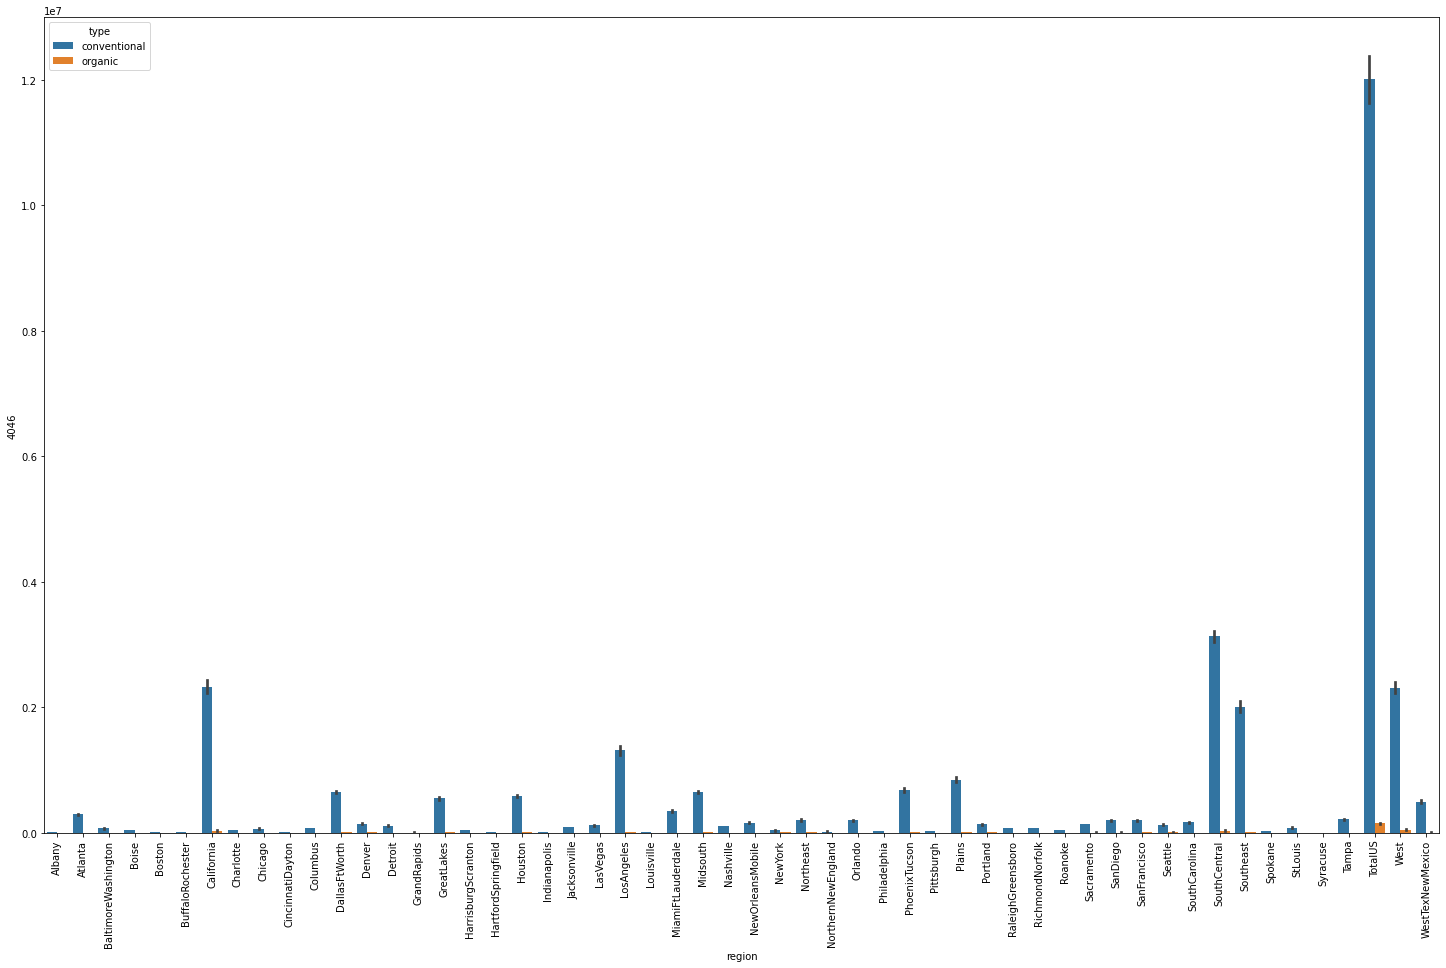

In [324]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='4046',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that in most of the regions conventional type avocados were sold with plu code 4046**

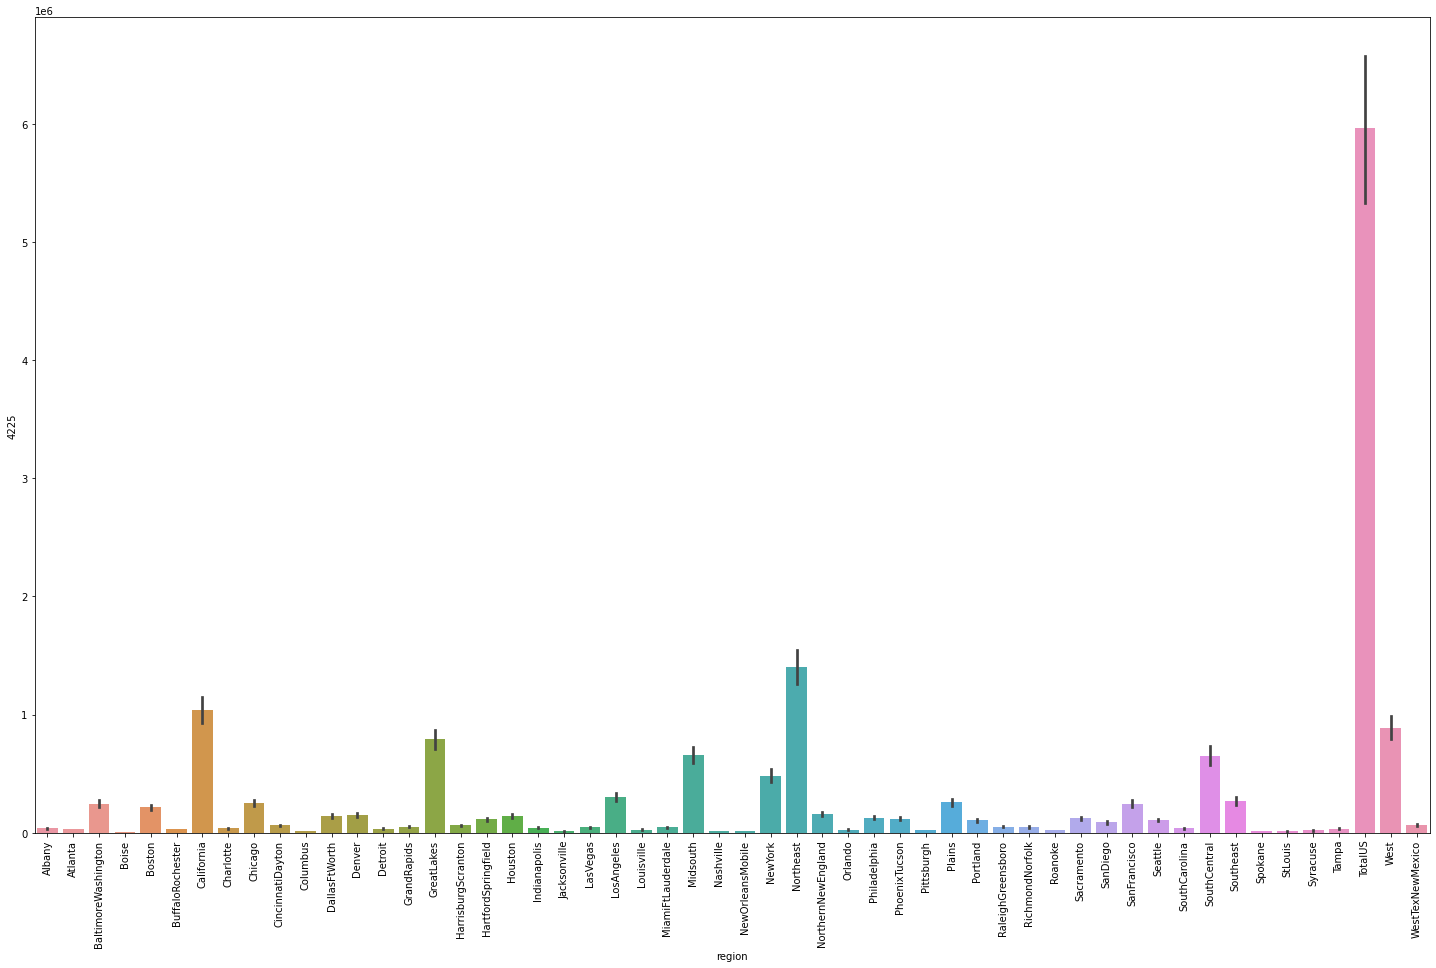

In [78]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='4225',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most number of avocados with plu code 4225 were sold in the region totalus.**

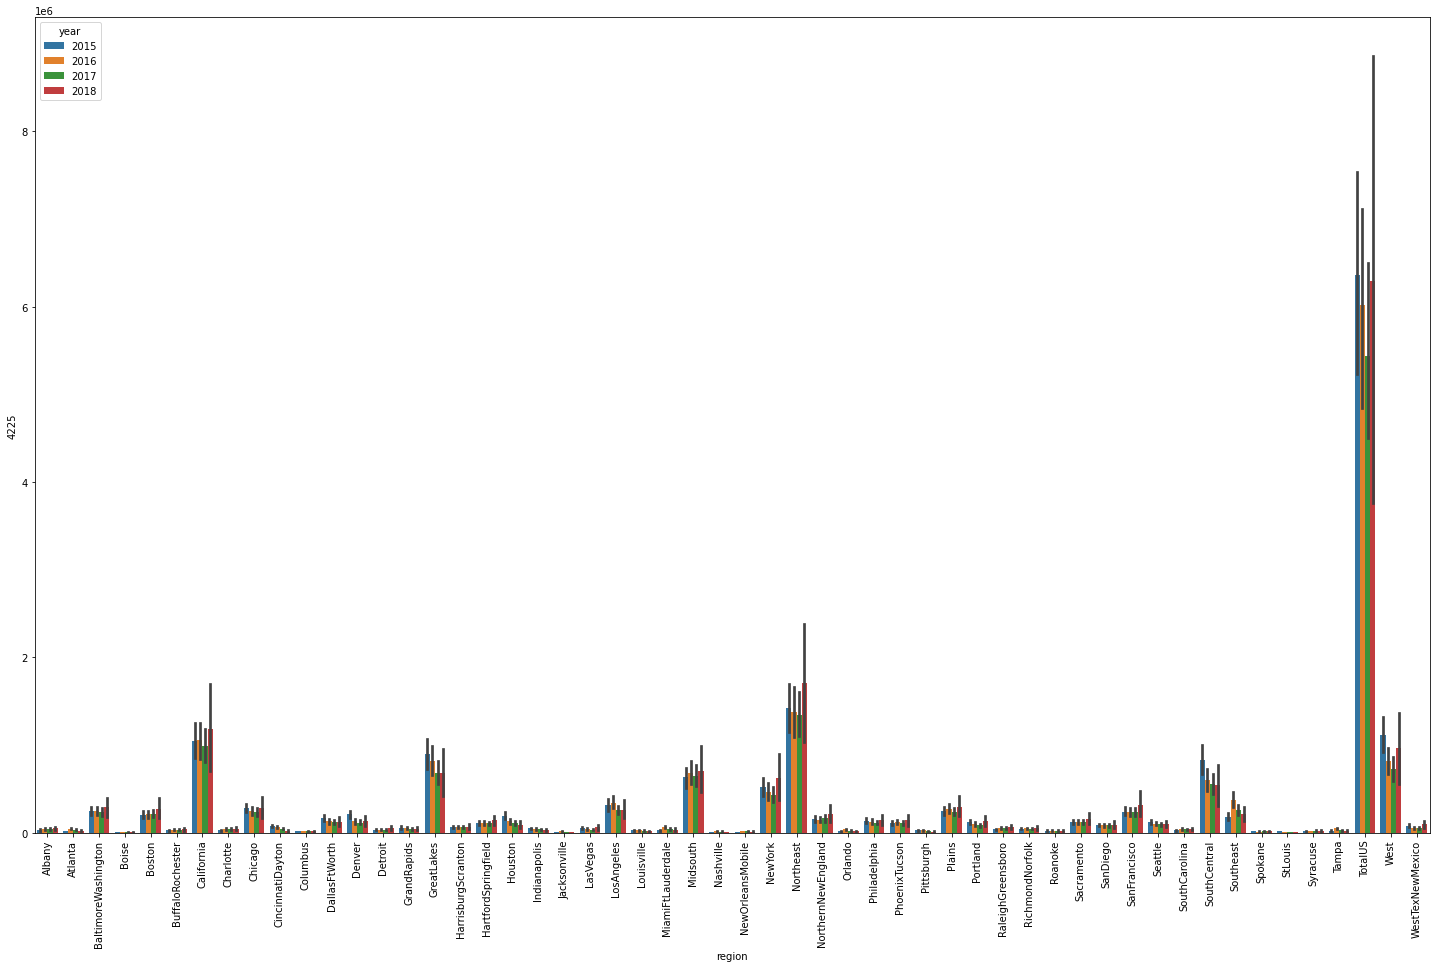

In [325]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='4225',hue='year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see the bar plot of the avocados with plu code 4225 that were sold yearwise, so we can see that in most of the regions in year 2018 highest number of avocadas were sold with plu code 4225.**

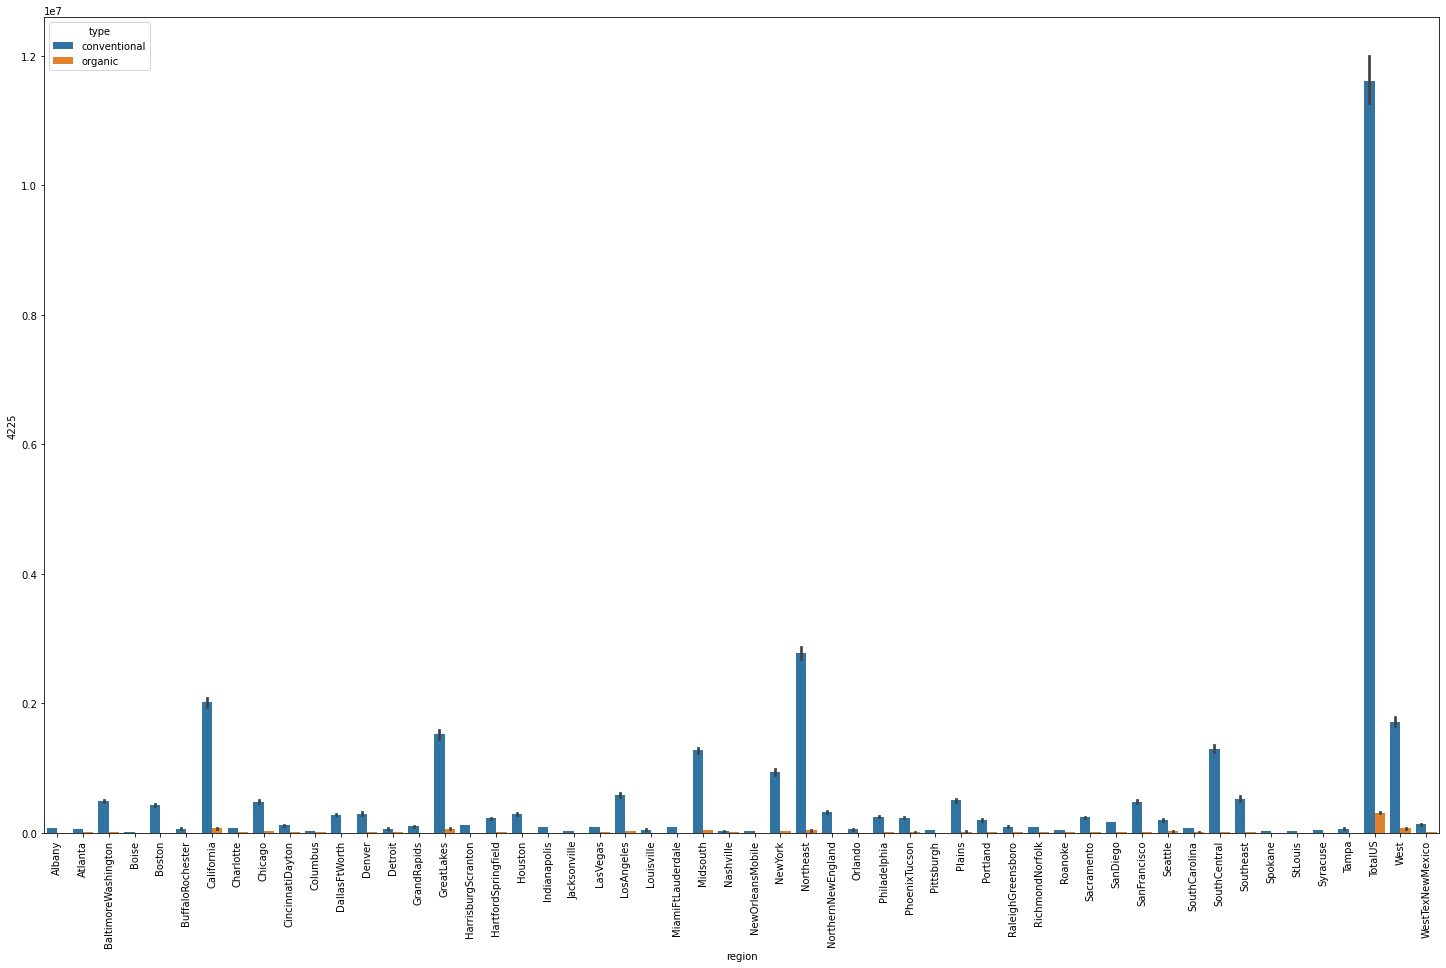

In [326]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='4225',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that in most of the regions conventional type avocados were sold with plu code 4225**

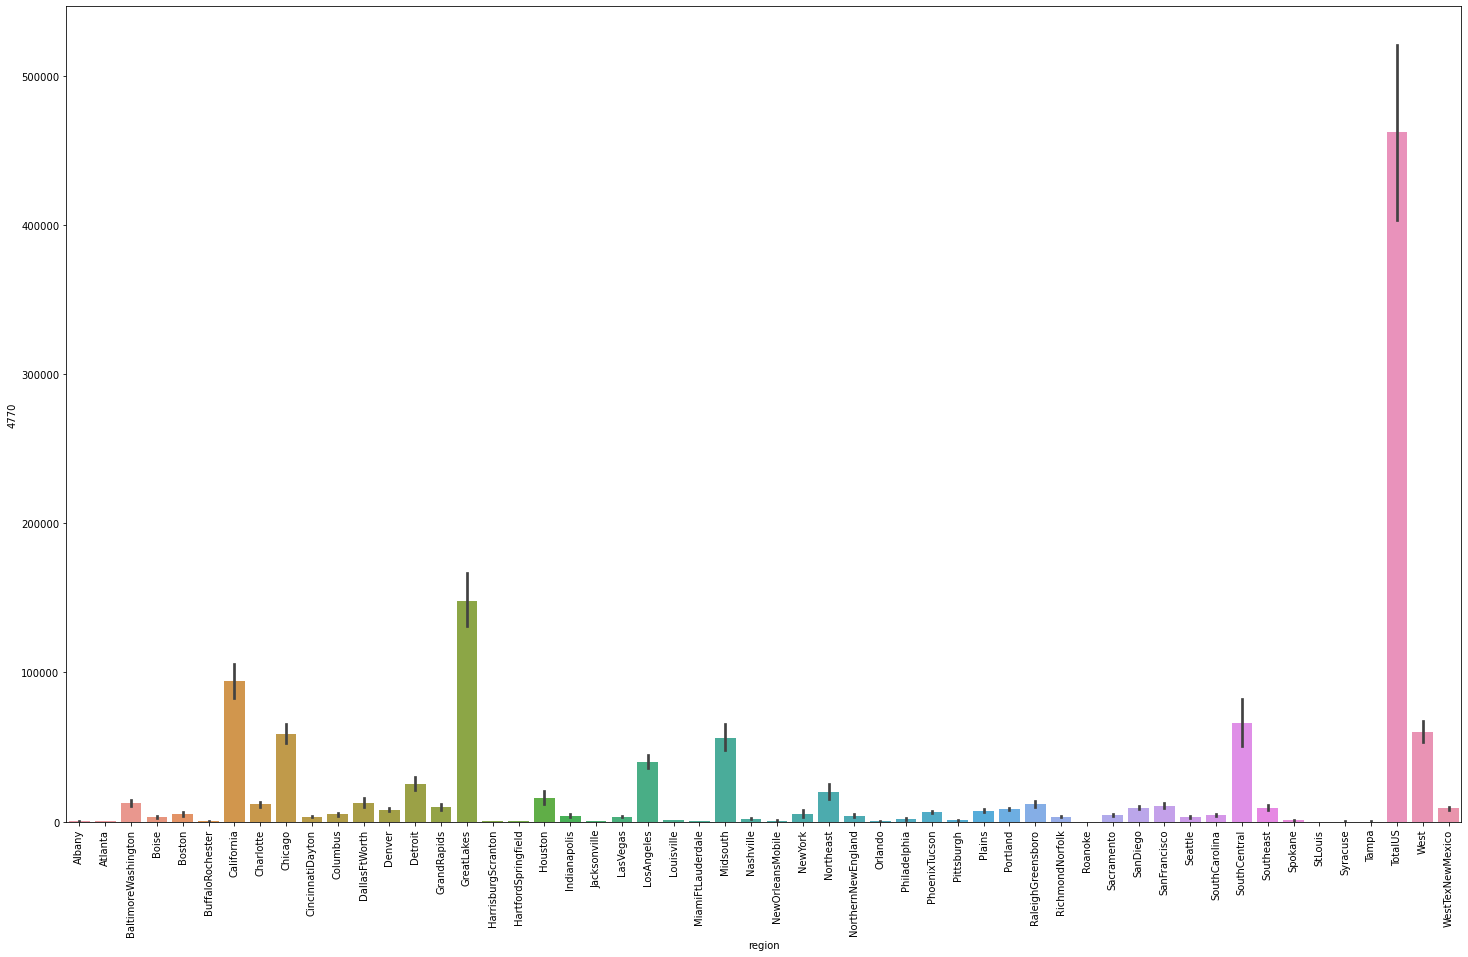

In [79]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='4770',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most number of avocados with plu code 4770 were sold in the region totalus.**

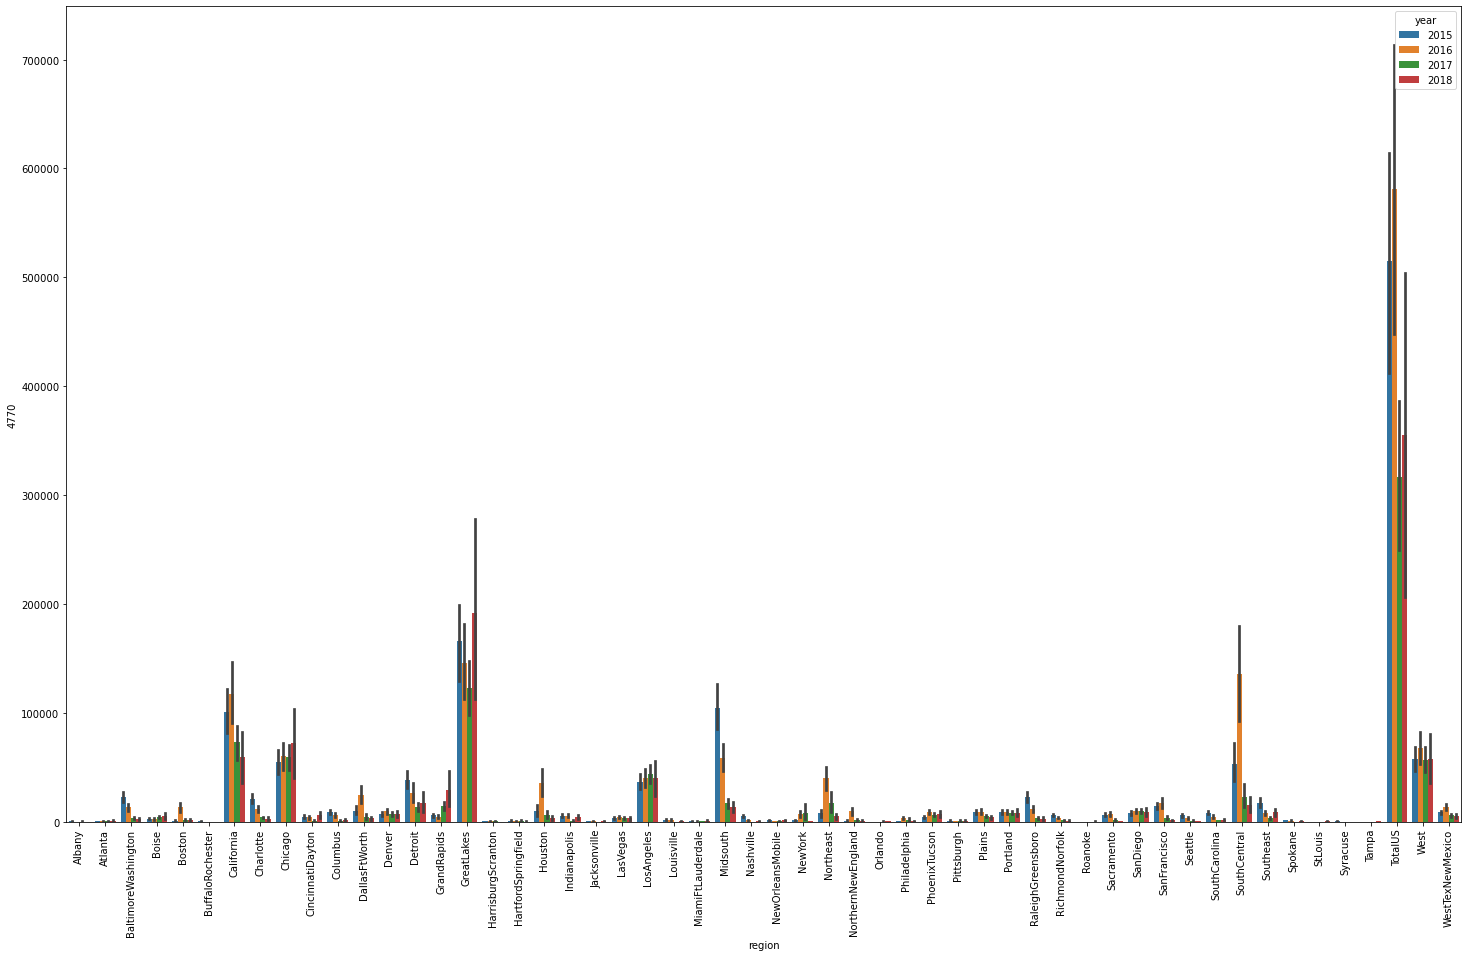

In [327]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='4770',hue='year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see the bar plot of the avocados with plu code 4770 that were sold yearwise, so we can see that in most of the regions in year 2018 highest number of avocadas were sold with plu code 4770.**

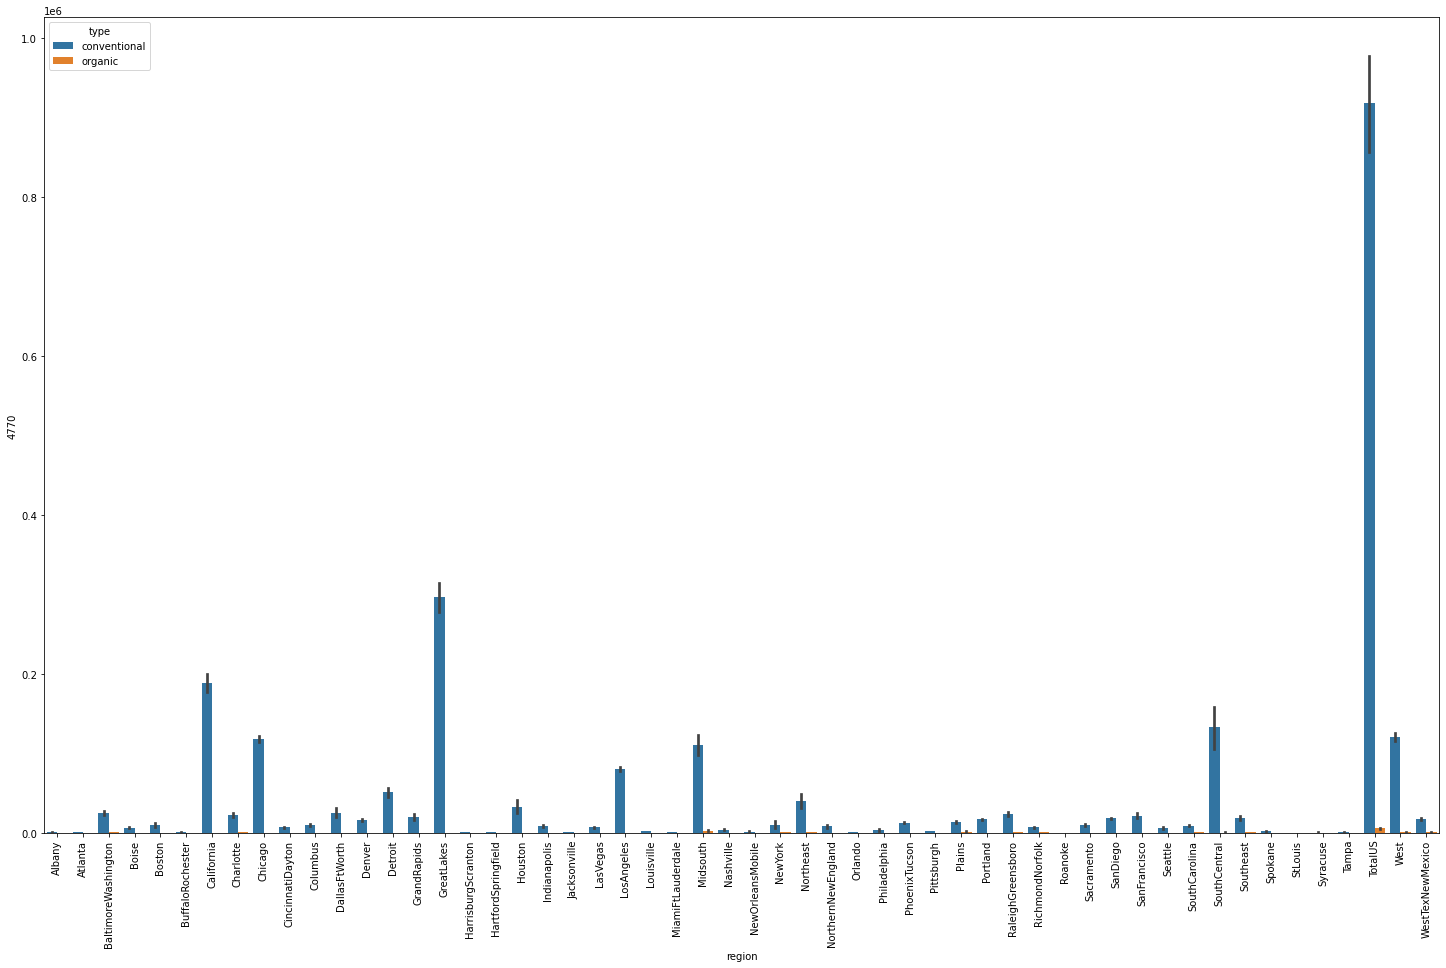

In [637]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='4770',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that in most of the regions conventional type avocados were sold with plu code 4770**

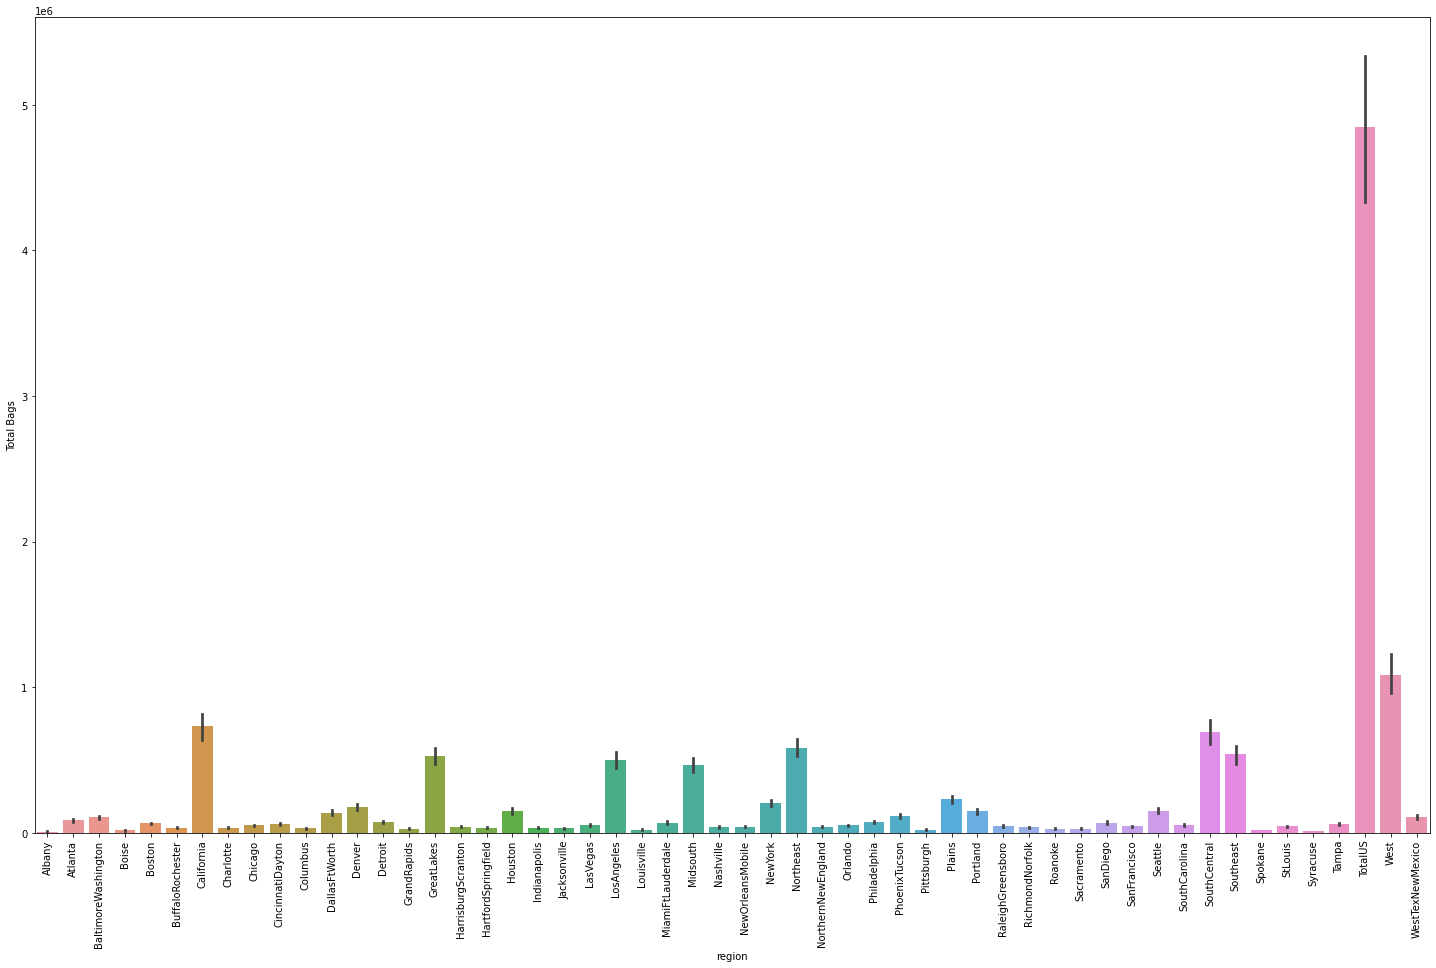

In [80]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Total Bags',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Most of the bags were sold in region totalus.**

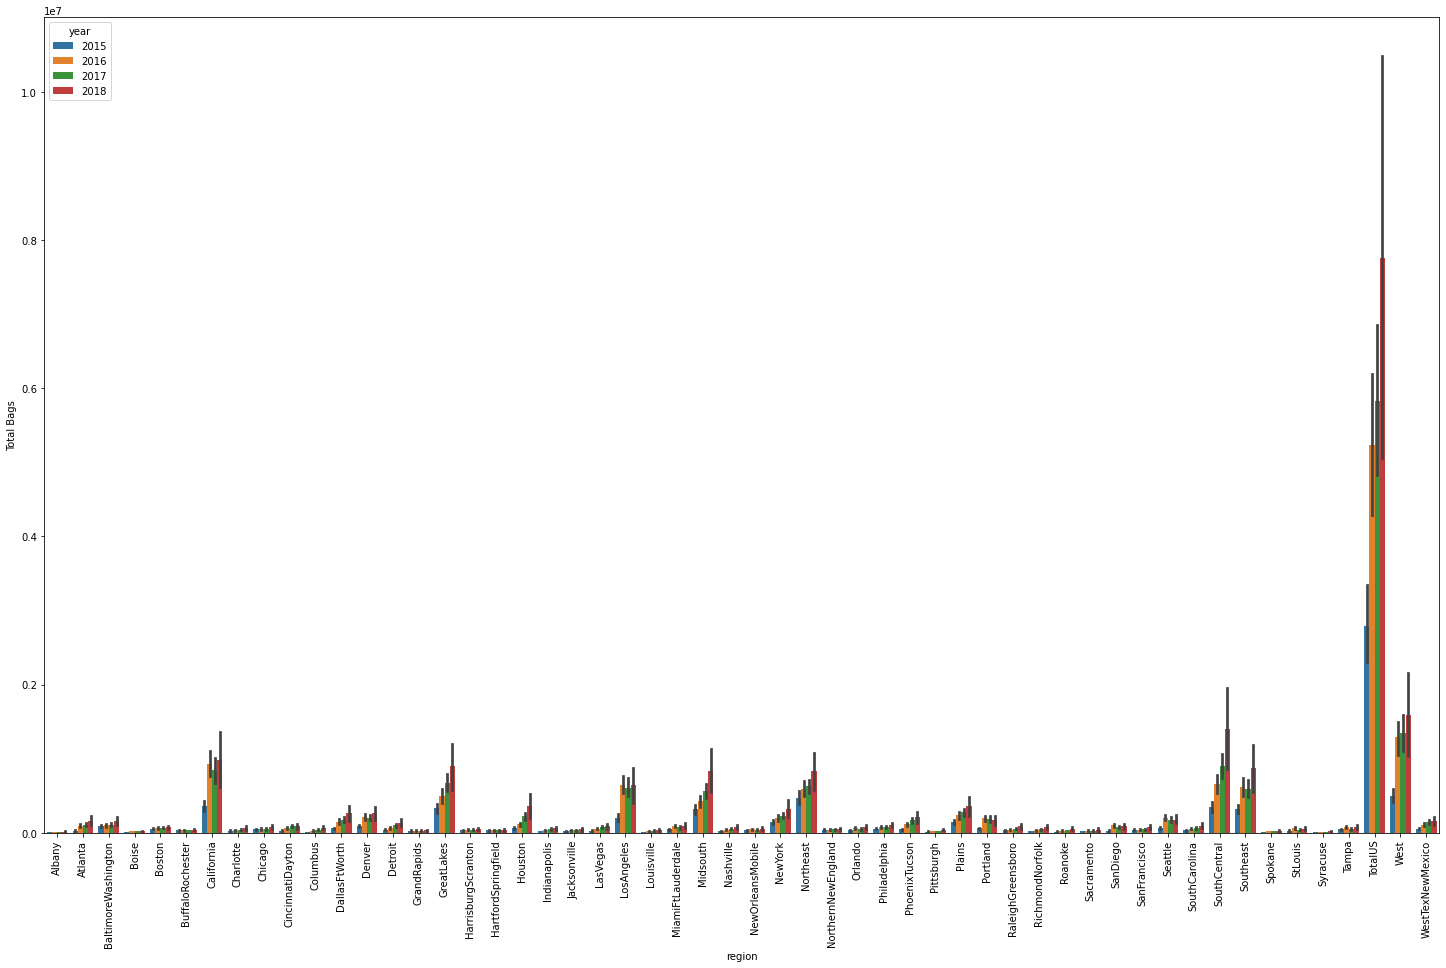

In [329]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Total Bags',hue='year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that we can see yearwise selling of bags and most of them were in totalus region and most of the bags were sold in year 2018 in most of the regions.**

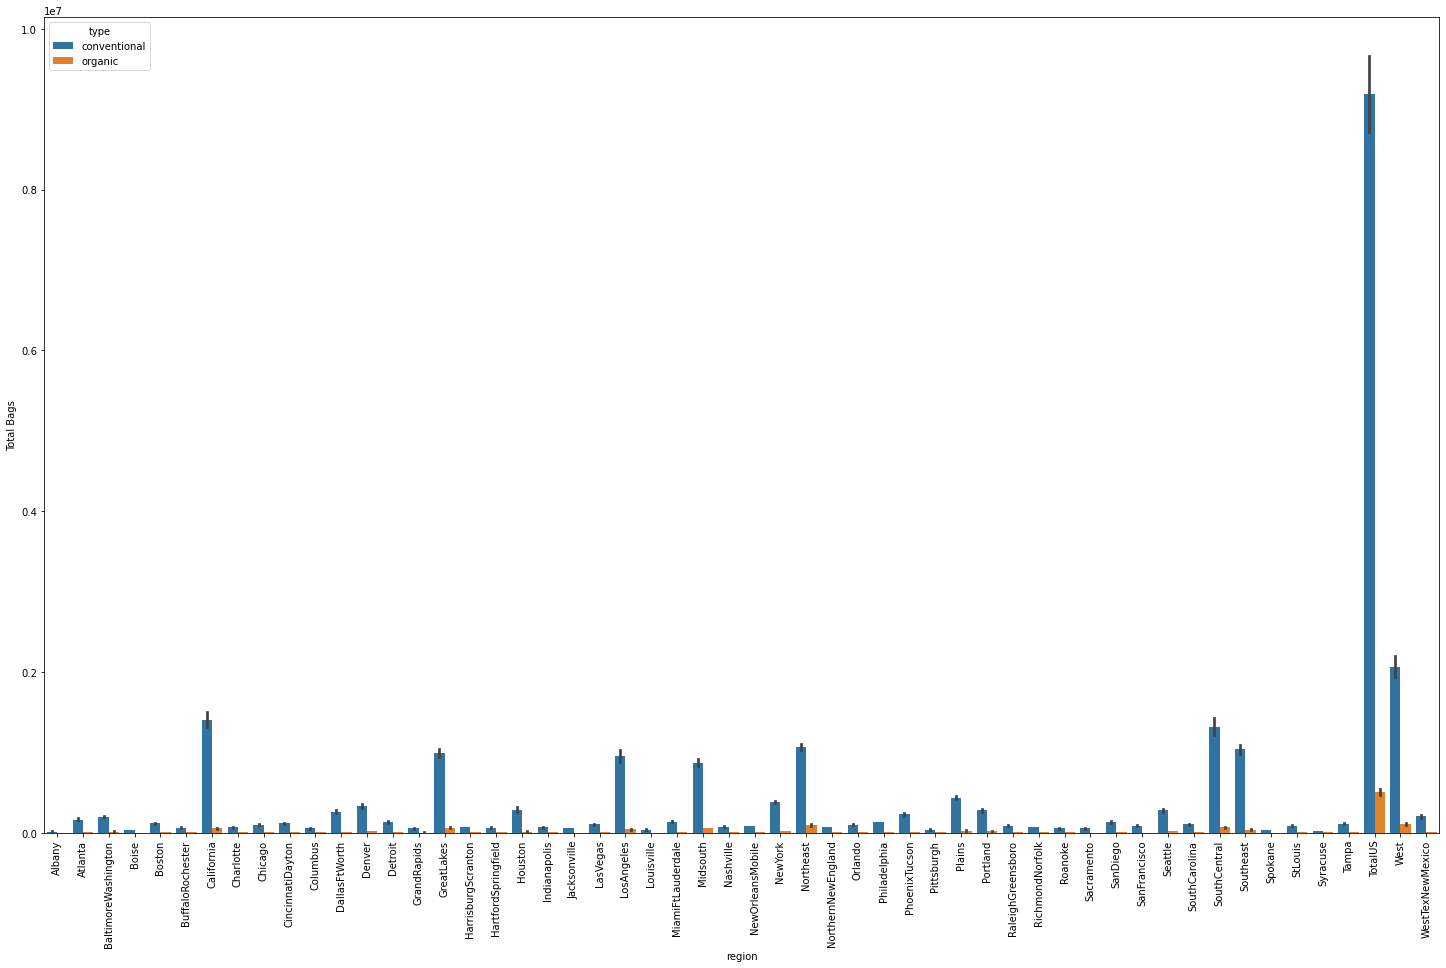

In [330]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Total Bags',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see the total number of bags that were sold region wise, so in region totalus highest number of bags were sold.**

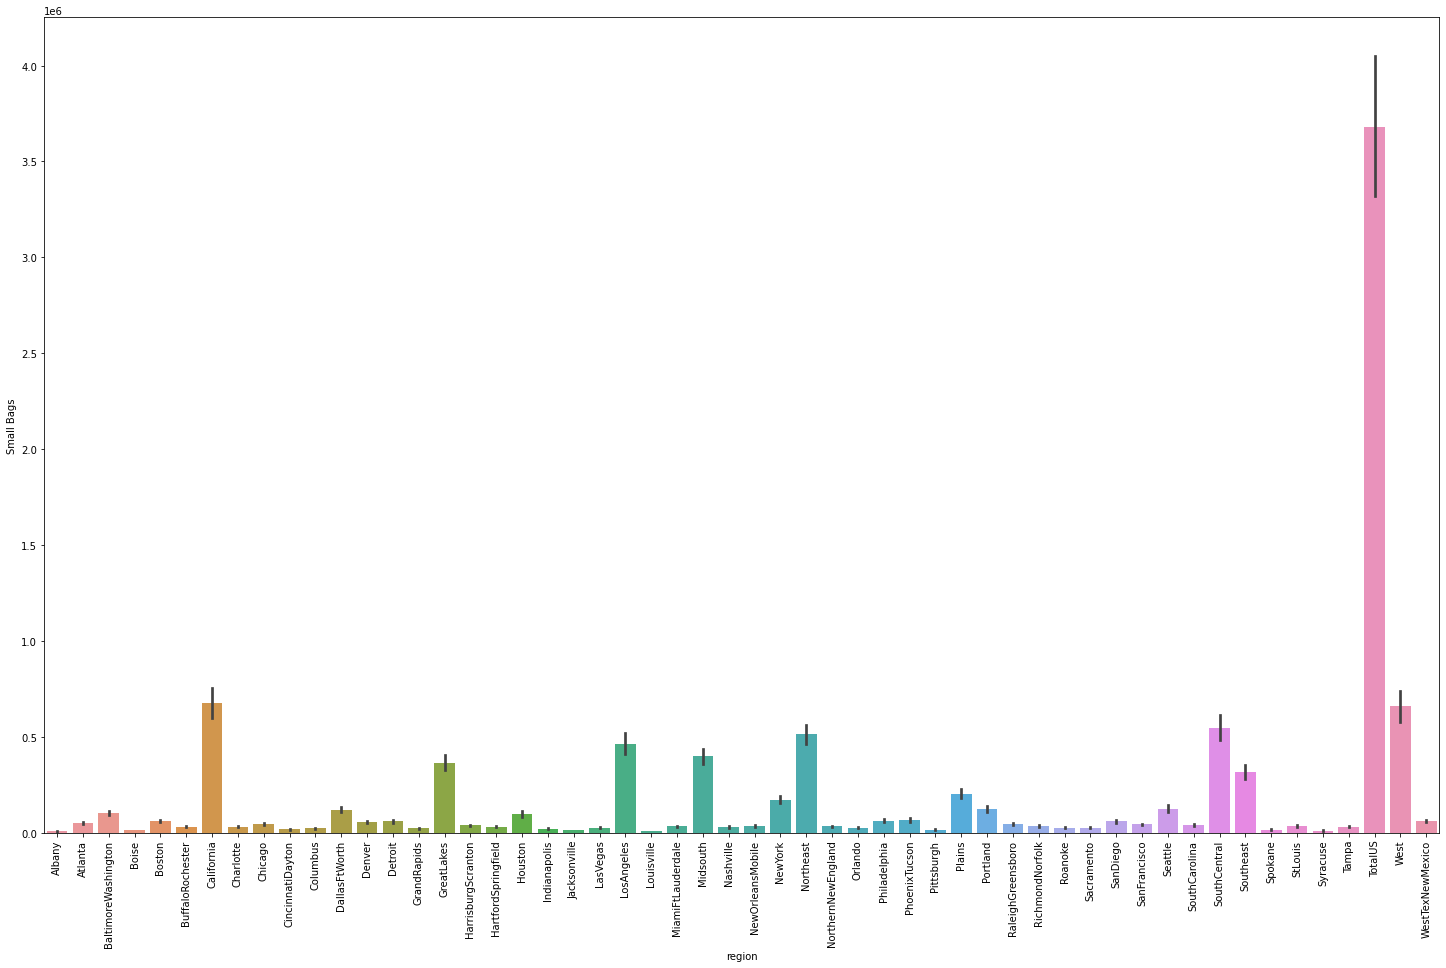

In [81]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Small Bags',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Most of the small bags were sold in region totalus.**

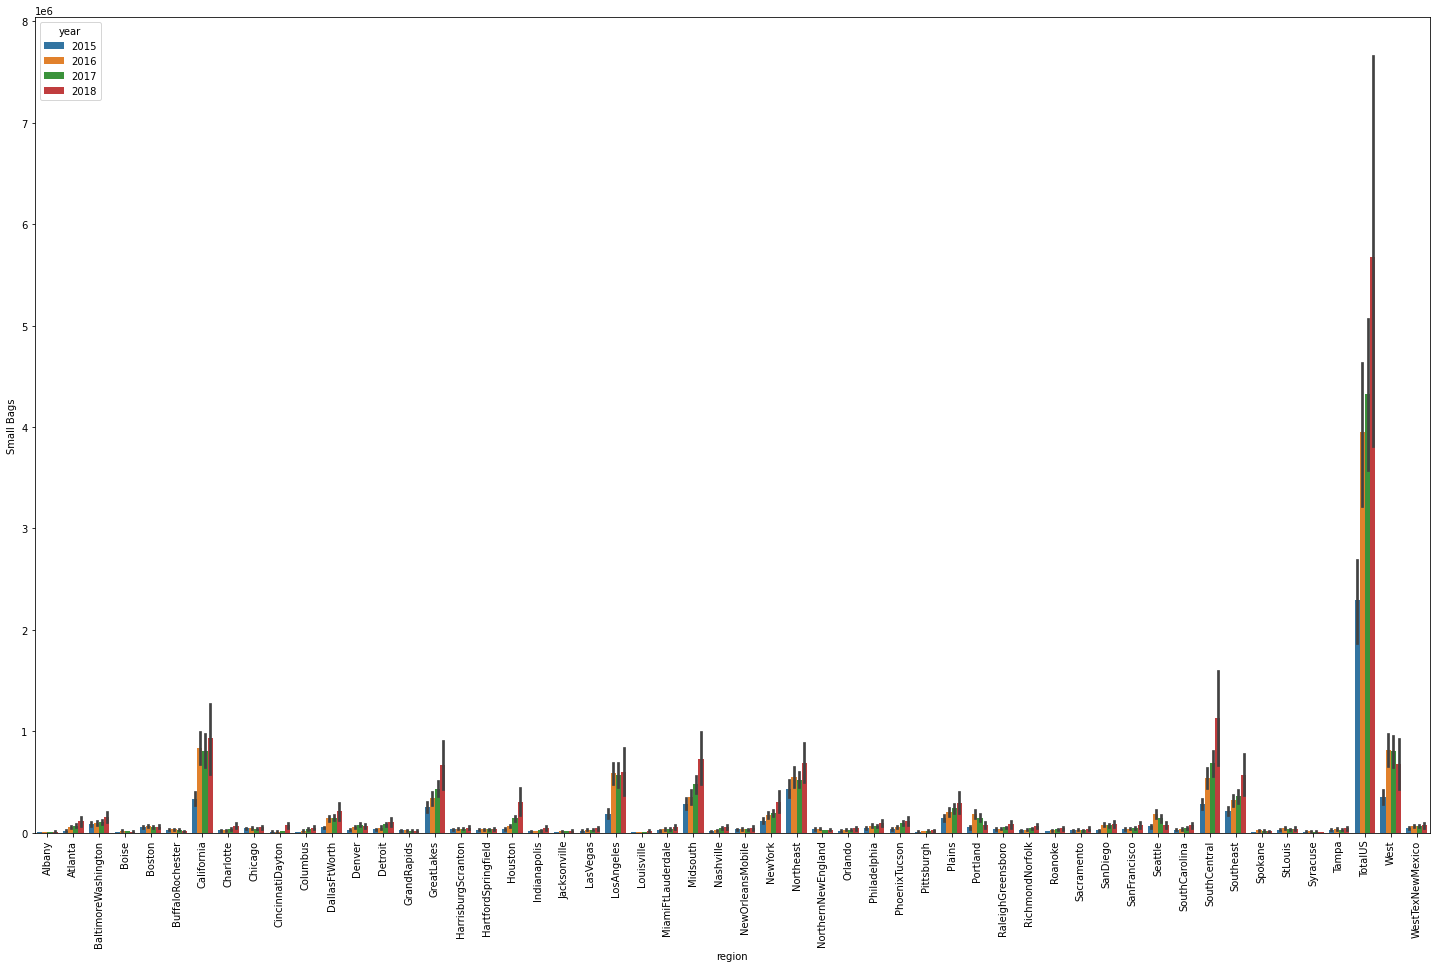

In [331]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Small Bags',hue='year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that we can see yearwise selling of small bags and most of them were in totalus region and most of the small bags were sold in year 2018 in most of the regions.**

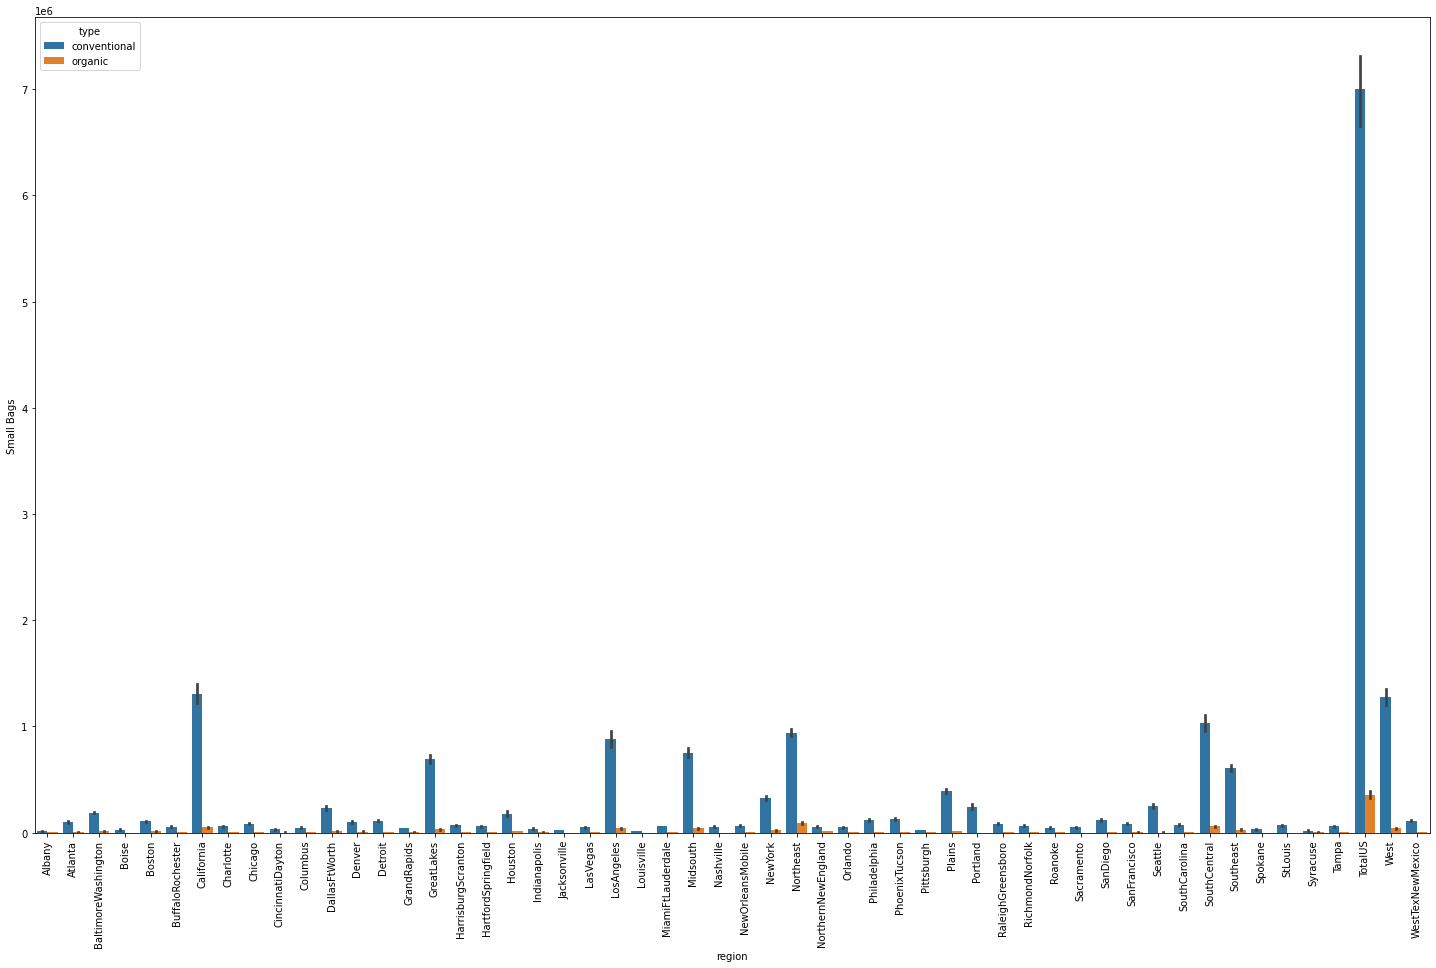

In [332]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Small Bags',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Most of the small bags which were sold in most of the regions are of conventional type.**

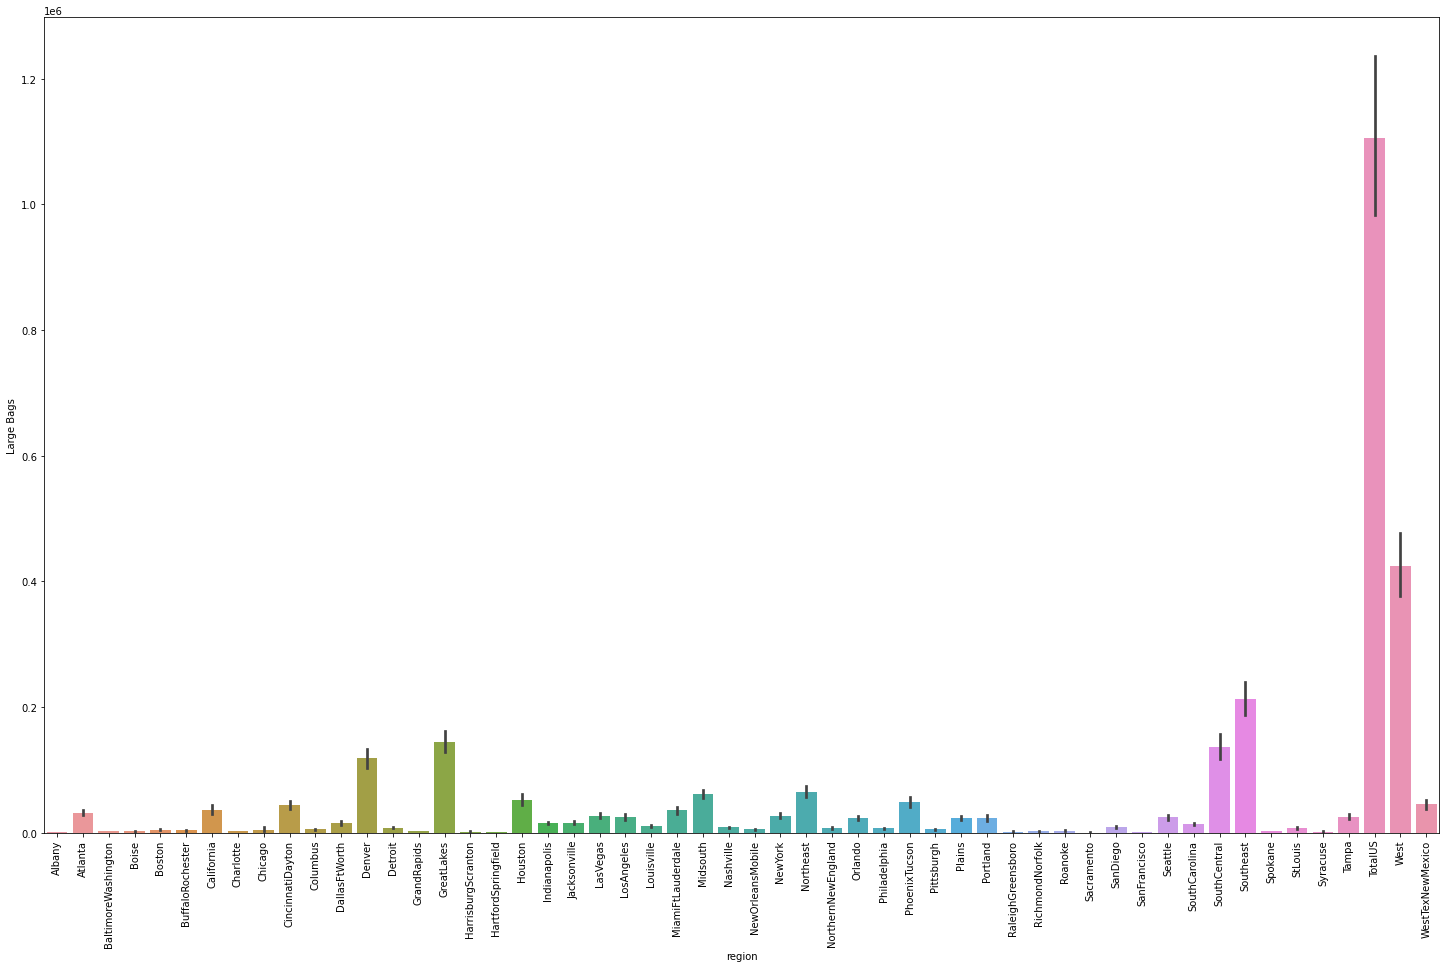

In [82]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Large Bags',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Most of the large bags were sold in region totalus.**

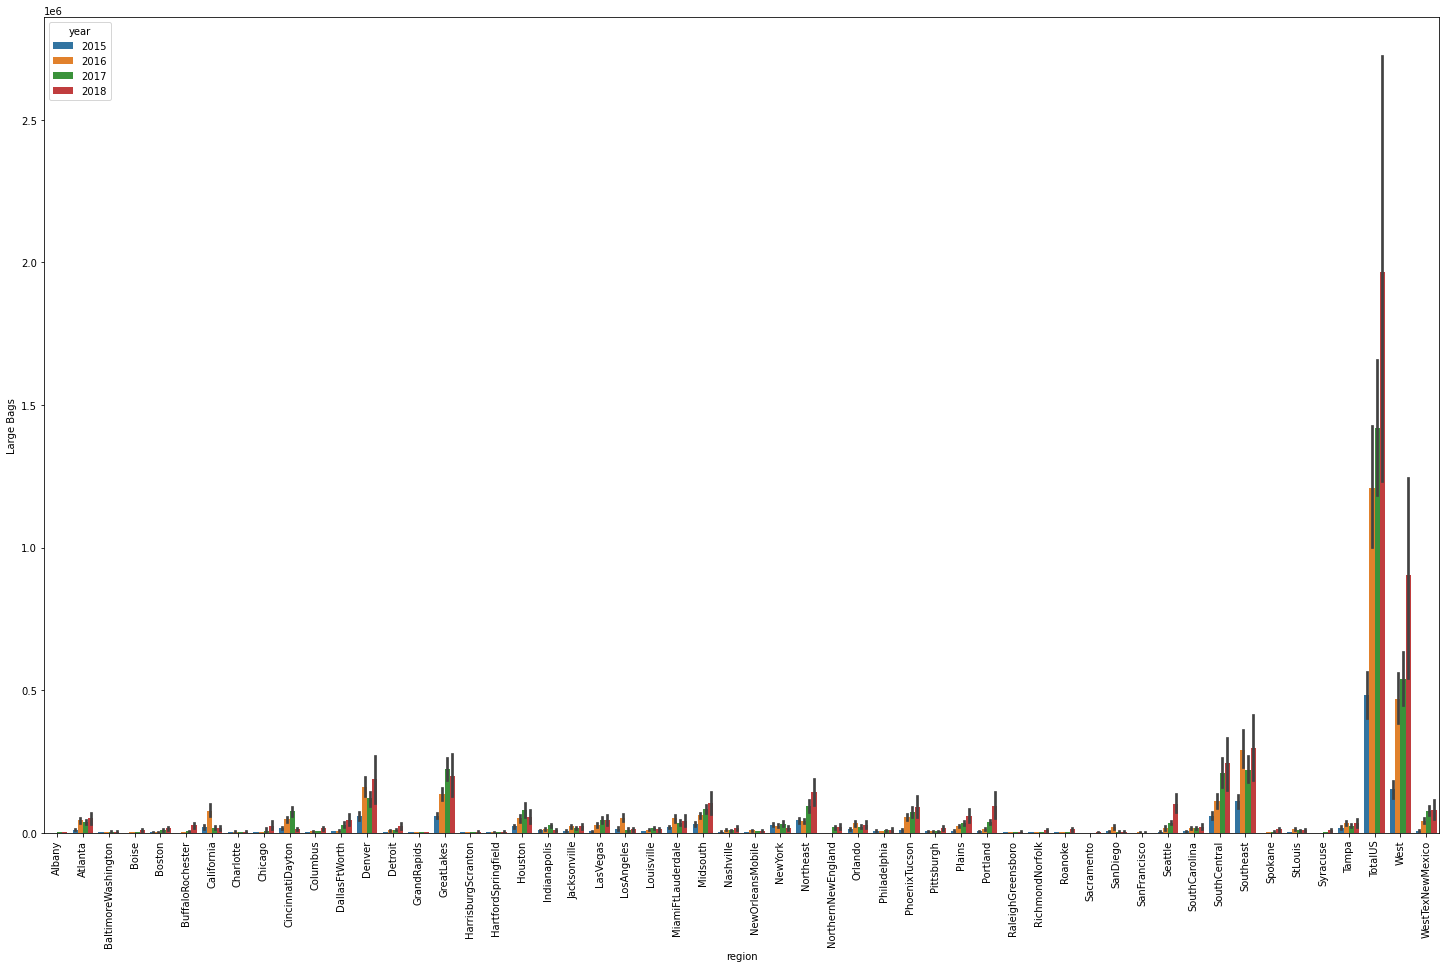

In [333]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Large Bags',hue='year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that we can see yearwise selling of large bags and most of them were in totalus region and most of the large bags were sold in year 2018 in most of the regions.**

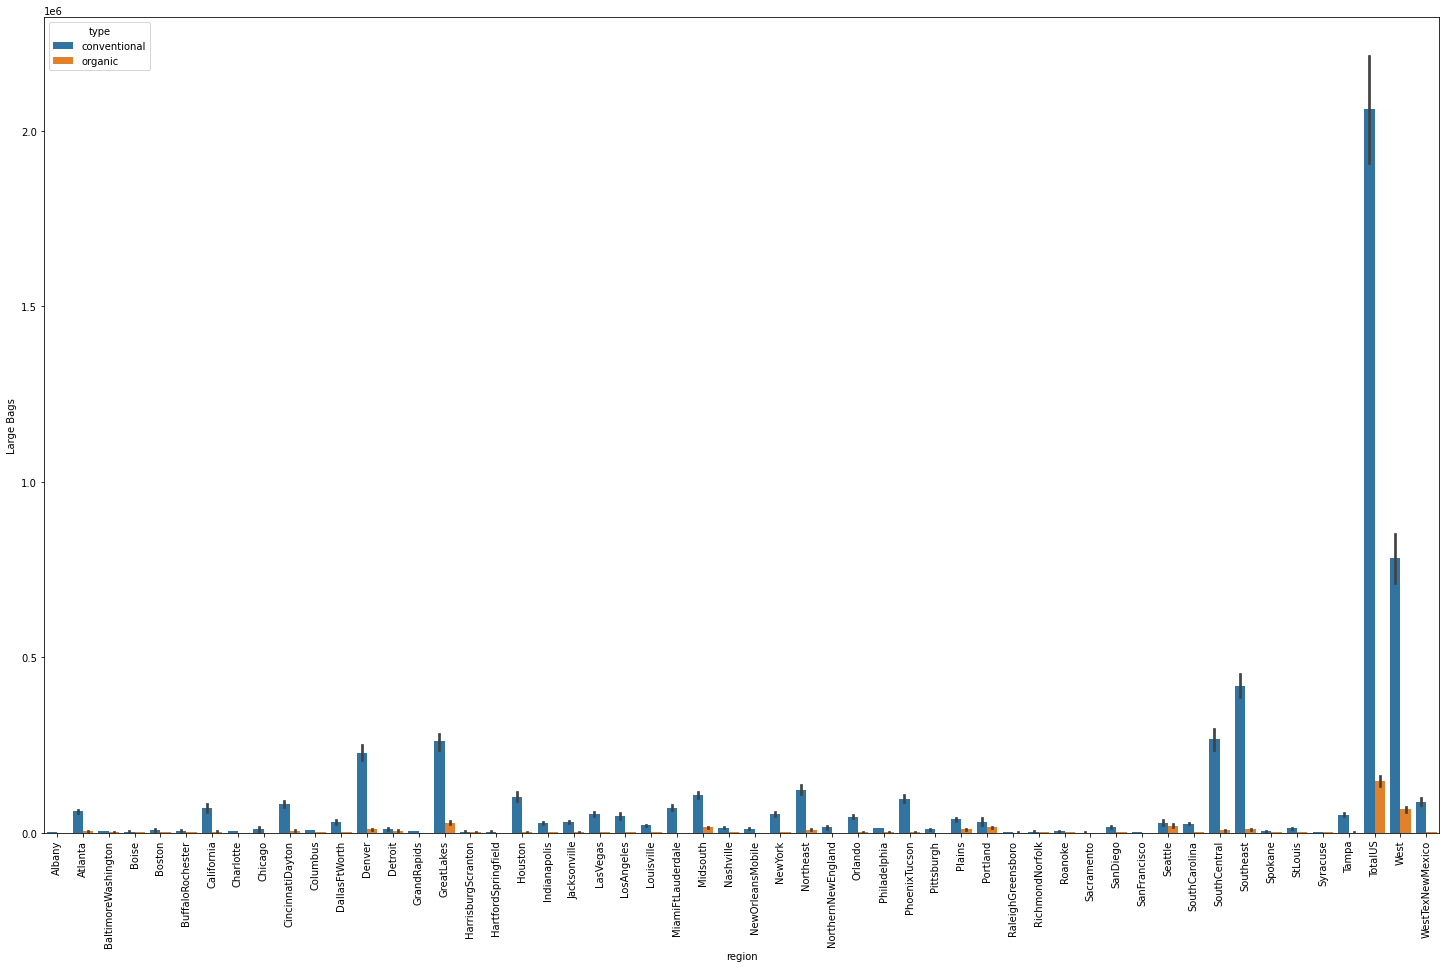

In [334]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='Large Bags',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Most of the large bags which were sold in most of the regions are of conventional type.**

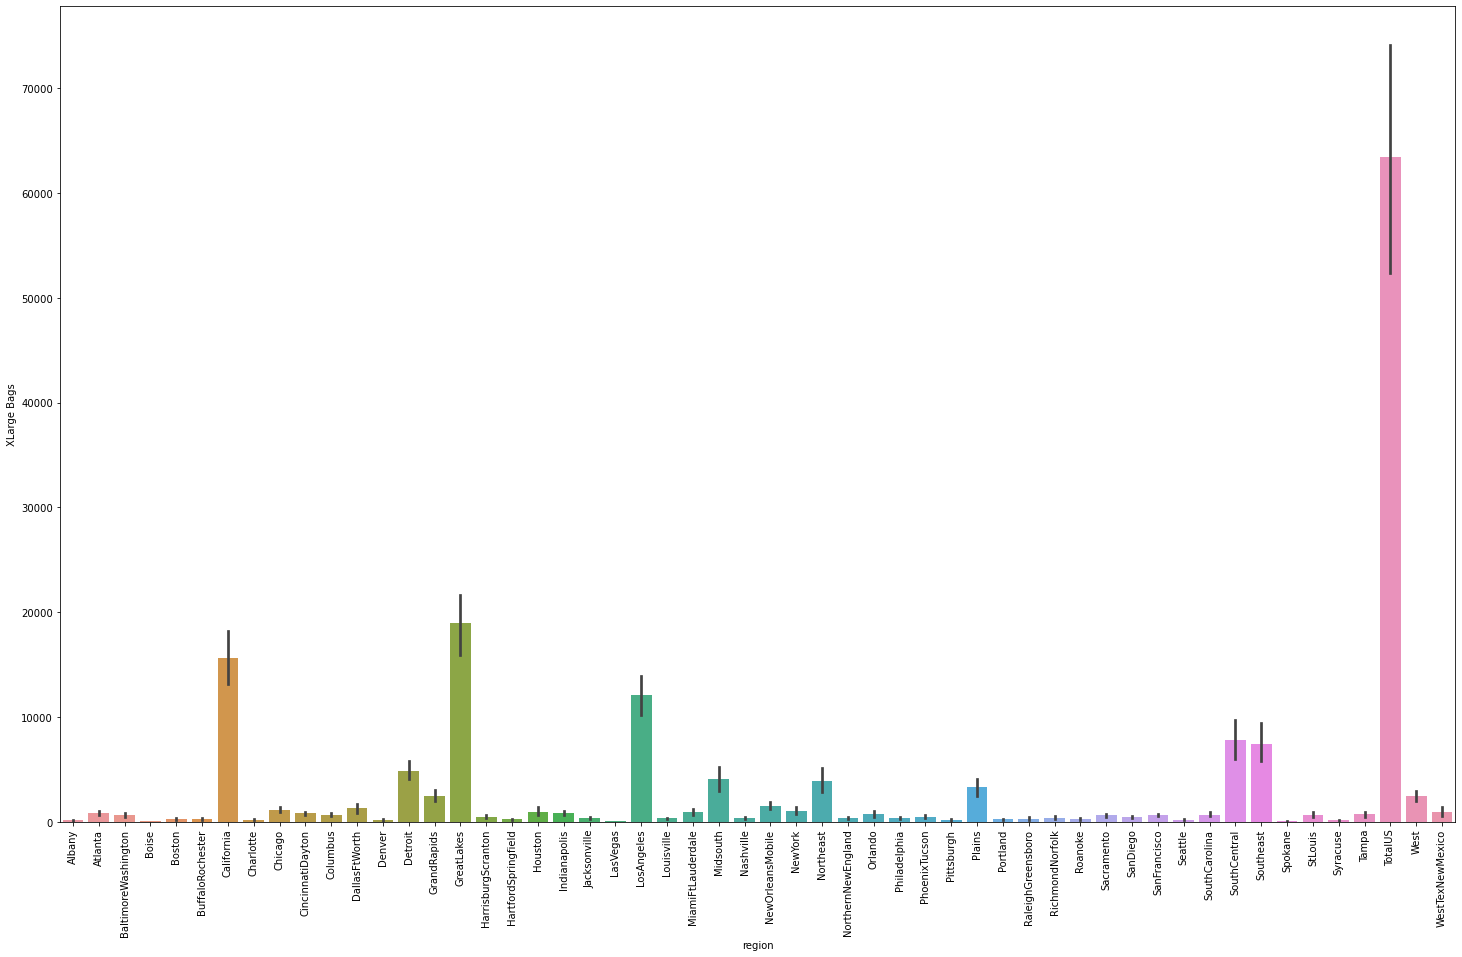

In [83]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='XLarge Bags',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Most of the xlarge bags were sold in region totalus.**

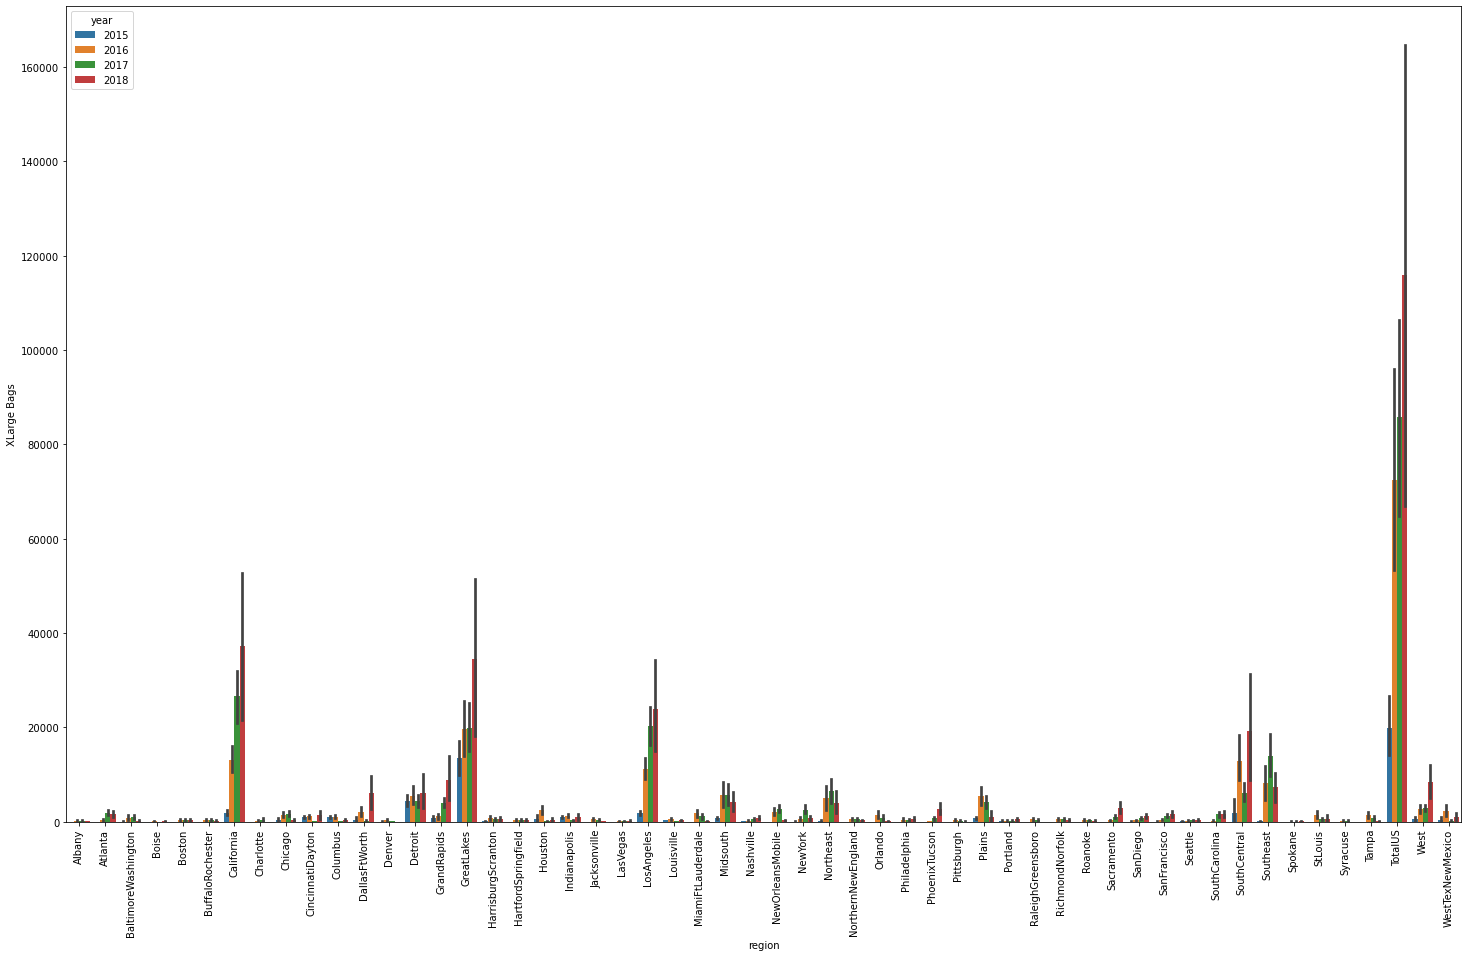

In [335]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='XLarge Bags',hue='year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that we can see yearwise selling of xlarge bags and most of them were in totalus region and most of the xlarge bags were sold in year 2018 in most of the regions.**

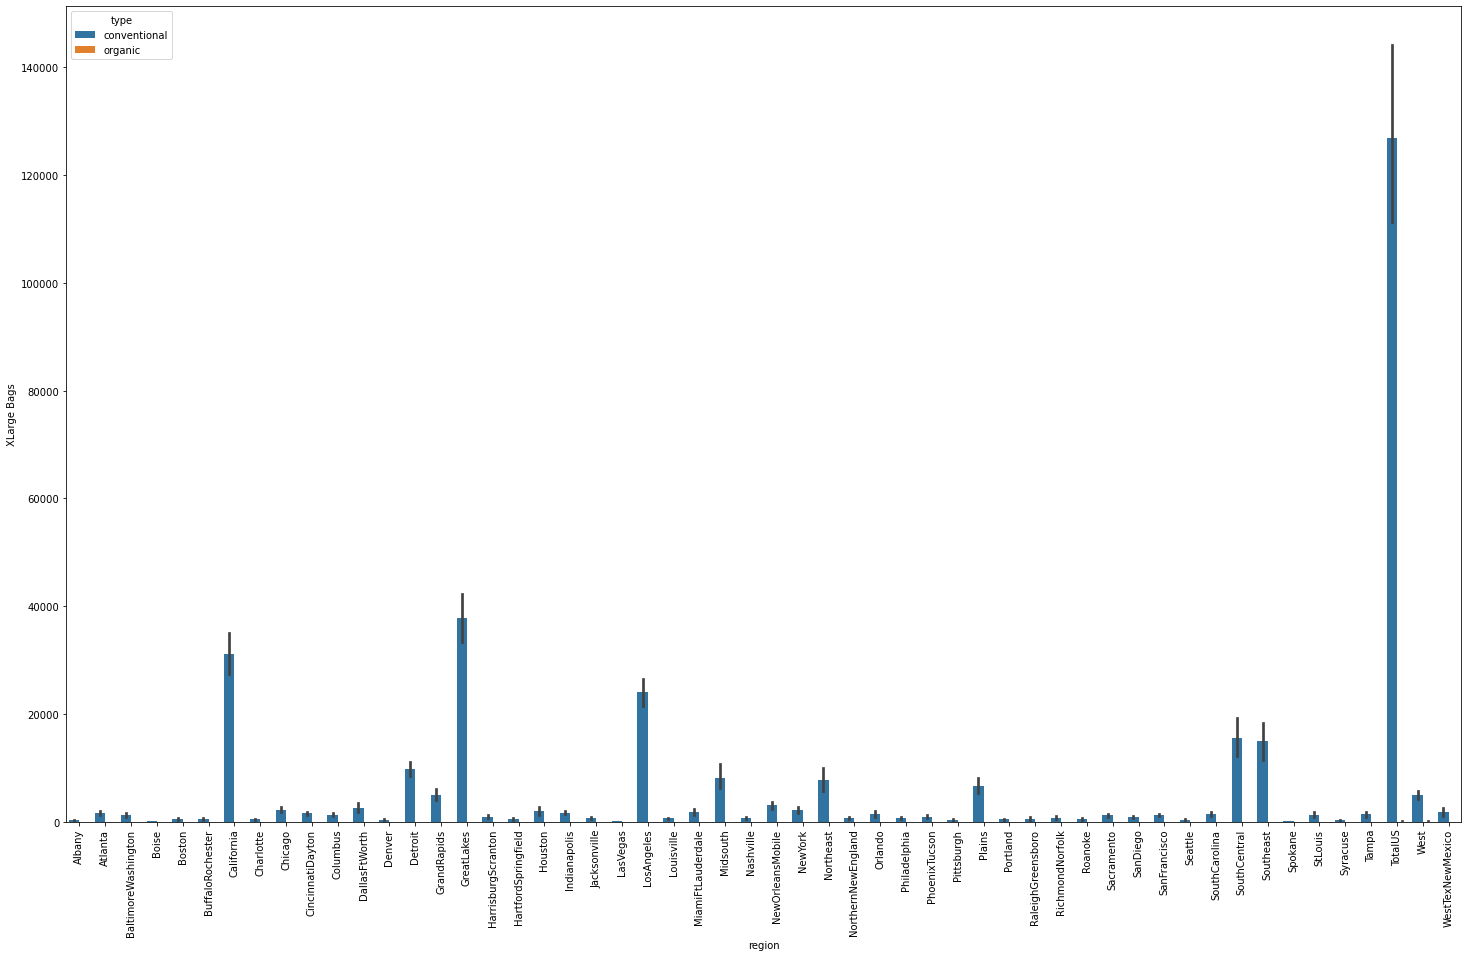

In [336]:
#Plotting bar plot
plt.figure(figsize=(25,15))
sns.barplot(x='region',y='XLarge Bags',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**Most of the xlarge bags which were sold in most of the regions are of conventional type.**

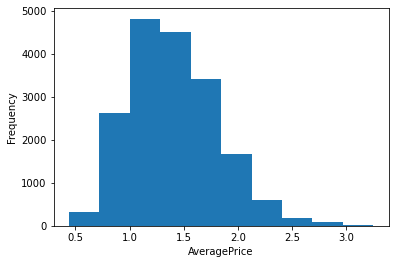

In [84]:
#plotting histogram
data['AveragePrice'].plot(kind='hist')
plt.xlabel('AveragePrice')
plt.show()

**In this plot we can see that most of the average price was between 1.0 to 1.5.**

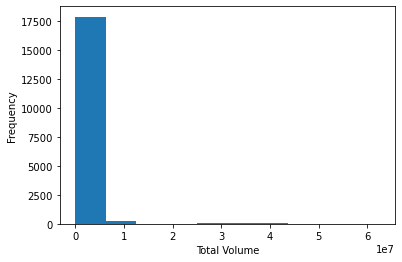

In [85]:
#plotting histogram
data['Total Volume'].plot(kind='hist')
plt.xlabel('Total Volume')
plt.show()

**In this plot we can see the total of avocados sold.**

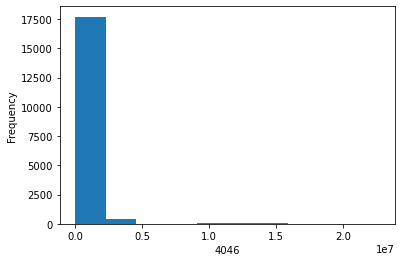

In [86]:
#plotting histogram
data['4046'].plot(kind='hist')
plt.xlabel('4046')
plt.show()

**In this plot we can see the avocados that were sold with plu code 4046.**

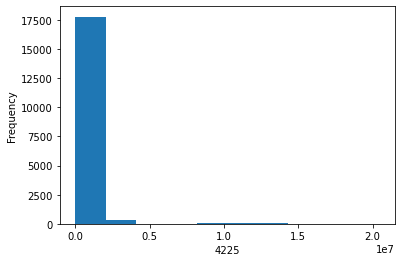

In [87]:
#plotting histogram
data['4225'].plot(kind='hist')
plt.xlabel('4225')
plt.show()

**In this plot we can see the avocados that were sold with plu code 4225.**

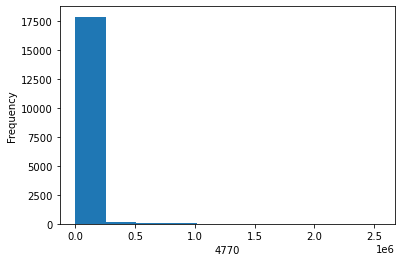

In [88]:
#plotting histogram
data['4770'].plot(kind='hist')
plt.xlabel('4770')
plt.show()

**In this plot we can see the avocados that were sold with plu code 4770.**

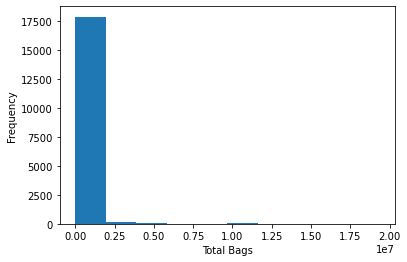

In [89]:
#plotting histogram
data['Total Bags'].plot(kind='hist')
plt.xlabel('Total Bags')
plt.show()

**In this plot we can see the total number of bags that were sold.**

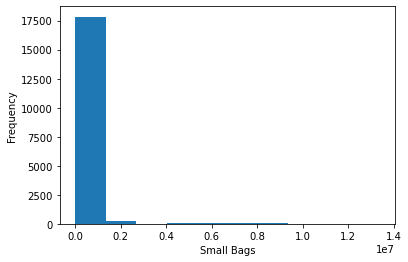

In [638]:
#plotting histogram
data['Small Bags'].plot(kind='hist')
plt.xlabel('Small Bags')
plt.show()

**In this plot we can see the number of small bags that were sold.**

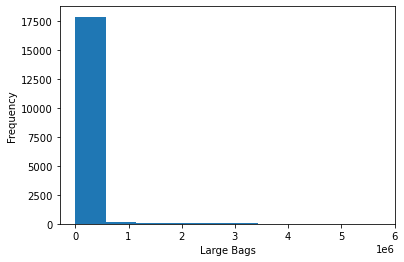

In [91]:
#plotting histogram
data['Large Bags'].plot(kind='hist')
plt.xlabel('Large Bags')
plt.show()

**In this plot we can see the number of large bags that were sold.**

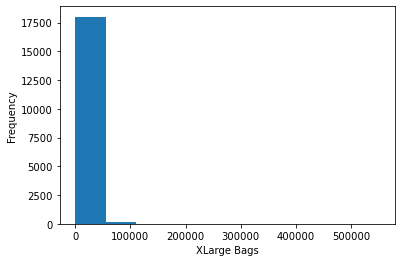

In [92]:
#plotting histogram
data['XLarge Bags'].plot(kind='hist')
plt.xlabel('XLarge Bags')
plt.show()

**In this plot we can see the number of xlarge bags that were sold.**

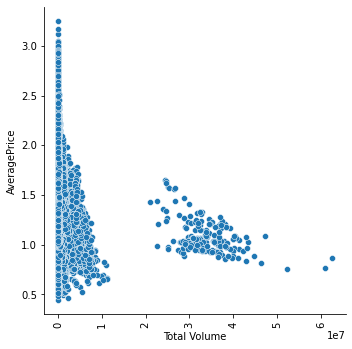

In [94]:
#plotting relational plot
sns.relplot(x='Total Volume', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the avocodas that were sold was having average price between 0.5 to 2.0.**

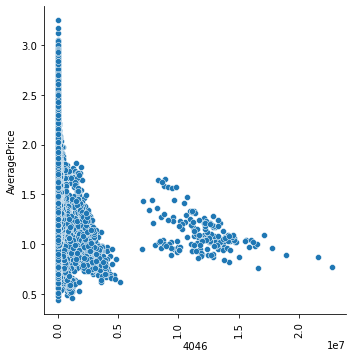

In [95]:
#plotting relational plot
sns.relplot(x='4046', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the avocodas that were sold with plu code 4046 was having average price between 0.5 to 1.7.**

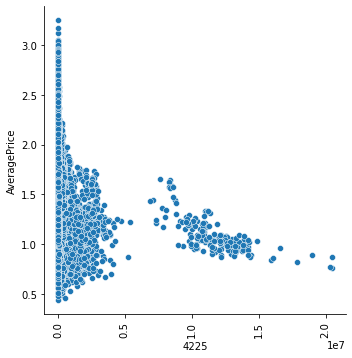

In [96]:
#plotting relational plot
sns.relplot(x='4225', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the avocodas that were sold with plu code 4225 was having average price between 0.5 to 1.8.**

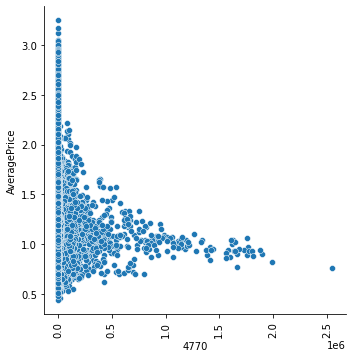

In [97]:
#plotting relational plot
sns.relplot(x='4770', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that most of the avocodas that were sold with plu code 4770 was having average price between 0.5 to 1.5.**

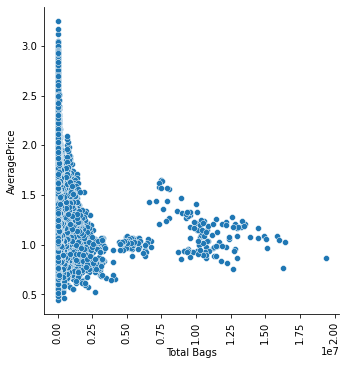

In [98]:
#plotting relational plot
sns.relplot(x='Total Bags', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the bags were sold was having average price between 0.5 to 1.5.**

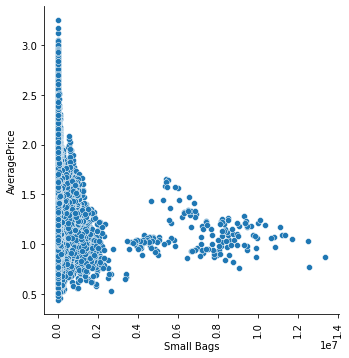

In [99]:
#plotting relational plot
sns.relplot(x='Small Bags', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the small bags were sold was having average price between 0.5 to 1.8.**

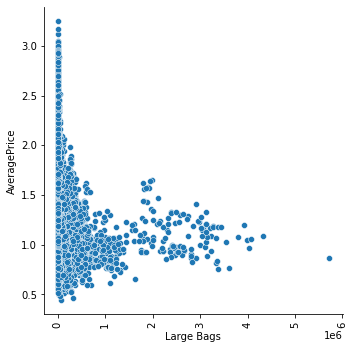

In [639]:
#plotting relational plot
sns.relplot(x='Large Bags', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the large bags were sold was having average price between 0.5 to 1.7.**

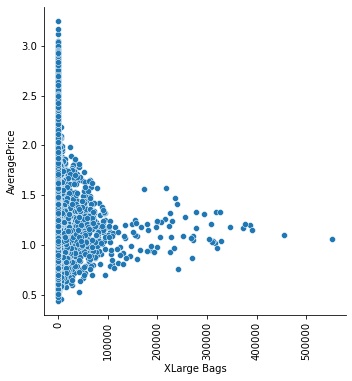

In [101]:
#plotting relational plot
sns.relplot(x='XLarge Bags', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the xlarge bags were sold was having average price between 0.5 to 1.7.**

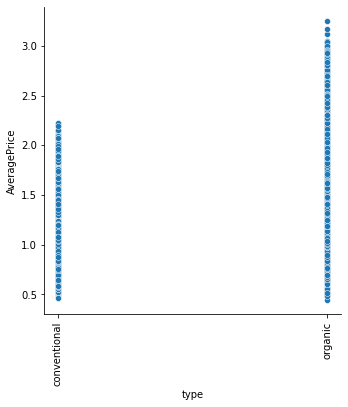

In [102]:
#plotting relational plot
sns.relplot(x='type', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the we can see that organic type average price is between 0.5 to 3.2 and conventional type average price is between 0.5 to 2.3.**

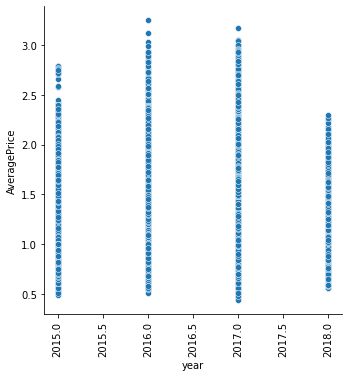

In [103]:
#plotting relational plot
sns.relplot(x='year', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**By looking at the plot we can see that highest average price was in the year 2016 folowed by in year 2017.**

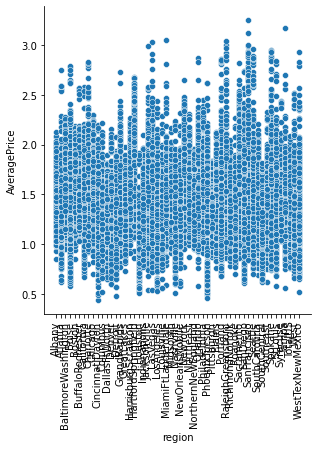

In [104]:
#plotting relational plot
sns.relplot(x='region', y='AveragePrice',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see the average price as per to the regions,so we can say that in most regions the overall average price is same that is between 0.5 to 2.5 and in very few regions sometimes it crosses the barrier of 2.5.**

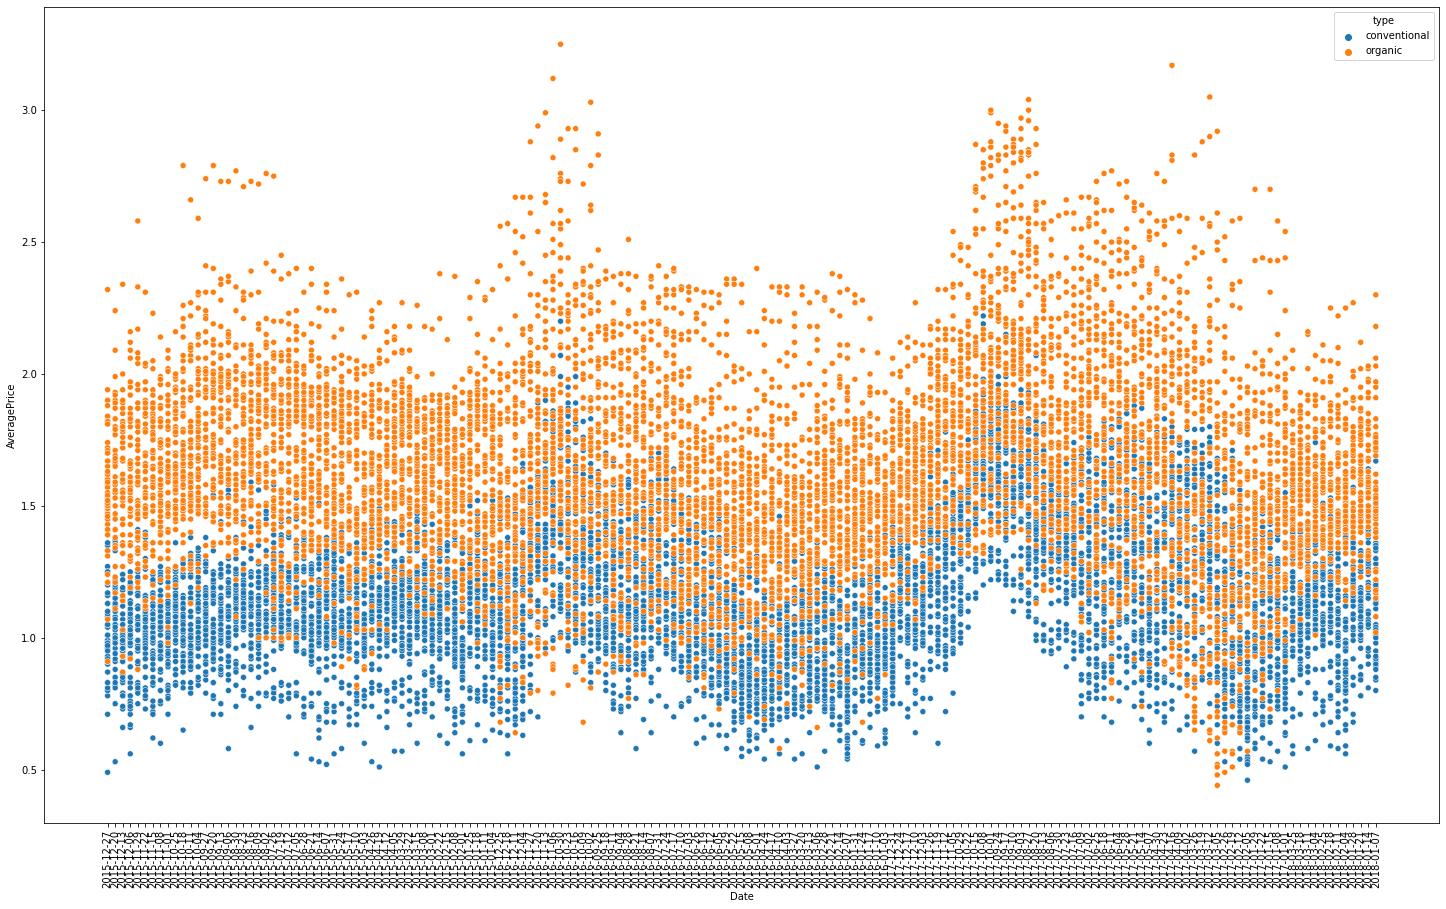

In [242]:
#Plotting scatter plot
plt.figure(figsize=(25,15))
sns.scatterplot(x='Date',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see the saturation of types of avocados, so we can see that most of the avocados which have higher average price are organic type.**

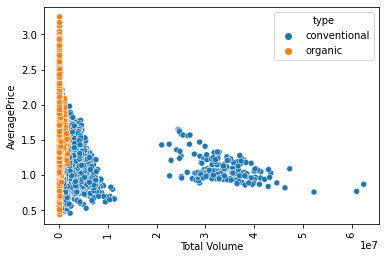

In [243]:
#Plotting scatter plot
sns.scatterplot(x='Total Volume',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the avocados which were sold are of conventional type and average price of organic type is higher than that of conventional type.**

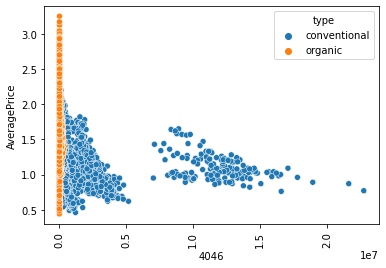

In [244]:
#Plotting scatter plot
sns.scatterplot(x='4046',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the avocados with plu number 4046 that were sold are of conventional type.**

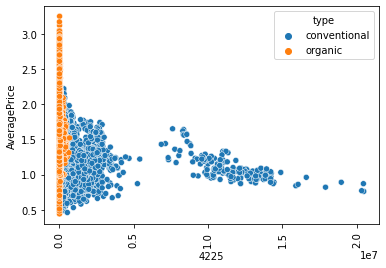

In [245]:
#Plotting scatter plot
sns.scatterplot(x='4225',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the avocados with plu number 4225 that were sold are of conventional type.**

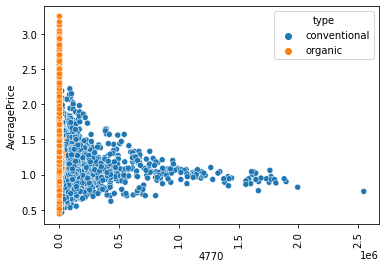

In [246]:
#Plotting scatter plot
sns.scatterplot(x='4770',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the avocados with plu number 4770 that were sold are of conventional type.**

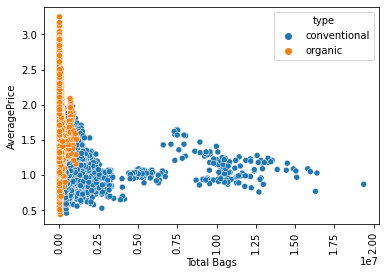

In [247]:
#Plotting scatter plot
sns.scatterplot(x='Total Bags',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the bags that were sold are of conventional type avocado.**

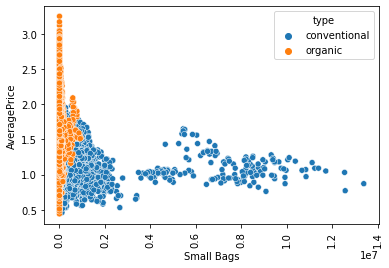

In [248]:
#Plotting scatter plot
sns.scatterplot(x='Small Bags',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the small bags that were sold are of conventional type avocado.**

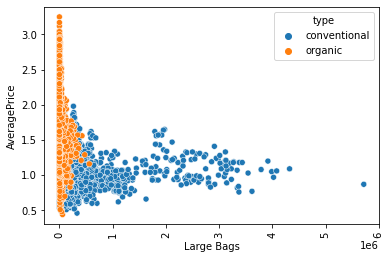

In [249]:
#Plotting scatter plot
sns.scatterplot(x='Large Bags',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the large bags that were sold are of conventional type avocado.**

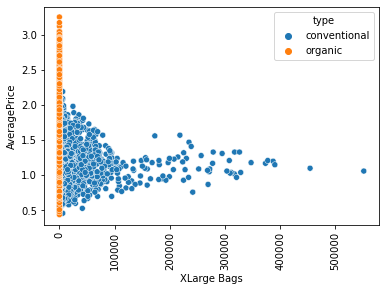

In [250]:
#Plotting scatter plot
sns.scatterplot(x='XLarge Bags',y='AveragePrice',hue='type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the xlarge bags that were sold are of conventional type avocado.**

In [14]:
#Changing Date to months
data['Date']=pd.to_datetime(data['Date'])
data['Date'].dt.month

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Date, Length: 18249, dtype: int64

In [15]:
#Transferring data to ne w column Month
data['Month']=data['Date'].dt.month

In [16]:
#Checking whether the column and data is added or not
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  
0  Albany     12  
1  Albany     12  
2  Albany     12  
3  Albany     12  
4  Albany     11

In [17]:
#Dropping column Date
data=data.drop(['Date'],axis=1)

In [18]:
#Checking value counts
data.Month.value_counts()

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64

In [87]:
#checking mean average price value as per to months
data.groupby('Month')['AveragePrice'].mean()

Month
1     1.312331
2     1.275948
3     1.332352
4     1.375796
5     1.347813
6     1.409093
7     1.461020
8     1.513650
9     1.571656
10    1.577495
11    1.455563
12    1.331829
Name: AveragePrice, dtype: float64

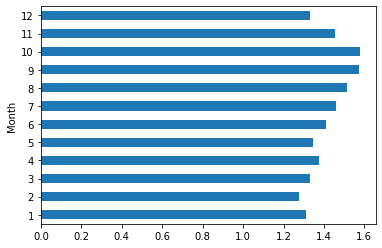

In [88]:
#Plotting horizontal bar plot
data.groupby('Month')['AveragePrice'].mean().plot.barh()
plt.show()

**In this plot we can see in the month october there was an highest average price.**

In [352]:
#checking mean average price value as per to months
data.groupby(['Month','type'])['AveragePrice'].mean()

Month  type        
1      conventional    1.069095
       organic         1.552942
2      conventional    1.017315
       organic         1.531458
3      conventional    1.126209
       organic         1.538301
4      conventional    1.142350
       organic         1.606410
5      conventional    1.089577
       organic         1.603624
6      conventional    1.149198
       organic         1.669536
7      conventional    1.212487
       organic         1.711667
8      conventional    1.235399
       organic         1.789630
9      conventional    1.294738
       organic         1.850571
10     conventional    1.349339
       organic         1.810026
11     conventional    1.206054
       organic         1.705071
12     conventional    1.077393
       organic         1.585193
Name: AveragePrice, dtype: float64

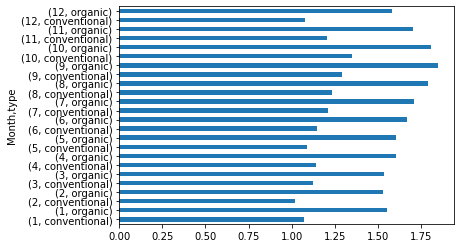

In [425]:
#Plotting horizontal bar plot
data.groupby(['Month','type'])['AveragePrice'].mean().plot.barh()
plt.show()

**In this plot we can see monthwise and typewise distribution of average price**

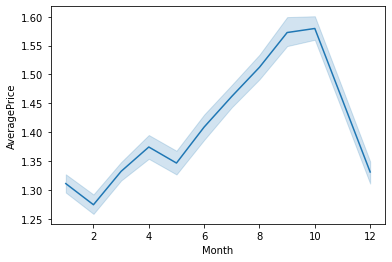

In [647]:
#plotting line plot
sns.lineplot(x='Month',y='AveragePrice',data=data)
plt.show()

**In this plot we can clearly see that for month october average is highest.**

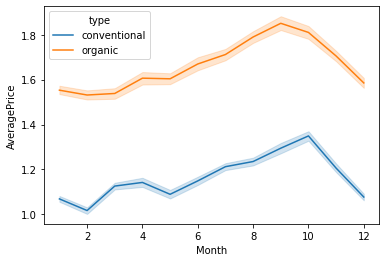

In [648]:
#plotting line plot
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=data)
plt.show()

**In this plot we can see that average price comparison of different type of avocados as per the months.**

In [19]:
#Since columns type and region are categorical, i am using label encoder to encode the data.
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [20]:
#Encoding column Mark,Model,transmission,drive,hand drive and fuel
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['type'])
df2=lab_enc.fit_transform(data['region'])

In [21]:
#Transfering the data 
data['type']=df1
data['region']=df2

In [22]:
#Checking whether the data is encoded or not
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  
0     8603.62       93.25          0.0     0  2015       0     12  
1     9408.07       97.49          0.0     0  2015       0     12  
2     8042.21      103.14          0.0     0  2015       0     12  
3     5677.40      133.76          0.0     0  2015       0     12  
4     5986.26      197.69          0.0     0  2015       0     11

**so we can see that the data have been encoded.**

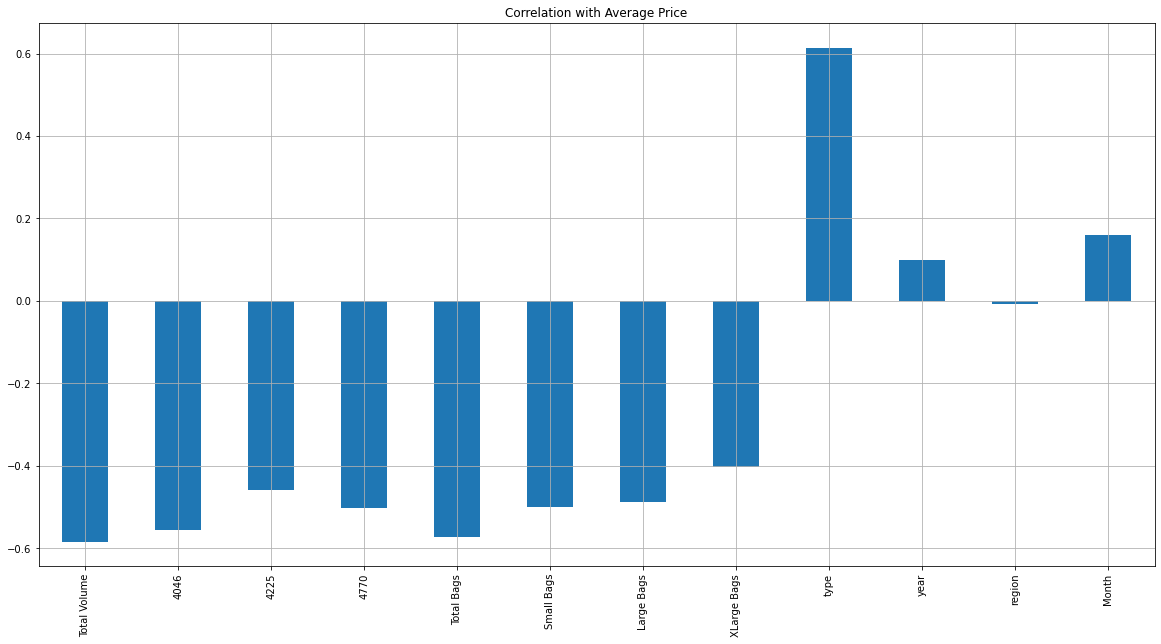

In [89]:
#Checking for correlation
data.drop(['AveragePrice'],axis=1).corrwith(data['AveragePrice']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Average Price')
plt.show()

**So we can see that column 'type' is highly correlated with 'Average price' that is label and 'region' and 'year'are very less correlated with the label that is 'Average Price'.**

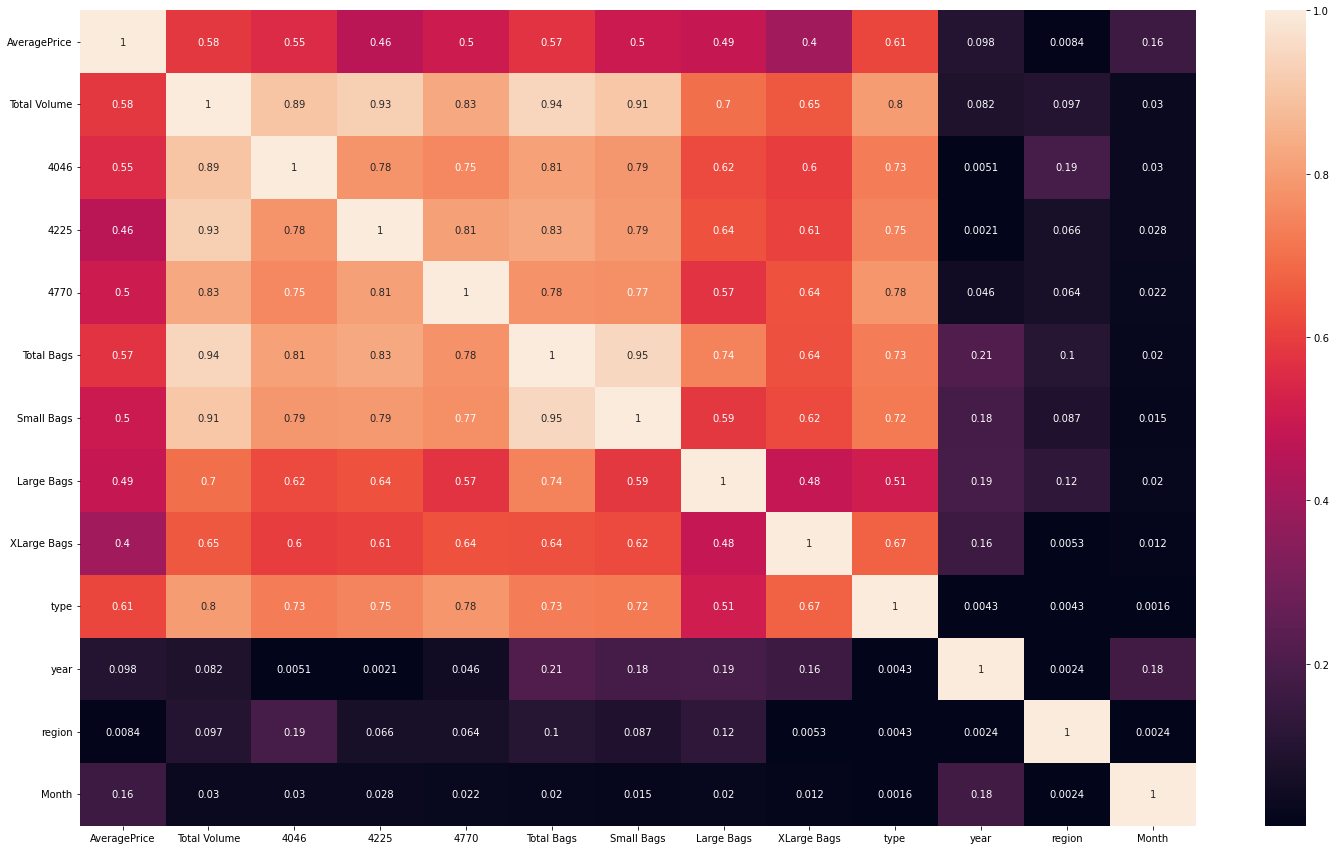

In [90]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True)
plt.show()

* **As i am considering percentage of 75%, meaning if the percentage is 75% and above i will consider them as they are multicorrelated.**
* **Total volume  is multicollrelated with xlarge bags,large bags,small bags,total bags,4770,4225 and 4046.**
* **4046 is multicorrelated with xlarge bags,large bags,small bags,total bags,4770,4225 and Total volume.**
* **4225 is multicorrelated with xlarge bags,large bags,small bags,total bags,4770,Total volume and 4046.**
* **4770 is multicorrelated with xlarge bags,large bags,small bags,total bags,Total volume,4225 and 4046.**
* **Total bags is multicorrelated with xlarge bags,large bags,small bags,4770,4225,4046 and Total volume.**
* **small bags is multicorrelated with xlarge bags,large bags,total bags,4770,4225,4046 and Total volume.**
* **Large bags is multicorrelated with xlarge bags,small bags,total bags,4770,4225,4046 and Total volume.**
* **Xlarge bags is multicorrelated with large bags,small bags,total bags,4770,4225,4046 and Total volume.**
* **So further i will plot the scatter plot and will check whether there is positive relationship or not.**

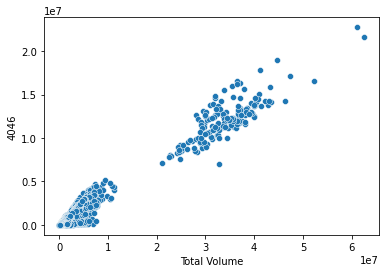

In [29]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Volume',y='4046',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

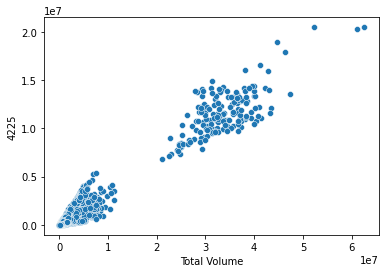

In [30]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Volume',y='4225',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

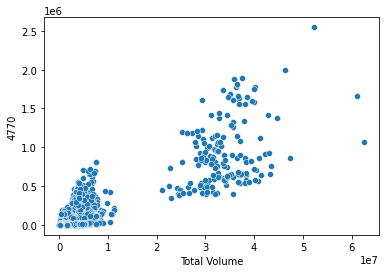

In [31]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Volume',y='4770',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

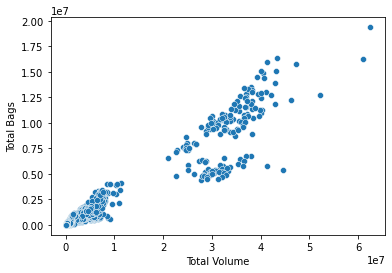

In [32]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Volume',y='Total Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

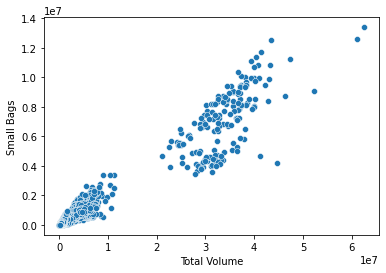

In [33]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Volume',y='Small Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

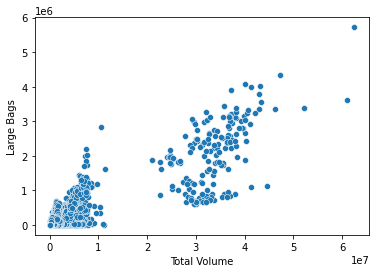

In [34]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Volume',y='Large Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

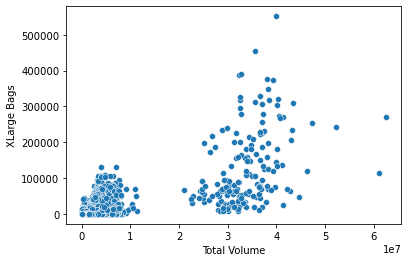

In [35]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Volume',y='XLarge Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

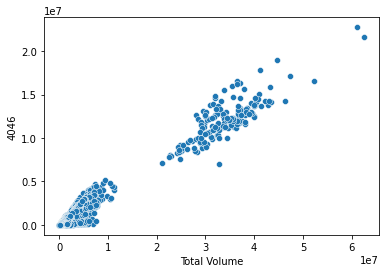

In [36]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Volume',y='4046',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

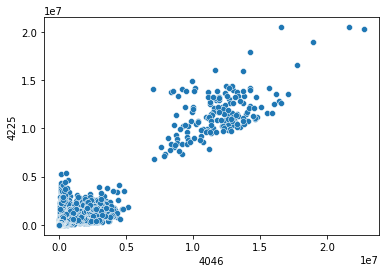

In [37]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4046',y='4225',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

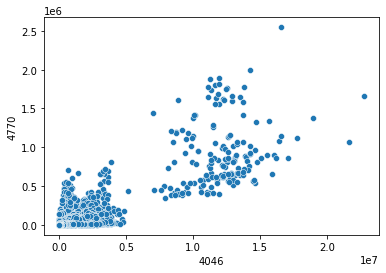

In [38]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4046',y='4770',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

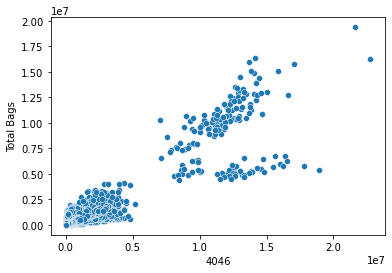

In [39]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4046',y='Total Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

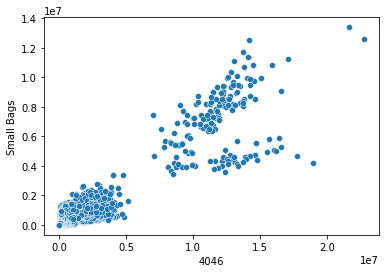

In [40]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4046',y='Small Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

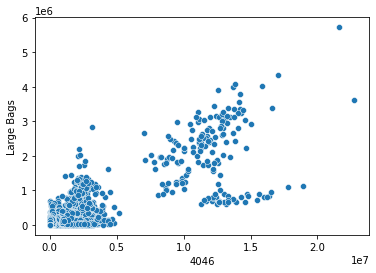

In [41]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4046',y='Large Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

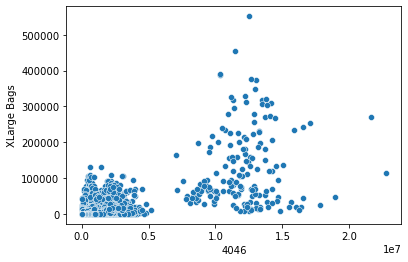

In [42]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4046',y='XLarge Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

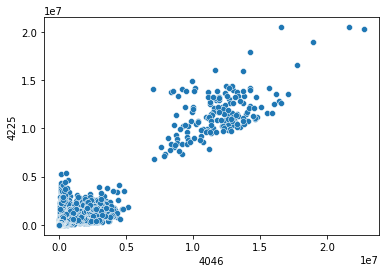

In [43]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4046',y='4225',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

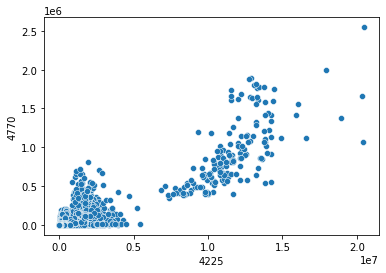

In [44]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4225',y='4770',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

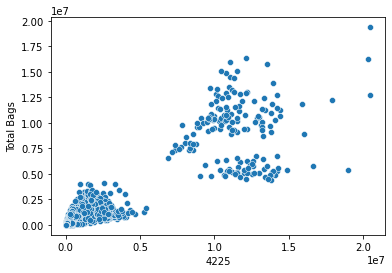

In [45]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4225',y='Total Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

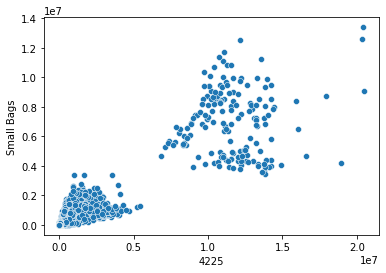

In [46]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4225',y='Small Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

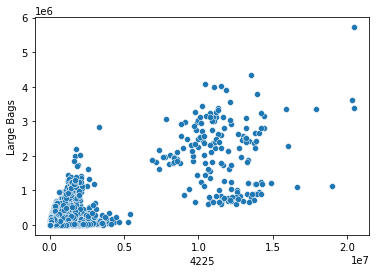

In [47]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4225',y='Large Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

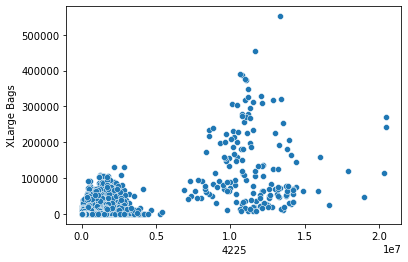

In [48]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4225',y='XLarge Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

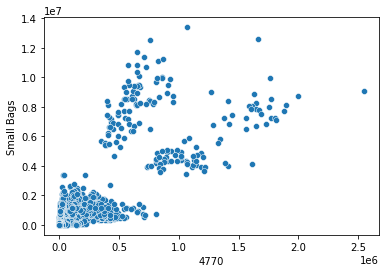

In [49]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4770',y='Small Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

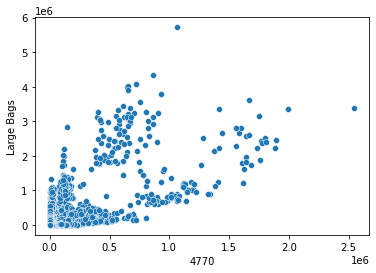

In [50]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4770',y='Large Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

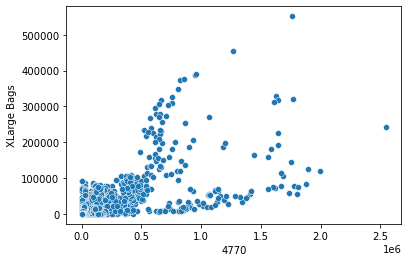

In [51]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4770',y='XLarge Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

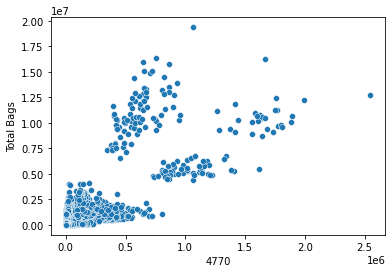

In [52]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='4770',y='Total Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

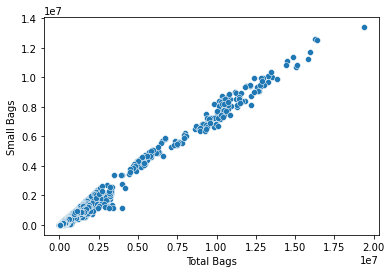

In [53]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Bags',y='Small Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

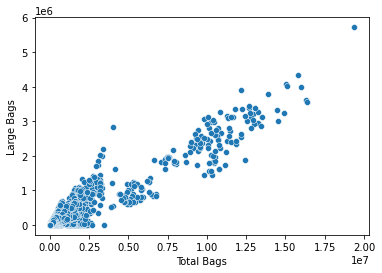

In [54]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Bags',y='Large Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

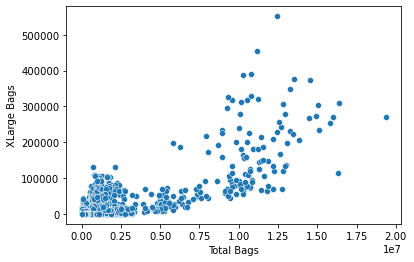

In [55]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Total Bags',y='XLarge Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

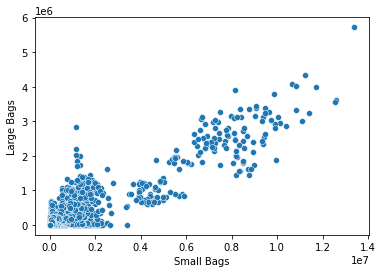

In [56]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Small Bags',y='Large Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

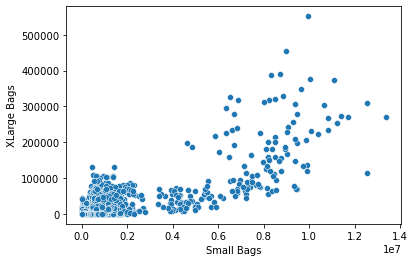

In [57]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Small Bags',y='XLarge Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

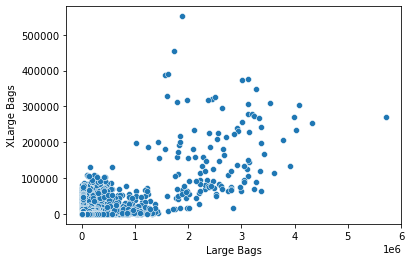

In [58]:
#plotting scatter plot to check the relatioship
sns.scatterplot(x='Large Bags',y='XLarge Bags',data=data)
plt.show()

**By looking at the plot we can see that there is positive relationship.**

**By looking at all the scatter plots it seems that total volume,4046,4225,4770,total bags,small bags,large bags, xlarge bags are multi correlated further i will check with vif and if bu using vif also if i am not finding something significant about multicollinearity than i will use PCA.**

In [23]:
#Checking skewness
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
dtype: float64

**So we can see that in columns total volume,4046,4225,4770,Total Bags,Small Bags,Large Bags and Xlarge bags skewness is there. So using power transform method to remove the skewness.**

In [24]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [25]:
data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]=power_transform(data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']],method='yeo-johnson')
data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.086605 -0.658619  0.307313 -0.247250   -0.524004   -0.340627   
1         -0.155746 -0.776870  0.231647 -0.201041   -0.485890   -0.306425   
2          0.179327 -0.731947  0.579503 -0.007072   -0.552018   -0.366303   
3          0.003876 -0.634200  0.415100 -0.148322   -0.695449   -0.496853   
4         -0.187640 -0.685293  0.224806 -0.137918   -0.669157   -0.477201   
...             ...       ...       ...       ...         ...         ...   
18244     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   -0.178839   
18245     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   -0.325977   
18246     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   -0.308728   
18247     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   -0.248932   
18248     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   -0.212590   

       Large Bags  XLarge Bags  
0       -0.773351    -0.699849  
1       -0.763435    -0.699849  
2       -0.750820    -0.699849  
3       -0.691865    -0.699849  
4       -0.600975    -0.699849  
...           ...          ...  
18244   -0.410859    -0.699849  
18245   -0.481465    -0.699849  
18246   -0.943486    -0.699849  
18247   -0.908510    -0.699849  
18248   -1.042250    -0.699849  

[18249 rows x 8 columns]

In [26]:
#Checking for skewness
data.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
dtype: float64

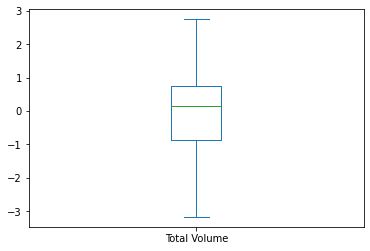

In [215]:
#Checking for outliers in Total Volume
data['Total Volume'].plot.box()
plt.show()

**Outliers are not there in column total volume**

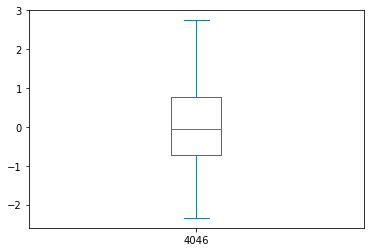

In [216]:
#Checking for outliers in 4046
data['4046'].plot.box()
plt.show()

**Outliers are not there in column 4046**

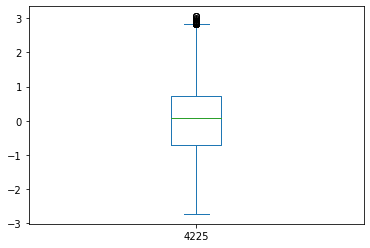

In [217]:
#Checking for outliers in 4225
data['4225'].plot.box()
plt.show()

**Outliers are there in column 4225**

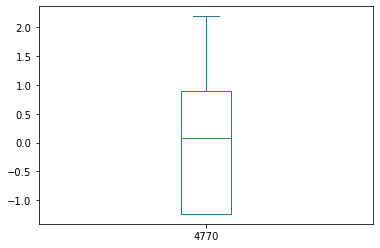

In [218]:
#Checking for outliers in Total Volume
data['4770'].plot.box()
plt.show()

**Outliers are not there in column 4770**

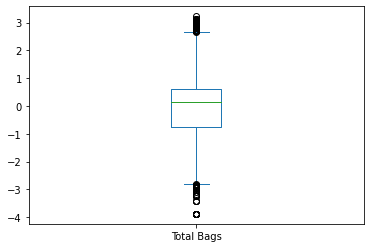

In [219]:
#Checking for outliers in Total Volume
data['Total Bags'].plot.box()
plt.show()

**Outliers athere in column Total Bags**

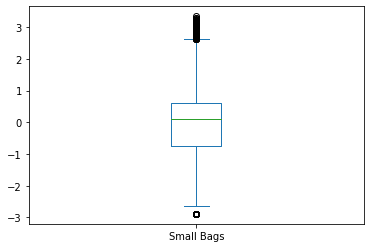

In [220]:
#Checking for outliers in Total Volume
data['Small Bags'].plot.box()
plt.show()

**Outliers are there in column small bags**

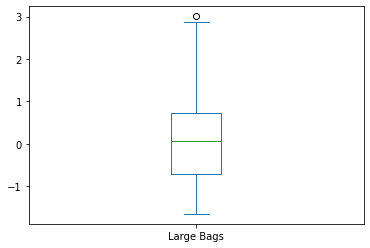

In [221]:
#Checking for outliers in Total Volume
data['Large Bags'].plot.box()
plt.show()

**Outliers are not there in column large bags**

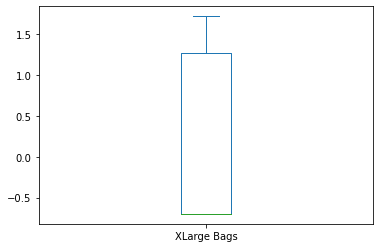

In [222]:
#Checking for outliers in Total Volume
data['XLarge Bags'].plot.box()
plt.show()

**Outliers are not there in column xlarge bags**

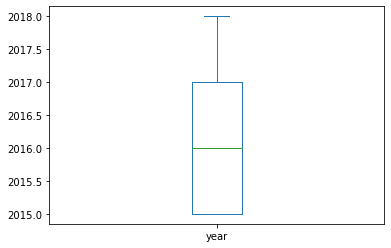

In [223]:
#Checking for outliers in Total Volume
data['year'].plot.box()
plt.show()

**Outliers are not there in column year**

In [27]:
#Importing required libraries
from scipy.stats import zscore

In [28]:
#Removing outliers of 4225,Total Bags,Small Bags and Large Bags
z_score=zscore(data[['4225','Total Bags','Small Bags','Large Bags']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [29]:
data=data[z]

In [30]:
#checking rows and columns
data.shape

(18152, 13)

In [31]:
#Percentage Loss of Data
data_loss=((18249-18152)/18249)*100
print(f'Data Loss:{data_loss} %')

Data Loss:0.5315359745739492 %


In [32]:
#Dividing dataset into features and label
#Features
x=data.drop(['AveragePrice'],axis=1)
#Label
y=data['AveragePrice']

In [33]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-0.0792838 , -0.65611592,  0.3208038 , ..., -1.22116054,
        -1.69811976,  1.6444597 ],
       [-0.14915853, -0.77551768,  0.24422058, ..., -1.22116054,
        -1.69811976,  1.6444597 ],
       [ 0.18947237, -0.73015738,  0.59629534, ..., -1.22116054,
        -1.69811976,  1.6444597 ],
       ...,
       [-0.77145786, -0.61695054, -0.77210133, ...,  1.97209364,
         1.7131469 , -1.46567582],
       [-0.69724986, -0.54672424, -0.70939694, ...,  1.97209364,
         1.7131469 , -1.46567582],
       [-0.6626181 , -0.36257502, -0.78493195, ...,  1.97209364,
         1.7131469 , -1.46567582]])

In [34]:
x_scaler.shape

(18152, 12)

In [35]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

vif       feature
0   52.560241  Total Volume
1    7.246446          4046
2   11.024175          4225
3    4.213982          4770
4   34.532804    Total Bags
5   15.133470    Small Bags
6    3.434018    Large Bags
7    2.145292   XLarge Bags
8    3.694862          type
9    1.382568          year
10   1.100459        region
11   1.054096         Month

**Observation**
* **By looking at the dataframe we can see that total volume,4046,4225,total bags and small bags have value more than means they are multicorrelated.**
* **By looking at the heatmap and after goinf scatter plots we can see that total volume,4046,4225,4770,total bags, small bags, large bags and xlarge bags are multicorrelated.**
* **Because of this situation i am using PCA for all dependent fetaures to reduce multi colinearity.**

In [37]:
#Importing required libraries
from sklearn.decomposition import PCA

In [38]:
pca=PCA()
pca.fit_transform(x_scaler)

array([[-0.76364491, -2.16774721,  1.77753489, ...,  0.718974  ,
        -0.04909035,  0.06939019],
       [-0.81185073, -2.15117831,  1.79122524, ...,  0.72834725,
        -0.04703533,  0.04594772],
       [-0.52615139, -2.22252433,  1.80189964, ...,  0.70868138,
         0.02147316,  0.23106523],
       ...,
       [-1.52560123,  2.33289371, -1.61535182, ..., -0.86295051,
         0.01166498, -0.0373625 ],
       [-1.3969087 ,  2.33662937, -1.62848484, ..., -0.85050888,
         0.01807672, -0.03609131],
       [-1.45208478,  2.3543971 , -1.65316728, ..., -0.77368716,
         0.04232429, -0.05661989]])

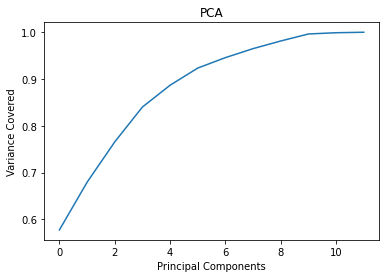

In [39]:
#Plotting scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

**By looking at the plot around 9 components are able to explain >97% variance. It is safe to consider starting 9 pc's.**

In [40]:
pca=PCA(n_components=9)
new_data=pca.fit_transform(x_scaler)
princi_comp=pd.DataFrame(new_data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])
princi_comp

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     -0.763645 -2.167747  1.777535 -0.403097 -0.249214  0.527476  0.782383   
1     -0.811851 -2.151178  1.791225 -0.425467 -0.233992  0.513230  0.812698   
2     -0.526151 -2.222524  1.801900 -0.338354 -0.295344  0.555484  0.907516   
3     -0.745992 -2.208092  1.775766 -0.356799 -0.276723  0.402466  0.905956   
4     -0.852813 -2.004982  1.773165 -0.177961 -0.276373  0.280394  0.907588   
...         ...       ...       ...       ...       ...       ...       ...   
18147 -1.787049  2.481441 -1.799715 -0.258367  0.311610  0.491560 -0.088810   
18148 -1.914798  2.605191 -1.757034  0.013929  0.375834  0.416264  0.028336   
18149 -1.525601  2.332894 -1.615352  0.308180  0.831296  0.760463  0.611890   
18150 -1.396909  2.336629 -1.628485  0.306727  0.777581  0.796660  0.565614   
18151 -1.452085  2.354397 -1.653167  0.292160  0.813485  0.925973  0.369573   

            pc8       pc9  
0     -0.232402  0.181320  
1     -0.144134  0.051166  
2      0.001314  0.394363  
3     -0.212570  0.377562  
4     -0.221626  0.143284  
...         ...       ...  
18147 -0.197145 -0.035270  
18148 -0.042105  0.205356  
18149  0.755167 -0.022874  
18150  0.739235 -0.000646  
18151  0.470292  0.024999  

[18152 rows x 9 columns]

In [85]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Gradient Boosting**

In [69]:
#Initiating Gradient Boosting Regression
gb=GradientBoostingRegressor()

In [49]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=i)
    gb.fit(x_train,y_train)
    pred=gb.predict(x_train)
    y_pred=gb.predict(x_test)
    print(f'at random state {i}, training accuracy is {metrics.r2_score(y_train,pred)*100}')
    print(f'at random state {i}, testing accuracy is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

at random state 0, training accuracy is 71.55475389860106
at random state 0, testing accuracy is 69.47499803196536


at random state 1, training accuracy is 72.32318579618695
at random state 1, testing accuracy is 69.56584377826927


at random state 2, training accuracy is 71.4257699619064
at random state 2, testing accuracy is 69.90682324821364


at random state 3, training accuracy is 71.81480075932889
at random state 3, testing accuracy is 69.08456415422668


at random state 4, training accuracy is 71.74537205155798
at random state 4, testing accuracy is 69.28726217464731


at random state 5, training accuracy is 71.94635447843905
at random state 5, testing accuracy is 68.0866252929405


at random state 6, training accuracy is 71.76806889271475
at random state 6, testing accuracy is 69.20847140969049


at random state 7, training accuracy is 71.51748550007169
at random state 7, testing accuracy is 70.37288929530416


at random state 8, training accuracy is 71.58629656197448
at rando

**Taking random state as 76**

In [70]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=76)

In [71]:
#Training the Model
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [72]:
pred=gb.predict(x_train)
y_pred=gb.predict(x_test)

In [73]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 71.6120992096461

 Testing Score: 71.02190617640854


In [244]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [251]:
#Checking cross validation score for Gradient Boosting
for j in range(2,6):
    cv_score=cross_val_score(gb,princi_comp,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is -2.440533919252859and accuracy for the testing is 0.7101616676498306


at cross fold 3 the cv score is -0.06566916694602705and accuracy for the testing is 0.7101616676498306


at cross fold 4 the cv score is 0.10634591803673743and accuracy for the testing is 0.7101616676498306


at cross fold 5 the cv score is 0.20004146328119687and accuracy for the testing is 0.7101616676498306




**Taking cv=5**

In [499]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

0.16481652335825586

In [500]:
#mean squared error
mean_squared_error(y_test,y_pred)

0.04666277085210029

In [501]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.21601567270015454

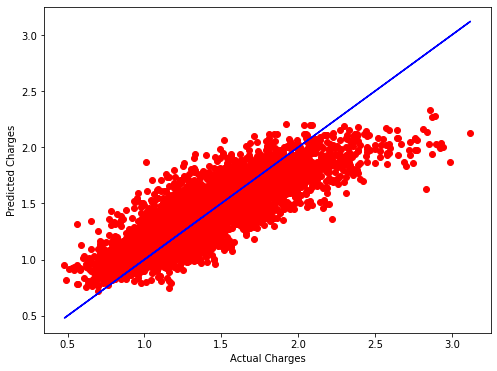

In [502]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

**Random Forest**

In [98]:
#Instantiating Random Forest
rf=RandomForestRegressor()

In [99]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=76)

In [100]:
#Training the Model
rf.fit(x_train,y_train)

RandomForestRegressor()

In [101]:
pred=rf.predict(x_train)
y_pred=rf.predict(x_test)

In [102]:
#Printing Training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 98.17352151789801

 Testing score: 87.50198881942698


In [252]:
#Checking cross validation score for Random Forest
cv_score=cross_val_score(rf,princi_comp,y,cv=5).mean()
cv_score

0.20450181308532883

In [253]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.09898717496694578

In [254]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.02006059059056853

In [255]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.14163541432342594

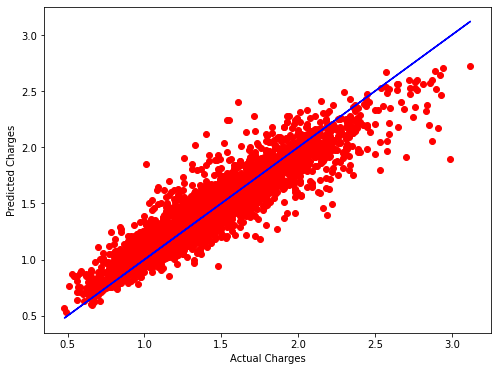

In [256]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

**Ada Boost**

In [79]:
#Instantiating Ada Boost Regressor
ada=AdaBoostRegressor()

In [80]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=76)

In [81]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [82]:
pred=ada.predict(x_train)
y_pred=ada.predict(x_test)

In [83]:
#Printing Training and Testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 53.960421912354526

 Testing Score: 55.081513433050276


In [262]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [263]:
#Checking cross validation score for Ada Boost
cv_score=cross_val_score(ada,princi_comp,y,cv=5).mean()
cv_score

-0.03464672860746565

In [264]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.21395836847025135

In [265]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.0714232276785033

In [266]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.26725124448448

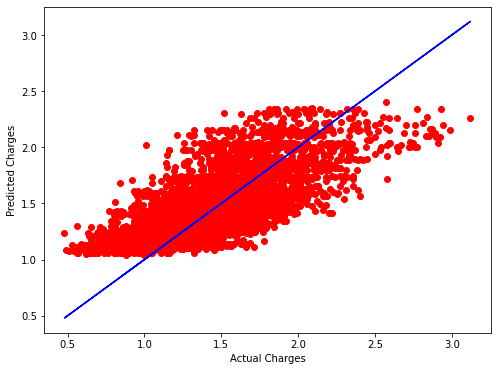

In [267]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

**XGBOOST**

In [86]:
#Instantiating XGBoost
xgb=xgb.XGBRegressor()

In [87]:
#since random state  has highest testing score,so taking random state as 
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=76)

In [88]:
#Training data
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [89]:
pred=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [90]:
#Printing Training and Testing Score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 94.26148304200484

 Testing Score: 86.0042422894365


In [273]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [274]:
#Checking cross validation score for XGBoost
cv_score=cross_val_score(xgb,princi_comp,y,cv=5).mean()
cv_score

0.2853609889016906

In [275]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.11089421218793893

In [276]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.02253177805969362

In [277]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.15010588949036482

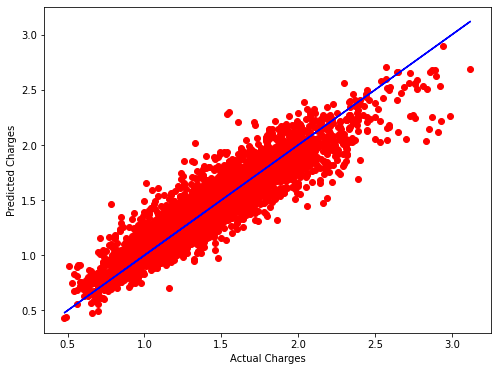

In [278]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

In [217]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Gradient Boosting','Random forest','Ada Boost','XGBoost'],
    'Training Score':[71.61,98.16,54.50,94.26],
    'Testing Score':[71.01,87.50,55.63,86.00],
    'cv score':[20.00,20.45,-3,28],
    'RMSE':[0.21,0.14,0.26,0.15]
})
data

Models  Training Score  Testing Score  cv score  RMSE
0  Gradient Boosting           71.61          71.01     20.00  0.21
1      Random forest           98.16          87.50     20.45  0.14
2          Ada Boost           54.50          55.63     -3.00  0.26
3            XGBoost           94.26          86.00     28.00  0.15

**Observation**
* **By going through each and every model we can see that, Random forest have the highest training score followed by XGBoost, Gradient Boosting and Ada Boost.**
* **Where is again Random Forest have the highest testing score followed by XGBoost,gradient boost and ada boost.**
* **While Xgboost has the highest cv score followed by random forest,gradient boosting and ada boost.**
* **While Random Forest has the very less RMSE score followed by XGBoost,gradient boosting and ada boost.**
* **By looking at the training score and RMSE score, i will go forward with Random Forest Regressor as it has seen most of the data and it has the highest testing score and most importantly it has lowest RMSE(Root mean squared error).That is why i am choosing Random Forest Regressor.**

In [91]:
#Using Grid Search cv for hyperparameter tuning for Gradient Boosting
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid=({
    'n_estimators': [5,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2],
    'criterion' :['mse', 'mae']
})

In [93]:
grid_search=GridSearchCV(rf,param_grid=param_grid,cv=5)

In [94]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 2],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10]})

In [103]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 10}

In [111]:
#Training with the best parameters
rf=RandomForestRegressor(criterion='mse',max_depth=2,max_features='auto',n_estimators=10)
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=2, max_features='auto',
                      n_estimators=10)

In [112]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 98.17352151789801

 Testing Score: 87.50198881942698


**After hypertuning also the testing score remains the same, but i will consider this model as this model has been tuned.**

In [114]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.09975456148082855

In [115]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.0201205550947554

In [116]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.14184694249350388

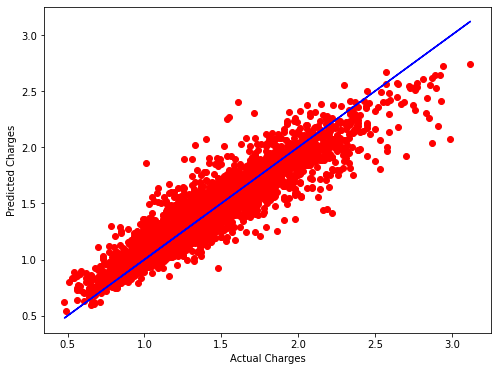

In [117]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

In [118]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rf,open('Avocado project Regressor','wb'))

# Prediction for region

**As we have already done EDA so i wont be doing the eda part and visualization part.**

**Further i will change the Date column to Month column.**

**I will encode the data of type and region.**

**Further i will check for skewnees again and remove it by using power transform method.**

**Again will check for outliers.**

**Will check for multicollinearity and will take further steps.**

In [119]:
#loading dataset again
df=pd.read_csv('avocado.csv')

In [120]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [121]:
#removing unwanted column
df=df.drop(['Unnamed: 0'],axis=1)

In [122]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

**so we can see that the Unnamed: 0 column have been dropped.**

In [123]:
##Changing Date to months
df['Date']=pd.to_datetime(df['Date'])
df['Date'].dt.month

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Date, Length: 18249, dtype: int64

In [124]:
#Transferring data to new column Month
df['Month']=df['Date'].dt.month

In [125]:
#Checking whether the column and data is added or not
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  
0  Albany     12  
1  Albany     12  
2  Albany     12  
3  Albany     12  
4  Albany     11

In [126]:
#Dropping column Date
df=df.drop(['Date'],axis=1)

In [127]:
#Encoding the column type and region
#Encoding column Mark,Model,transmission,drive,hand drive and fuel
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(df['type'])
df2=lab_enc.fit_transform(df['region'])

In [128]:
#Transfering the data 
df['type']=df1
df['region']=df2

In [129]:
#Checking whether the data is encoded or not
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  
0     8603.62       93.25          0.0     0  2015       0     12  
1     9408.07       97.49          0.0     0  2015       0     12  
2     8042.21      103.14          0.0     0  2015       0     12  
3     5677.40      133.76          0.0     0  2015       0     12  
4     5986.26      197.69          0.0     0  2015       0     11

**so we can see that column type and region have been encoded.**

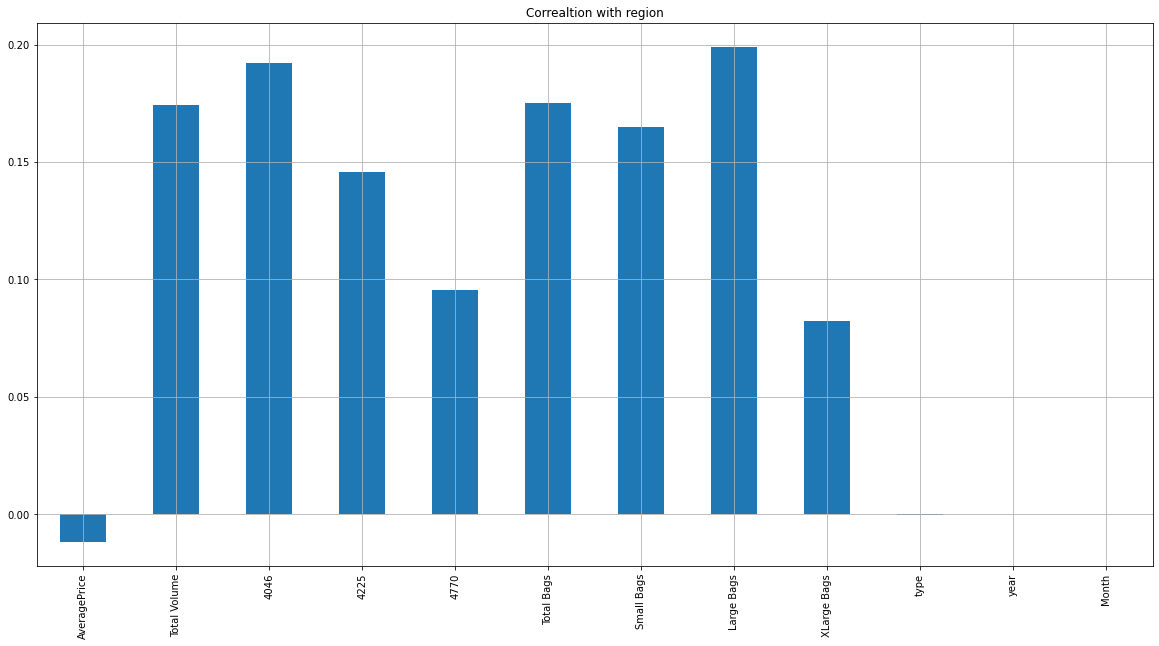

In [130]:
#Checking correlation
df.drop(['region'],axis=1).corrwith(df['region']).plot(kind='bar',grid=True,figsize=(20,10),title='Correaltion with region')
plt.show()

**So by looking at this plot we can see that large bags, total volume, 4046 total bags and small bags are highly related to the label that is region and year, type and month are very least correlated.**

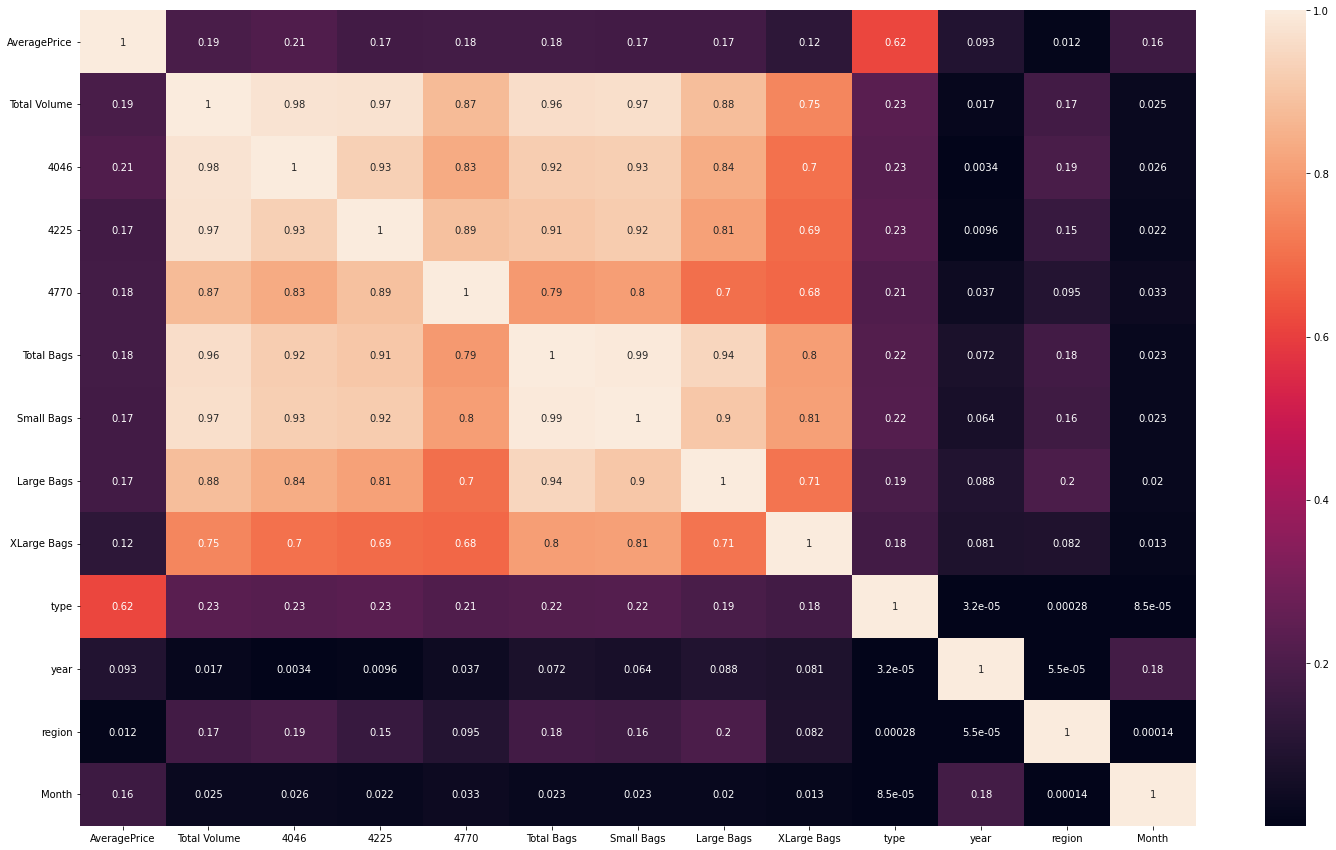

In [131]:
#Plotting heatmap
corr=df.corr().abs()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**
* **As i am considering percentage of 75%, meaning if the percentage is 75% and above i will consider them as they are multicorrelated.**
* **Total volume is multicollrelated with xlarge bags,large bags,small bags,total bags,4770,4225 and 4046.**
* **4046 is multicorrelated with large bags,small bags,total bags,4770,4225 and Total volume.**
* **4225 is multicorrelated with large bags,small bags,total bags,4770,Total volume and 4046.**
* **4770 is multicorrelated with small bags,total bags,Total volume,4225 and 4046.**
* **Total bags is multicorrelated xlarge bags,large bags,small bags,4770,4225,4046 and Total volume.**
* **small bags is multicorrelated with xlarge bags,large bags,total bags,4770,4225,4046 and Total volume.**
* **So further i will plot the scatter plot and will check whether there is positive relationship or not.**

**In regression model we have seen that all the above mentioned colums are multicorrelated and after using vif we are not abLe to confrim about it so firther i will be using PCA.**

In [132]:
#Checking skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
dtype: float64

**So we can see that in column total volume,4046,4225,4770, total bags,small bags and xlarge bags we have skewness, so will be using power transform method to remove it.**

In [133]:
df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]=power_transform(df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']],method='yeo-johnson')
df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.086605 -0.658619  0.307313 -0.247250   -0.524004   -0.340627   
1         -0.155746 -0.776870  0.231647 -0.201041   -0.485890   -0.306425   
2          0.179327 -0.731947  0.579503 -0.007072   -0.552018   -0.366303   
3          0.003876 -0.634200  0.415100 -0.148322   -0.695449   -0.496853   
4         -0.187640 -0.685293  0.224806 -0.137918   -0.669157   -0.477201   
...             ...       ...       ...       ...         ...         ...   
18244     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   -0.178839   
18245     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   -0.325977   
18246     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   -0.308728   
18247     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   -0.248932   
18248     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   -0.212590   

       Large Bags  XLarge Bags  
0       -0.773351    -0.699849  
1       -0.763435    -0.699849  
2       -0.750820    -0.699849  
3       -0.691865    -0.699849  
4       -0.600975    -0.699849  
...           ...          ...  
18244   -0.410859    -0.699849  
18245   -0.481465    -0.699849  
18246   -0.943486    -0.699849  
18247   -0.908510    -0.699849  
18248   -1.042250    -0.699849  

[18249 rows x 8 columns]

In [134]:
#Checking skweness
df.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
dtype: float64

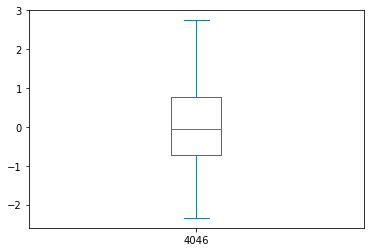

In [135]:
#Checking for outliers in 4046
df['4046'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are not present.**

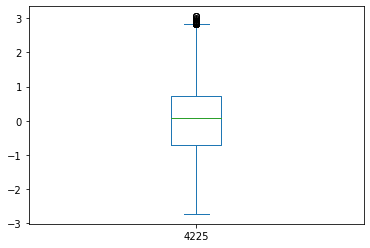

In [136]:
#Checking for outliers in 4225
df['4225'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are present.**

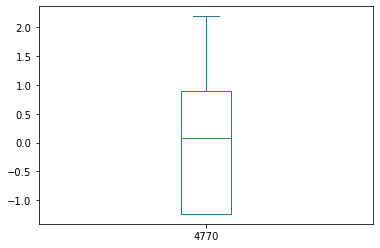

In [137]:
#Checking for outliers in Total Volume
df['4770'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are not present.**

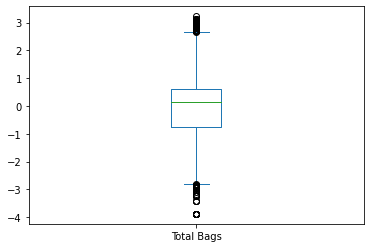

In [138]:
#Checking for outliers in Total Volume
df['Total Bags'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are present.**

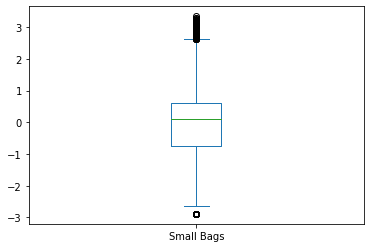

In [139]:
#Checking for outliers in Total Volume
df['Small Bags'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are present.**

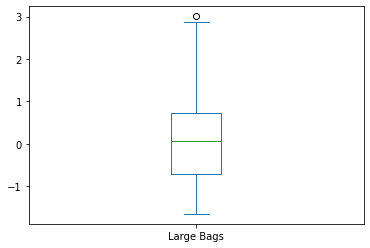

In [140]:
#Checking for outliers in Total Volume
df['Large Bags'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are present.**

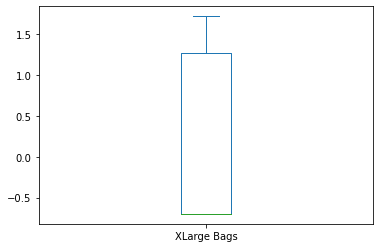

In [141]:
#Checking for outliers in Total Volume
df['XLarge Bags'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are not present.**

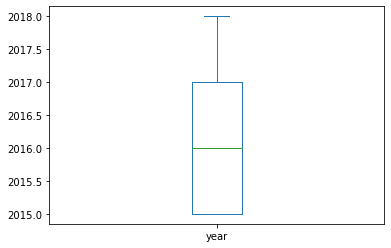

In [142]:
#Checking for outliers in Total Volume
df['year'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are not present.**

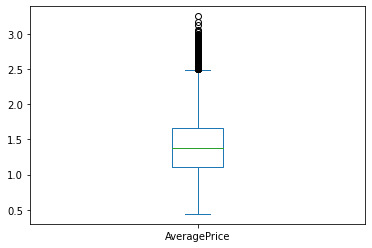

In [143]:
#Checking for outliers in Total Volume
df['AveragePrice'].plot.box()
plt.show()

**By looking at the plot we can see that outliers are present.**

In [144]:
#Removing outliers of 4225,Total Bags,Small Bags and Large Bags
z_score=zscore(df[['4225','Total Bags','Small Bags','Large Bags','AveragePrice']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [145]:
df=df[z]

In [146]:
#checking rows and columns
df.shape

(18026, 13)

In [147]:
#Percentage Loss of Data
data_loss=((18249-18026)/18249)*100
print(f'Data Loss:{data_loss} %')

Data Loss:1.2219847662885637 %


In [148]:
#Dividing dataset into features and label
#Features
x=df.drop(['region'],axis=1)
#Label
y=df['region']

In [149]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-0.17279496, -0.08638631, -0.6619971 , ..., -0.99501961,
        -1.21596008,  1.64745223],
       [-0.12102697, -0.15631176, -0.78138627, ..., -0.99501961,
        -1.21596008,  1.64745223],
       [-1.20815462,  0.18256493, -0.73603075, ..., -0.99501961,
        -1.21596008,  1.64745223],
       ...,
       [ 1.22494059, -0.77906277, -0.62283585, ...,  1.00500531,
         1.97378957, -1.4603739 ],
       [ 1.38024454, -0.7048009 , -0.55261696, ...,  1.00500531,
         1.97378957, -1.4603739 ],
       [ 0.5778408 , -0.67014401, -0.36848717, ...,  1.00500531,
         1.97378957, -1.4603739 ]])

In [150]:
pca=PCA()
pca.fit_transform(x_scaler)

array([[-0.64720912, -2.16405906,  0.34963668, ..., -0.17327432,
        -0.05617696,  0.08149395],
       [-0.70641382, -2.14400514,  0.38273918, ..., -0.24682932,
        -0.04752845,  0.05778685],
       [-0.16716062, -2.2965479 , -0.12310305, ...,  0.396033  ,
        -0.08845677,  0.23491161],
       ...,
       [-1.8705827 ,  2.38291182,  0.04900579, ...,  0.43427482,
         0.01205168, -0.0555544 ],
       [-1.78320821,  2.40236294,  0.13766873, ...,  0.3848477 ,
         0.03288474, -0.05258945],
       [-1.64257223,  2.35439754, -0.22587642, ...,  0.5531213 ,
        -0.00299363, -0.0774572 ]])

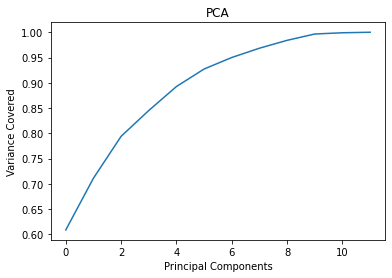

In [151]:
#Plotting scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

**By looking at the plot around 9 components are able to explain >97% variance. It is safe to consider starting 9 pc's.**

In [152]:
pca=PCA(n_components=9)
new_data=pca.fit_transform(x_scaler)
princi_components=pd.DataFrame(new_data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])
princi_components

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     -0.647209 -2.164059  0.349637  0.016332 -0.349784  0.688379  0.906515   
1     -0.706414 -2.144005  0.382739 -0.003378 -0.362101  0.672413  0.951291   
2     -0.167161 -2.296548 -0.123103  0.441239 -0.752027  0.927629  1.048765   
3     -0.473866 -2.257798  0.021222  0.338342 -0.665381  0.726269  1.011285   
4     -0.701153 -2.026825  0.052835  0.093946 -0.425690  0.485034  1.022873   
...         ...       ...       ...       ...       ...       ...       ...   
18021 -1.973032  2.487647  0.120645  0.158545  0.131409  0.520513 -0.301641   
18022 -2.147100  2.615321 -0.031131 -0.101341  0.276164  0.330414 -0.129142   
18023 -1.870583  2.382912  0.049006 -0.989818  0.544349  0.381713  0.530798   
18024 -1.783208  2.402363  0.137669 -1.049287  0.694053  0.356059  0.493710   
18025 -1.642572  2.354398 -0.225876 -0.653118  0.256091  0.743998  0.212495   

            pc8       pc9  
0      0.052384  0.804179  
1     -0.073148  0.748666  
2     -0.136845  0.904342  
3      0.097435  0.828164  
4      0.076709  0.670112  
...         ...       ...  
18021  0.209006 -0.000062  
18022  0.219230  0.188477  
18023 -0.121732 -0.980429  
18024 -0.090226 -0.959246  
18025 -0.008329 -0.837478  

[18026 rows x 9 columns]

In [153]:
#Checking whether label is balanced or not
data.region.value_counts()

0     338
37    338
26    338
28    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
38    338
24    338
39    338
40    338
41    338
44    338
45    338
46    338
49    338
50    338
52    338
25    338
27    338
23    338
12    338
2     338
4     338
5     338
6     338
7     338
8     338
9     338
22    338
11    338
10    338
19    338
21    338
15    338
16    338
17    338
18    338
13    338
20    338
48    337
3     337
1     337
36    337
14    337
43    336
53    335
47    332
42    322
51    270
Name: region, dtype: int64

**we can see that data is balnced**

In [154]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

**Xtreme Gradient Boosting**

In [155]:
#Initiating Logistic Regression
xgb=xgb.XGBClassifier()

In [140]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_components,y,test_size=0.25,random_state=i)
    xgb.fit(x_train,y_train)
    pred=xgb.predict(x_train)
    y_pred=xgb.predict(x_test)
    print(f'at random state{i},the training accuracy is:{accuracy_score(y_train,pred)*100}')
    print(f'at random state{i},the testing accuracy is:{accuracy_score(y_test,y_pred)*100}')
    print('\n')

at random state0,the training accuracy is:100.0
at random state0,the testing accuracy is:83.51453294874639


at random state1,the training accuracy is:100.0
at random state1,the testing accuracy is:84.24672731306856


at random state2,the training accuracy is:100.0
at random state2,the testing accuracy is:84.24672731306856


at random state3,the training accuracy is:100.0
at random state3,the testing accuracy is:84.31329043709785


at random state4,the training accuracy is:100.0
at random state4,the testing accuracy is:83.6920346128245


at random state5,the training accuracy is:100.0
at random state5,the testing accuracy is:84.82360772132239


at random state6,the training accuracy is:100.0
at random state6,the testing accuracy is:84.64610605724428


at random state7,the training accuracy is:100.0
at random state7,the testing accuracy is:85.17861104947859


at random state8,the training accuracy is:100.0
at random state8,the testing accuracy is:84.44641668515642


at random state9,the

**Taking random state as 34.**

In [156]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(princi_components,y,test_size=0.25,random_state=34)

In [157]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
        print('\n F1 Score:\n',f1_score(y_test,y_pred,average='micro'))

In [158]:
#Training the data
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [159]:
#calling the function and passing the dataset for logistic regression
metric_score(xgb,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(xgb,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:85.98%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        87
           1       0.77      0.63      0.69        73
           2       0.93      0.93      0.93        94
           3       0.85      0.79      0.82        86
           4       0.88      0.95      0.91        83
           5       0.91      0.80      0.85        87
           6       0.98      0.96      0.97        83
           7       0.87      0.86      0.87        96
           8       0.96      0.89      0.93        92
           9       0.87      0.92      0.89        74
          10       0.78      0.81      0.80        84
          11       0.82      0.91      0.86        80
          12       0.92      0.91      0.91        85
          13       0.82      0.80      0.81        76
          14       0.91      0.85      0.88        88
          15  

In [145]:
#Checking Cross Validation score
#Importing required libraries
from sklearn.model_selection import cross_val_score

In [147]:
y_pred=xgb.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred)

In [148]:
#Checking cross validation score
for j in range(36,41):
    cv_score=cross_val_score(xgb,princi_components,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 36 the cv score is0.756560878243513and accuracy for the testing is 0.8597736853783005


at cross fold 37 the cv score is0.7641610540422268and accuracy for the testing is 0.8597736853783005


at cross fold 38 the cv score is0.7661484156760989and accuracy for the testing is 0.8597736853783005


at cross fold 39 the cv score is0.7616611849873188and accuracy for the testing is 0.8597736853783005


at cross fold 40 the cv score is0.7584358216309436and accuracy for the testing is 0.8597736853783005




**Taking cv=39**

In [155]:
#plotting roc curve
fprate,tprate,threshold=roc_curve(y_test,y_pred,pos_label=1)

In [156]:
print('FPR',fprate)
print('TPR',tprate)
print('Threshold',threshold)

FPR [0.         0.01736581 0.03856563 0.0541272  0.07284619 0.08930988
 0.10667569 0.12268832 0.14230943 0.16215607 0.18313036 0.20049617
 0.21447903 0.23274696 0.25011276 0.27176364 0.2947677  0.31529093
 0.33491204 0.37009472 0.38813712 0.40888588 0.42963464 0.44609833
 0.46865133 0.48443843 0.50338295 0.51759134 0.53631033 0.5518719
 0.57352278 0.590212   0.60847993 0.62764998 0.64839874 0.66982409
 0.68673884 0.71019396 0.7300406  0.74853406 0.76477221 0.78371673
 0.8037889  0.82318448 0.84032476 0.85949481 0.88092016 0.89941362
 0.91677943 0.93707713 0.95511953 0.97631935 0.97947677 1.        ]
TPR [0.         0.05479452 0.05479452 0.05479452 0.12328767 0.12328767
 0.12328767 0.1369863  0.1369863  0.1369863  0.1369863  0.1369863
 0.1369863  0.1369863  0.1369863  0.1369863  0.1369863  0.1369863
 0.1369863  0.1369863  0.17808219 0.17808219 0.20547945 0.20547945
 0.20547945 0.20547945 0.20547945 0.20547945 0.20547945 0.21917808
 0.21917808 0.21917808 0.30136986 0.30136986 0.30136986 

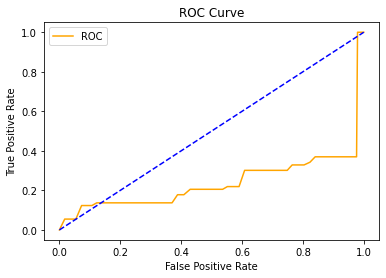

In [157]:
plt.plot(fprate,tprate,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**KNEIGHNORS CLASSIFIER**

In [160]:
#Instantiating the models
knn=KNeighborsClassifier()

In [161]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(princi_components,y,test_size=0.25,random_state=34)

In [162]:
#Training the data
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [163]:
#calling the function and passing the dataset for logistic regression
metric_score(knn,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(knn,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:90.13%

=====Test Score=====
Accuracy Score:82.60%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87        87
           1       0.64      0.74      0.68        73
           2       0.85      0.91      0.88        94
           3       0.84      0.72      0.77        86
           4       0.85      0.92      0.88        83
           5       0.91      0.72      0.81        87
           6       0.97      1.00      0.98        83
           7       0.75      0.88      0.81        96
           8       0.95      0.88      0.92        92
           9       0.71      0.80      0.75        74
          10       0.62      0.65      0.64        84
          11       0.78      0.93      0.85        80
          12       0.93      0.92      0.92        85
          13       0.68      0.71      0.69        76
          14       0.86      0.94      0.90        88
          15   

In [162]:
#Checking cross validation score
cv_score=cross_val_score(knn,princi_components,y,cv=39).mean()
cv_score

0.6748737223899212

In [164]:
#plotting roc curve
fprate,tprate,threshold=roc_curve(y_test,y_pred,pos_label=1)

In [165]:
print('FPR',fprate)
print('TPR',tprate)
print('Threshold',threshold)

FPR [0.         0.01736581 0.03856563 0.0541272  0.07284619 0.08930988
 0.10667569 0.12268832 0.14230943 0.16215607 0.18313036 0.20049617
 0.21447903 0.23274696 0.25011276 0.27176364 0.2947677  0.31529093
 0.33491204 0.37009472 0.38813712 0.40888588 0.42963464 0.44609833
 0.46865133 0.48443843 0.50338295 0.51759134 0.53631033 0.5518719
 0.57352278 0.590212   0.60847993 0.62764998 0.64839874 0.66982409
 0.68673884 0.71019396 0.7300406  0.74853406 0.76477221 0.78371673
 0.8037889  0.82318448 0.84032476 0.85949481 0.88092016 0.89941362
 0.91677943 0.93707713 0.95511953 0.97631935 0.97947677 1.        ]
TPR [0.         0.05479452 0.05479452 0.05479452 0.12328767 0.12328767
 0.12328767 0.1369863  0.1369863  0.1369863  0.1369863  0.1369863
 0.1369863  0.1369863  0.1369863  0.1369863  0.1369863  0.1369863
 0.1369863  0.1369863  0.17808219 0.17808219 0.20547945 0.20547945
 0.20547945 0.20547945 0.20547945 0.20547945 0.20547945 0.21917808
 0.21917808 0.21917808 0.30136986 0.30136986 0.30136986 

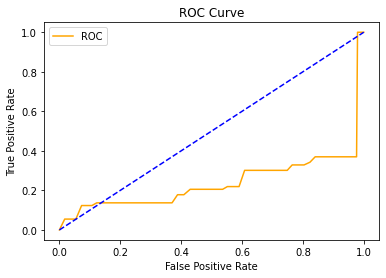

In [166]:
plt.plot(fprate,tprate,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**DECISIONTREE CLASSIFIER**

In [164]:
#Instantiating the models
dt=DecisionTreeClassifier()

In [165]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(princi_components,y,test_size=0.25,random_state=34)

In [166]:
#Training the data
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [167]:
#calling the function and passing the dataset for logistic regression
metric_score(dt,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(dt,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:71.02%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74        87
           1       0.46      0.49      0.48        73
           2       0.82      0.72      0.77        94
           3       0.76      0.77      0.76        86
           4       0.73      0.84      0.78        83
           5       0.62      0.55      0.58        87
           6       0.83      0.84      0.84        83
           7       0.72      0.74      0.73        96
           8       0.83      0.75      0.79        92
           9       0.68      0.78      0.73        74
          10       0.55      0.61      0.58        84
          11       0.79      0.78      0.78        80
          12       0.69      0.75      0.72        85
          13       0.67      0.67      0.67        76
          14       0.76      0.73      0.74        88
          15  

In [171]:
#Checking cross validation score
cv_score=cross_val_score(dt,princi_components,y,cv=39).mean()
cv_score

0.6112770119249601

In [172]:
#plotting roc curve
fprate,tprate,threshold=roc_curve(y_test,y_pred,pos_label=1)

In [175]:
print('FPR',fprate)
print('TPR',tprate)
print('Threshold',threshold)

FPR [0.         0.01736581 0.03856563 0.0541272  0.07284619 0.08930988
 0.10667569 0.12268832 0.14230943 0.16215607 0.18313036 0.20049617
 0.21447903 0.23274696 0.25011276 0.27176364 0.2947677  0.31529093
 0.33491204 0.37009472 0.38813712 0.40888588 0.42963464 0.44609833
 0.46865133 0.48443843 0.50338295 0.51759134 0.53631033 0.5518719
 0.57352278 0.590212   0.60847993 0.62764998 0.64839874 0.66982409
 0.68673884 0.71019396 0.7300406  0.74853406 0.76477221 0.78371673
 0.8037889  0.82318448 0.84032476 0.85949481 0.88092016 0.89941362
 0.91677943 0.93707713 0.95511953 0.97631935 0.97947677 1.        ]
TPR [0.         0.05479452 0.05479452 0.05479452 0.12328767 0.12328767
 0.12328767 0.1369863  0.1369863  0.1369863  0.1369863  0.1369863
 0.1369863  0.1369863  0.1369863  0.1369863  0.1369863  0.1369863
 0.1369863  0.1369863  0.17808219 0.17808219 0.20547945 0.20547945
 0.20547945 0.20547945 0.20547945 0.20547945 0.20547945 0.21917808
 0.21917808 0.21917808 0.30136986 0.30136986 0.30136986 

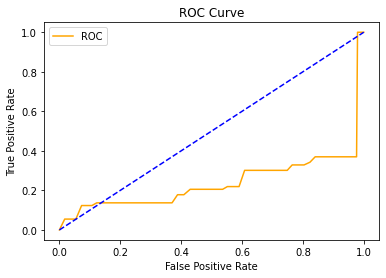

In [176]:
plt.plot(fprate,tprate,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**RandomForest Classifier**

In [168]:
#Instantiating the models
rfc=RandomForestClassifier()

In [169]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(princi_components,y,test_size=0.25,random_state=34)

In [170]:
#Training the data
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [171]:
#calling the function and passing the dataset for logistic regression
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:88.31%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        87
           1       0.84      0.74      0.79        73
           2       0.95      0.97      0.96        94
           3       0.93      0.88      0.90        86
           4       0.94      0.93      0.93        83
           5       0.90      0.75      0.82        87
           6       0.99      0.99      0.99        83
           7       0.86      0.91      0.88        96
           8       0.92      0.93      0.93        92
           9       0.83      0.95      0.89        74
          10       0.74      0.81      0.77        84
          11       0.85      0.93      0.89        80
          12       0.95      0.94      0.95        85
          13       0.81      0.80      0.81        76
          14       0.91      0.91      0.91        88
          15  

In [181]:
#Checking cross validation score
cv_score=cross_val_score(rfc,princi_components,y,cv=39).mean()
cv_score

0.8002780756560453

In [182]:
#plotting roc curve
fprate,tprate,threshold=roc_curve(y_test,y_pred,pos_label=1)

In [183]:
print('FPR',fprate)
print('TPR',tprate)
print('Threshold',threshold)

FPR [0.         0.01736581 0.03856563 0.0541272  0.07284619 0.08930988
 0.10667569 0.12268832 0.14230943 0.16215607 0.18313036 0.20049617
 0.21447903 0.23274696 0.25011276 0.27176364 0.2947677  0.31529093
 0.33491204 0.37009472 0.38813712 0.40888588 0.42963464 0.44609833
 0.46865133 0.48443843 0.50338295 0.51759134 0.53631033 0.5518719
 0.57352278 0.590212   0.60847993 0.62764998 0.64839874 0.66982409
 0.68673884 0.71019396 0.7300406  0.74853406 0.76477221 0.78371673
 0.8037889  0.82318448 0.84032476 0.85949481 0.88092016 0.89941362
 0.91677943 0.93707713 0.95511953 0.97631935 0.97947677 1.        ]
TPR [0.         0.05479452 0.05479452 0.05479452 0.12328767 0.12328767
 0.12328767 0.1369863  0.1369863  0.1369863  0.1369863  0.1369863
 0.1369863  0.1369863  0.1369863  0.1369863  0.1369863  0.1369863
 0.1369863  0.1369863  0.17808219 0.17808219 0.20547945 0.20547945
 0.20547945 0.20547945 0.20547945 0.20547945 0.20547945 0.21917808
 0.21917808 0.21917808 0.30136986 0.30136986 0.30136986 

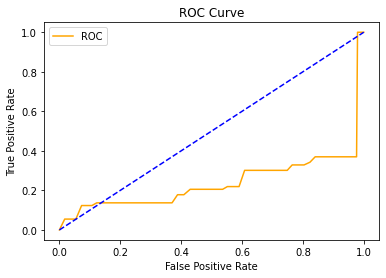

In [184]:
plt.plot(fprate,tprate,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [185]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['XGB','KNN','Decision Tree','Random Forest'],
    'Training Score':[100,90.13,100,100],
    'Testing Score':[85.98,82.60,71.13,88.44],
    'Cross Val Score':[76.16,67.48,61.12,80.02],
    'F1 score':[85.97,82.60,71.13,88.44]
})
data

Models  Training Score  Testing Score  Cross Val Score  F1 score
0            XGB          100.00          85.98            76.16     85.97
1            KNN           90.13          82.60            67.48     82.60
2  Decision Tree          100.00          71.13            61.12     71.13
3  Random Forest          100.00          88.44            80.02     88.44

**Observation**
* **By going through each and every column, it comes to my notice that XGB,Decision Tree and Random Forest have seen all the data that is why it is giving 100% ttrainin score and knn is giving 90.13% training score.**
* **Whereas among all this 4 models random forest is giving highest testing score that is 88.44% followed by XGB 85.98%,knn 82.60% and least Decision tree with 71.13%.**
* **While again Random forest is giving highest cross validation score that is 80.02% followed by XGB 76.16%,KNN 67.48% and least Decision tree with 80.02%.**
* **And lastly again Random Forest is giving the highest F1 score followed by XGB 85.97%, KNN 82.60% and least Decision tree with 71.13%.**
* **By looking at all the scenarios,i will go with Random forest as it has highest f1 score, cross validation score and testing score, and the difference between the cross validation score and the testing score is also less in this model.**

**Going forward with Random Forest CLassifier as i have metioned the reasons in above observations.**

In [172]:
#Using Grid Search cv for hyperparameter tuning for RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [173]:
param_grid=({
    'n_estimators': [10,50,100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,6,12,16,20,24],
    'criterion' :['gini', 'entropy']
})

In [174]:
grid_search=GridSearchCV(rfc,param_grid=param_grid,cv=39)

In [175]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=39, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10]})

In [176]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 10}

In [196]:
#Training with the best parameters
rfc=RandomForestClassifier(criterion='entropy',max_depth=20,max_features='log2',n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2')

In [197]:
#calling the function and passing the dataset
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#Testing Score


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:88.51%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        87
           1       0.85      0.73      0.79        73
           2       0.96      0.98      0.97        94
           3       0.86      0.90      0.88        86
           4       0.95      0.93      0.94        83
           5       0.96      0.78      0.86        87
           6       0.99      0.99      0.99        83
           7       0.89      0.90      0.89        96
           8       0.94      0.95      0.94        92
           9       0.86      0.96      0.90        74
          10       0.73      0.83      0.78        84
          11       0.87      0.90      0.88        80
          12       0.94      0.94      0.94        85
          13       0.86      0.84      0.85        76
          14       0.91      0.93      0.92        88
          15  

**After doing hyper parameter tuning just a slight increase in testing score that too of about 0.6%, so i will consider this model as yhis model is tuned.**

In [201]:
#Checking cross validation score
cv_score=cross_val_score(rfc,princi_components,y,cv=39)
cv_mean=cv_score.mean()
cv_mean

0.8016612617044583

In [209]:
y_pred_prob=rfc.predict_proba(x_test)

In [211]:
#Checking AUC Score
roc_auc_score=roc_auc_score(y_test,y_pred_prob,multi_class='ovr')
roc_auc_score

0.9971630466642725

In [216]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rfc,open('Avocado Classification Project','wb'))